# 1.0 Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2.0 Data Preprocessing

## 2.1 Handling Project1data => data1

In [2]:
# Import Project1data
data1 = pd.read_csv('Project1Data.csv')
data1.head()

,SupporterID,Age_Bucket,Gender,State,PostCode,Have_Phone,Have_Email,Gift_ID,GiftDate,IsEmergencyGift,Is_First_Gift,ProductType_Group,GiftSolicitationChannel,CampaignSubtype_Group,AppealSeason,GiftAmount,Initial_90_Days,Next_24_Month_Value_LTV
0,A-990430482,Unknown,NaN,NSW,2166.0,No,No,0062u00000AFwB5AAL,2020-11-04,NaN,Is_First_Gift,Cash - One off,Web,Appeal,Non Seasonal,56.0,1,0.0
1,A-990434539,Unknown,NaN,NSW,2027.0,No,No,0062u00000AZ70jAAD,2020-12-03,NaN,Is_First_Gift,Cash - One off,DM,Appeal,Christmas,140.0,1,0.0
2,A-990435870,Unknown,NaN,NaN,NaN,No,No,0062u00000Aa42AAAR,2020-12-16,NaN,Is_First_Gift,Cash - Inspired Gifts,DM,Appeal,Non Seasonal,70.0,1,0.0
3,A-990435901,Unknown,NaN,NaN,NaN,No,No,0062u00000Aa997AAB,2020-12-17,NaN,Is_First_Gift,Cash - One off,General,Appeal,Non Seasonal,35.0,1,0.0
4,C-990018085,Unknown,NaN,VIC,3144.0,No,No,0062u000009YQXHAA4,2015-05-11,Yes,Is_First_Gift,Cash - One off,Inserts,Appeal,Non Seasonal,175.0,1,175.0


In [3]:
# View data1's data structure and data types
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1780140 entries, 0 to 1780139
Data columns (total 18 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   SupporterID              object 
 1   Age_Bucket               object 
 2   Gender                   object 
 3   State                    object 
 4   PostCode                 float64
 5   Have_Phone               object 
 6   Have_Email               object 
 7   Gift_ID                  object 
 8   GiftDate                 object 
 9   IsEmergencyGift          object 
 10  Is_First_Gift            object 
 11  ProductType_Group        object 
 12  GiftSolicitationChannel  object 
 13  CampaignSubtype_Group    object 
 14  AppealSeason             object 
 15  GiftAmount               float64
 16  Initial_90_Days          int64  
 17  Next_24_Month_Value_LTV  float64
dtypes: float64(3), int64(1), object(14)
memory usage: 244.5+ MB


In [4]:
# data1 = data

In [5]:
# Convert GiftDate to datetime format
data1['GiftDate'] = pd.to_datetime(data1['GiftDate'])
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1780140 entries, 0 to 1780139
Data columns (total 18 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   SupporterID              object        
 1   Age_Bucket               object        
 2   Gender                   object        
 3   State                    object        
 4   PostCode                 float64       
 5   Have_Phone               object        
 6   Have_Email               object        
 7   Gift_ID                  object        
 8   GiftDate                 datetime64[ns]
 9   IsEmergencyGift          object        
 10  Is_First_Gift            object        
 11  ProductType_Group        object        
 12  GiftSolicitationChannel  object        
 13  CampaignSubtype_Group    object        
 14  AppealSeason             object        
 15  GiftAmount               float64       
 16  Initial_90_Days          int64         
 17  Next_24_Month_Value_LTV  fl

In [6]:
# View data1's missing values
data1.isna().sum()

SupporterID                      0
Age_Bucket                       0
Gender                      473180
State                        84891
PostCode                    104015
Have_Phone                       0
Have_Email                       0
Gift_ID                          0
GiftDate                         0
IsEmergencyGift            1630762
Is_First_Gift                    0
ProductType_Group                0
GiftSolicitationChannel      21053
CampaignSubtype_Group            0
AppealSeason                     0
GiftAmount                       0
Initial_90_Days                  0
Next_24_Month_Value_LTV          0
dtype: int64

In [7]:
# Cleans and standardises Age_Bucket column
data1["Age_Bucket"] = data1["Age_Bucket"].str.strip()

data1["Age_Bucket"] = data1["Age_Bucket"].replace({
    "19 - 30": "19-30",
    "19-30 ": "19-30",
    "71 +": "71+"
})

data1["Age_Bucket"] = data1["Age_Bucket"].fillna("Unknown")
data1.loc[data1["Age_Bucket"]=="", "Age_Bucket"] = "Unknown"

age_order = ["19-30", "31-40", "41-50", "51-60", "61-70", "71+", "Unknown"]
data1["Age_Bucket"] = pd.Categorical(data1["Age_Bucket"], categories=age_order, ordered=True)
print(data1["Age_Bucket"].value_counts(dropna=False))

Age_Bucket
Unknown    896559
31-40      243238
41-50      193695
51-60      144225
71+        130145
61-70      113465
19-30       58813
Name: count, dtype: int64


###  Many zeros (outliers) -> treated seperately using dummy

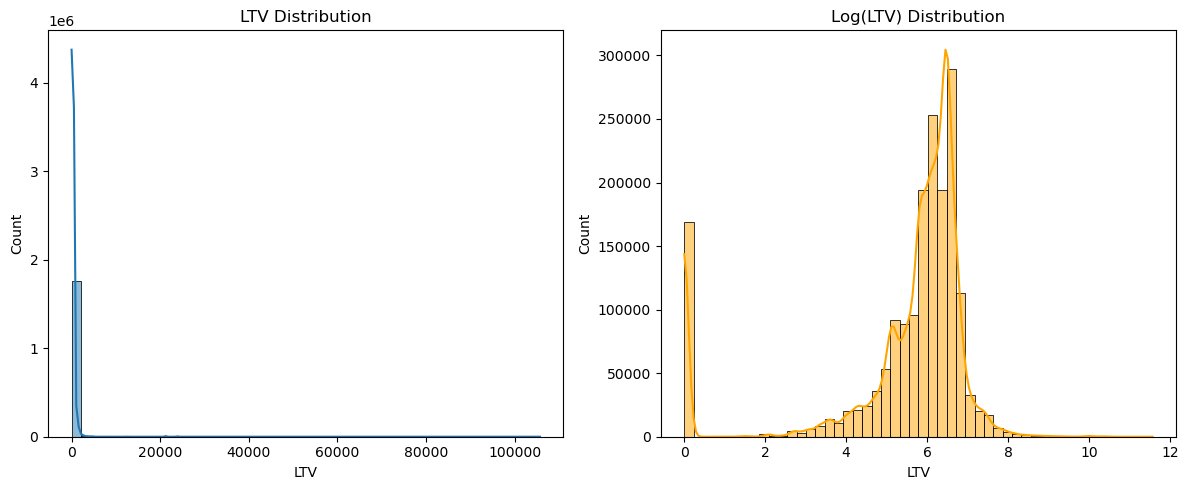

In [8]:
# LTV column
## Step 1: Rename for convenience
data1 = data1.rename(columns={'Next_24_Month_Value_LTV': 'LTV'})

## Step 2: Create dummy variable for donors with positive LTV
data1['Positive_LTV'] = (data1['LTV'] > 0).astype(int)

## Step 3: Plot original and log(LTV)
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(data1['LTV'], bins=50, kde=True)
plt.title("LTV Distribution")

plt.subplot(1,2,2)
sns.histplot(np.log1p(data1['LTV']), bins=50, kde=True, color='orange')
plt.title("Log(LTV) Distribution")

plt.tight_layout()
plt.show()

## Step 4: Create log-transformed version
data1['log_LTV'] = np.log1p(data1['LTV'])


In [9]:
print(data1["LTV"].describe().round(2))

count    1780140.00
mean         486.34
std          782.39
min            0.00
25%          191.10
50%          420.00
75%          655.20
max       105700.00
Name: LTV, dtype: float64


In [10]:
print(data1["log_LTV"].describe().round(2))

count    1780140.00
mean           5.40
std            1.93
min            0.00
25%            5.26
50%            6.04
75%            6.49
max           11.57
Name: log_LTV, dtype: float64


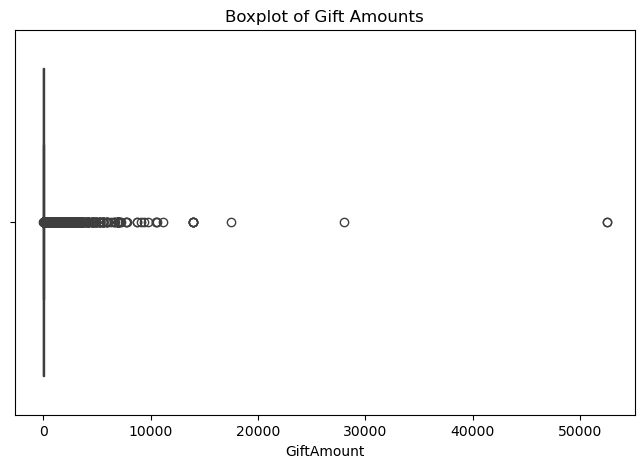

In [11]:
# Visualise the distribution and outliers of GiftAmount column
plt.figure(figsize=(8, 5))
sns.boxplot(x=data1['GiftAmount'])
plt.title("Boxplot of Gift Amounts")
plt.xlabel("GiftAmount")
plt.show()

In [12]:
# (This is the same code as above)
# import seaborn as sns
# import matplotlib.pyplot as plt

# sns.boxplot(x=data1["GiftAmount"])
# plt.title("Boxplot of Original GiftAmount")
# plt.xlabel("GiftAmount")
# plt.show()

In [13]:
# Summary statistics for GiftAmount column
print(data1["GiftAmount"].describe())

# Keep only valid positive amounts less than or equal to 5000 for GiftAmount column
data1 = data1[(data1["GiftAmount"] > 0) & (data1["GiftAmount"] <= 5000)]

count    1.780140e+06
mean     3.527269e+01
std      1.135370e+02
min     -1.400000e+01
25%      1.750000e+01
50%      2.450000e+01
75%      3.430000e+01
max      5.250000e+04
Name: GiftAmount, dtype: float64


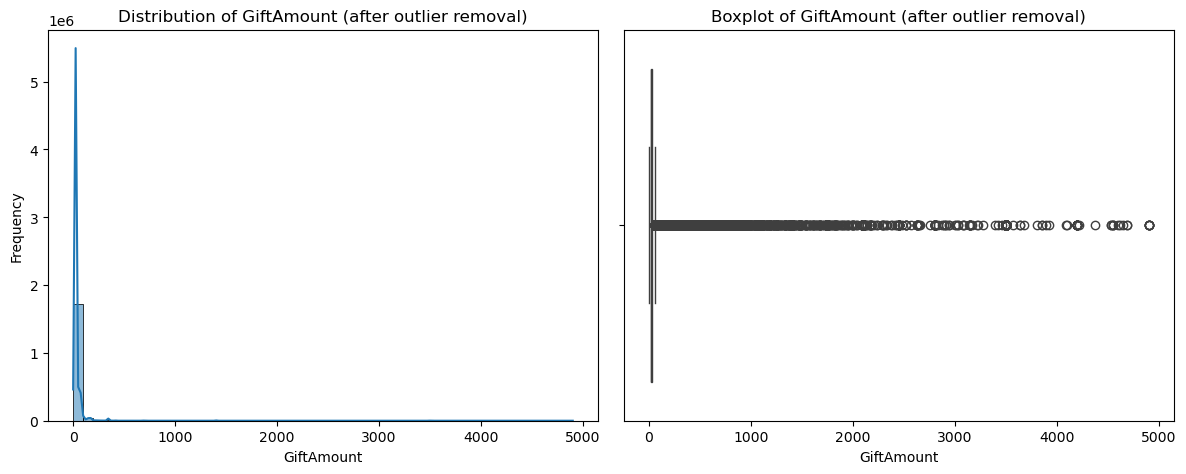

In [14]:
# Plot GiftAmount column after removing outliers
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.histplot(data1["GiftAmount"], bins=50, kde=True)
plt.title("Distribution of GiftAmount (after outlier removal)")
plt.xlabel("GiftAmount")
plt.ylabel("Frequency")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=data1["GiftAmount"])
plt.title("Boxplot of GiftAmount (after outlier removal)")

plt.tight_layout()
plt.show()

In [15]:
# Create a new column with log-transformed GiftAmount - to reduce skewness and stability
data1['log_GiftAmount'] = np.log1p(data1['GiftAmount'])

In [16]:
print(data1["log_GiftAmount"].describe().round(2))

count    1780050.00
mean           3.24
std            0.68
min            0.03
25%            2.92
50%            3.24
75%            3.56
max            8.50
Name: log_GiftAmount, dtype: float64


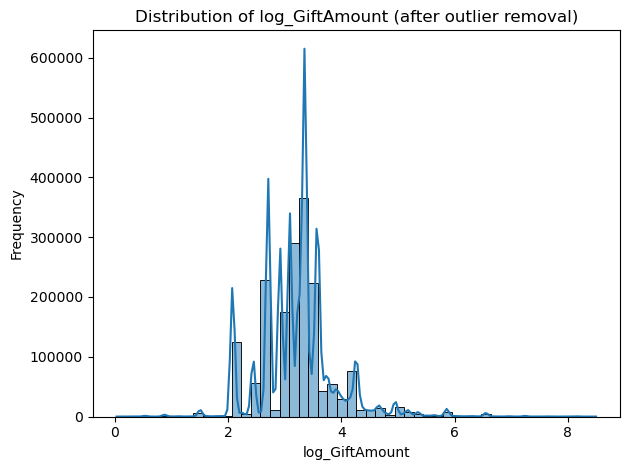

In [17]:
sns.histplot(data1["log_GiftAmount"], bins=50, kde=True)
plt.title("Distribution of log_GiftAmount (after outlier removal)")
plt.xlabel("log_GiftAmount")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("Distribution of log_Gift Amounts (after outlier removal).png")
plt.show()

In [18]:
# Standardise the Gender column by replacing minority values with 'Unknown'
data1['Gender'] = data1['Gender'].replace({
    "Non-Binary":"Unknown",
    "Prefer Not To Say":"Unknown"})

# Replace missing values with 'Unknown'
data1['Gender'] = data1['Gender'].fillna("Unknown")
print(data1['Gender'].value_counts(dropna=False))

Gender
Female     700189
Male       606624
Unknown    473237
Name: count, dtype: int64


In [19]:
# Clean the State column by filling missing values with 'Unknown'
aus_states = ['NSW','VIC','QLD','WA','SA','TAS','ACT','NT']
data1["State"] = data1["State"].fillna("Unknown")

# Group non-Australian states as "Other"
data1.loc[~data1["State"].isin(aus_states) & (data1["State"]!="Unknown"), "State"] = "Other"
print(data1["State"].value_counts(dropna=False))

State
NSW        582207
VIC        404186
WA         232216
QLD        214274
ACT        160256
Unknown     84882
SA          53041
TAS         27648
NT          11990
Other        9350
Name: count, dtype: int64


In [20]:
# Clean and standardise the PostCode column
data1["PostCode"] = data1["PostCode"].astype(str)
data1["PostCode"] = data1["PostCode"].str.split(".").str[0]
data1.loc[data1["PostCode"].isin(["nan","NaN","None","Unknown",""]), "PostCode"] = "Unknown"
mask = data1["PostCode"].str.match(r"^\d+$")  # Include PostCode values that are purely numeric strings
data1.loc[mask, "PostCode"] = data1.loc[mask, "PostCode"].str.zfill(4)

print(data1["PostCode"].value_counts(ascending = False))

PostCode
Unknown    104002
2611        17337
2602        15792
2617        15508
2615        13779
            ...  
4719            1
5710            1
4357            1
2732            1
6947            1
Name: count, Length: 2072, dtype: int64


In [21]:
# Convert the Have_Phone column into binary values (1 = 'Yes', 0 = 'No')
data1["Have_Phone"] = (data1["Have_Phone"]=="Yes").astype(int)
print(data1['Have_Phone'].value_counts())

Have_Phone
1    1473358
0     306692
Name: count, dtype: int64


In [22]:
# Convert the Have_Email column into binary values (1 = 'Yes', 0 = 'No')
data1['Have_Email'] = (data1['Have_Email']=='Yes').astype(int)
print(data1['Have_Email'].value_counts())

Have_Email
1    1343891
0     436159
Name: count, dtype: int64


In [23]:
# Fill missing values within the IsEmergencyGift column with “No,” and convert them to binary (1 = “Yes”, 0 = “No”)
data1["IsEmergencyGift"] = data1["IsEmergencyGift"].fillna("No")
data1["IsEmergencyGift"] = (data1["IsEmergencyGift"]=="Yes").astype(int)
print(data1['IsEmergencyGift'].value_counts())

IsEmergencyGift
0    1630723
1     149327
Name: count, dtype: int64


In [24]:
# Convert the Have_Email column into binary values (1 = first gift, 0 = otherwise)
data1['Is_First_Gift']=(data1['Is_First_Gift']=='Is_First_Gift').astype(int)
print(data1['Is_First_Gift'].value_counts())

Is_First_Gift
0    1589549
1     190501
Name: count, dtype: int64


In [25]:
# Clean the ProductType_Group column by removing spaces and hyphens
data1['ProductType_Group'] = (data1['ProductType_Group'].str.replace(" ", "", regex = False)
                              .str.replace("-","_",regex=False))
print(data1['ProductType_Group'].value_counts())

ProductType_Group
RG_GlobalParent          1461520
Cash_Oneoff               227046
RG_PaddingtonPostcard      42781
Cash_InspiredGifts         30977
CommunityFundraising       17647
RG_Wiggles                    79
Name: count, dtype: int64


In [26]:
# Create a binary flag for regular giving product types
regular_giving_types = ['RG_GlobalParent', 'RG_PaddingtonPostcard', 'RG_Wiggles']
data1['Is_Regular_Giving'] = data1['ProductType_Group'].isin(regular_giving_types).astype(int)
print(data1['Is_Regular_Giving'].value_counts())

Is_Regular_Giving
1    1504380
0     275670
Name: count, dtype: int64


In [27]:
# Clean GiftSolicitationChannel by removing spaces and filling missing values with 'Unknown'
data1['GiftSolicitationChannel'] = (data1['GiftSolicitationChannel'].str.replace(" ","",regex=False))
data1['GiftSolicitationChannel'] = data1['GiftSolicitationChannel'].fillna('Unknown')
print(data1['GiftSolicitationChannel'].value_counts())

GiftSolicitationChannel
Web              664601
F2F              399568
Doortodoor       303720
Telemarketing    169273
Retail           122825
DM                24621
Unsolicited       21404
Unknown           21041
General           17150
EDM               16107
TravelTrip        10548
SMS                3643
B2B                3398
DRTV               1885
Inserts             158
TV                  108
Name: count, dtype: int64


In [28]:
# Standardise GiftSolicitationChannel values using a mapping dictionary
channel_map = {'Unsolicited':'Unknown',
               'TravelTrip':'F2F',
               'DRTV':'TV',
               'Telemarketing':'Phone',
              'EDM':'Email',
              'DM':'DirectMail'}
data1['GiftSolicitationChannel'] = data1['GiftSolicitationChannel'].replace(channel_map)
print(data1['GiftSolicitationChannel'].value_counts())

GiftSolicitationChannel
Web           664601
F2F           410116
Doortodoor    303720
Phone         169273
Retail        122825
Unknown        42445
DirectMail     24621
General        17150
Email          16107
SMS             3643
B2B             3398
TV              1993
Inserts          158
Name: count, dtype: int64


In [29]:
# Group the GiftSolicitiationChannel column into broader categories
def map_channel(x):
    if x in ["Web","Email","SMS","B2B"]:
        return "Digital"
    elif x in ['Phone']:
        return "Telemarketing"
    elif x in ["F2F","Doortodoor","Retail"]:
        return "FaceToFace"
    elif x in ["DirectMail","TV","Inserts"]:
        return "Media"
    else:
        return "Unknown"

data1["Channel_Group"] = data1["GiftSolicitationChannel"].apply(map_channel)

print(data1["Channel_Group"].value_counts())

Channel_Group
FaceToFace       836661
Digital          687749
Telemarketing    169273
Unknown           59595
Media             26772
Name: count, dtype: int64


In [30]:
# Clean CampaignSubtype_Group column by removing spaces
data1['CampaignSubtype_Group'] = data1['CampaignSubtype_Group'].str.replace(" ","_",regex=False)
data1['CampaignSubtype_Group'].value_counts()

CampaignSubtype_Group
Regular_Giving           1507260
Appeal                    250473
Community_Fundraising      17647
Engagement                  4670
Name: count, dtype: int64

In [31]:
# Create a binary flag for regular giving subtypes (the output is the same as regular giving products above)
data1['Is_Regular_Giving_Subtype'] = (data1['CampaignSubtype_Group']=='Regular_Giving').astype(int)
print(data1['Is_Regular_Giving_Subtype'].value_counts())

Is_Regular_Giving_Subtype
1    1507260
0     272790
Name: count, dtype: int64


In [32]:
# Clean AppealSeason by removing spaces
data1['AppealSeason'] = data1['AppealSeason'].str.replace(" ","_",regex=False)
print(data1['AppealSeason'].value_counts())

AppealSeason
Non_Seasonal    1714337
Tax               32422
Christmas         24850
Autumn             6005
Spring             2436
Name: count, dtype: int64


In [33]:
# Create a binary flag for seasonal appeals (1 = seasonal, 0 = non-seasonal)
data1['Is_Seasonal'] = (data1['AppealSeason']!='Non_Seasonal').astype(int)
data1['Is_Seasonal'].value_counts()

Is_Seasonal
0    1714337
1      65713
Name: count, dtype: int64

In [34]:
# View missing values after cleaning
data1.isna().sum()

SupporterID                  0
Age_Bucket                   0
Gender                       0
State                        0
PostCode                     0
Have_Phone                   0
Have_Email                   0
Gift_ID                      0
GiftDate                     0
IsEmergencyGift              0
Is_First_Gift                0
ProductType_Group            0
GiftSolicitationChannel      0
CampaignSubtype_Group        0
AppealSeason                 0
GiftAmount                   0
Initial_90_Days              0
LTV                          0
Positive_LTV                 0
log_LTV                      0
log_GiftAmount               0
Is_Regular_Giving            0
Channel_Group                0
Is_Regular_Giving_Subtype    0
Is_Seasonal                  0
dtype: int64

In [35]:
# View data structure and data types after cleaning
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1780050 entries, 0 to 1780139
Data columns (total 25 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   SupporterID                object        
 1   Age_Bucket                 category      
 2   Gender                     object        
 3   State                      object        
 4   PostCode                   object        
 5   Have_Phone                 int64         
 6   Have_Email                 int64         
 7   Gift_ID                    object        
 8   GiftDate                   datetime64[ns]
 9   IsEmergencyGift            int64         
 10  Is_First_Gift              int64         
 11  ProductType_Group          object        
 12  GiftSolicitationChannel    object        
 13  CampaignSubtype_Group      object        
 14  AppealSeason               object        
 15  GiftAmount                 float64       
 16  Initial_90_Days            int64         

## 2.2 Handling PostCode data => pc

In [36]:
# Import PostCode data
pc = pd.read_csv("PostcodeData.csv")
print(pc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2607 entries, 0 to 2606
Data columns (total 71 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   POSTCODE               2607 non-null   int64 
 1   TOTAL_HOUSEHOLD_COUNT  2607 non-null   int64 
 2   STATE                  2607 non-null   object
 3   DOMINANT_MOSAIC_GROUP  2607 non-null   object
 4   DOMINANT_MOSAIC_TYPE   2607 non-null   object
 5   MOSAIC_GROUP_A         2607 non-null   int64 
 6   MOSAIC_GROUP_B         2607 non-null   int64 
 7   MOSAIC_GROUP_C         2607 non-null   int64 
 8   MOSAIC_GROUP_D         2607 non-null   int64 
 9   MOSAIC_GROUP_E         2607 non-null   int64 
 10  MOSAIC_GROUP_F         2607 non-null   int64 
 11  MOSAIC_GROUP_G         2607 non-null   int64 
 12  MOSAIC_GROUP_H         2607 non-null   int64 
 13  MOSAIC_GROUP_I         2607 non-null   int64 
 14  MOSAIC_GROUP_J         2607 non-null   int64 
 15  MOSAIC_GROUP_K       

In [37]:
# View missing values
pc.isna().sum()

POSTCODE                 0
TOTAL_HOUSEHOLD_COUNT    0
STATE                    0
DOMINANT_MOSAIC_GROUP    0
DOMINANT_MOSAIC_TYPE     0
                        ..
MOSAIC_TYPE_M48          0
MOSAIC_TYPE_N49          0
MOSAIC_TYPE_N50          0
MOSAIC_TYPE_N51          0
MOSAIC_TYPE_N52          0
Length: 71, dtype: int64

In [38]:
# Format Postcodes to 4 digits
pc['PostCode'] = pc['POSTCODE'].astype(str).str.zfill(4)

# Merge mosaic demographic columns within pc with data1
mosaic_cols = ['PostCode', 'DOMINANT_MOSAIC_GROUP', 'DOMINANT_MOSAIC_TYPE']
data1 = data1.merge(pc[mosaic_cols], how='left', on='PostCode')

print(data1['DOMINANT_MOSAIC_GROUP'].value_counts(dropna=False))

DOMINANT_MOSAIC_GROUP
A      238429
B      228410
G      177075
C      174754
F      152902
E      129228
NaN    114755
K      102875
J       99173
M       97743
H       81297
I       81235
D       53724
L       45935
N        2515
Name: count, dtype: int64


In [39]:
# MosaicGroup_Tag not used later, since mosaic_group_map is incomplete hence this can be removed.

# # Flag: missing Mosaic
# data1['Has_Mosaic'] = data1['DOMINANT_MOSAIC_GROUP'].notna().astype(int)

# # Group label (e.g. Affluent, Digital, Family, etc.) — you may define mapping if provided
# # Example (pseudo):
# mosaic_group_map = {
#     'A': 'Affluent', 'B': 'Affluent', 'C': 'Digital', 'F': 'Family',
#     # continue as per Mosaic documentation
# }
# data1['MosaicGroup_Tag'] = data1['DOMINANT_MOSAIC_GROUP'].map(mosaic_group_map)

In [40]:
# View the first 5 rows of merged dataset
data1.head()

,SupporterID,Age_Bucket,Gender,State,PostCode,Have_Phone,Have_Email,Gift_ID,GiftDate,IsEmergencyGift,...,LTV,Positive_LTV,log_LTV,log_GiftAmount,Is_Regular_Giving,Channel_Group,Is_Regular_Giving_Subtype,Is_Seasonal,DOMINANT_MOSAIC_GROUP,DOMINANT_MOSAIC_TYPE
0,A-990430482,Unknown,Unknown,NSW,2166,0,0,0062u00000AFwB5AAL,2020-11-04,0,...,0.0,0,0.000000,4.043051,0,Digital,0,0,F,F20
1,A-990434539,Unknown,Unknown,NSW,2027,0,0,0062u00000AZ70jAAD,2020-12-03,0,...,0.0,0,0.000000,4.948760,0,Media,0,1,B,B06
2,A-990435870,Unknown,Unknown,Unknown,Unknown,0,0,0062u00000Aa42AAAR,2020-12-16,0,...,0.0,0,0.000000,4.262680,0,Media,0,0,NaN,NaN
3,A-990435901,Unknown,Unknown,Unknown,Unknown,0,0,0062u00000Aa997AAB,2020-12-17,0,...,0.0,0,0.000000,3.583519,0,Unknown,0,0,NaN,NaN
4,C-990018085,Unknown,Unknown,VIC,3144,0,0,0062u000009YQXHAA4,2015-05-11,1,...,175.0,1,5.170484,5.170484,0,Media,0,0,A,A01


## 2.3 Handling Mosaic-Australia-2024-Grand-Index_1.2 1 ("Ranking" sheet) => gi

In [41]:
# Import Grand Index dataset
gi_path = "Mosaic-Australia-2024-Grand-Index_1.2 1.xlsx"
gi = pd.read_excel(gi_path, sheet_name="Rankings")

print(gi.head())

  Group/Type        Group/Type Name  Age (Young to Old)  \
0          A           High Society                  11   
1          B      Upscale Urbanites                   3   
2          C  Flourishing Families                    8   
3          D   Suburban Stability                     9   
4          E      Millennial Movers                   2   

   Children Presence (Likely to Unlikely)  Household Income (High to Low)  \
0                                       7                               1   
1                                      12                               2   
2                                       3                               3   
3                                       5                               4   
4                                       1                               5   

   House Price (High to Low)  Remoteness (Urban to Remote)  \
0                          1                             5   
1                          4                             1

In [42]:
# Integrate mosaic demographics within gi into data1
## STEP 1: Extract Mosaic Group from Type (e.g., A01 → A)
data1['DOMINANT_MOSAIC_GROUP'] = data1['DOMINANT_MOSAIC_TYPE'].str[0]

## STEP 2: Load and rename Mosaic Grand Index (group-level) data
gi_path = "Mosaic-Australia-2024-Grand-Index_1.2 1.xlsx"
gi = pd.read_excel(gi_path, sheet_name="Rankings")

### Filter for Mosaic Groups (A–N only)
gi_groups = gi[gi["Group/Type"].str.fullmatch(r"[A-N]")].copy()

### Rename columns for clarity and uniqueness
gi_groups = gi_groups.rename(columns={
    "Group/Type": "DOMINANT_MOSAIC_GROUP",
    "Group/Type Name": "MosaicGroup_Name",
    "Age (Young to Old)": "Mosaic_Age_Rank",
    "Children Presence (Likely to Unlikely)": "Mosaic_Children_Rank",
    "Household Income (High to Low)": "Mosaic_Income_Rank",
    "House Price (High to Low)": "Mosaic_HousePrice_Rank",
    "Remoteness (Urban to Remote)": "Mosaic_Remoteness_Rank",
    "House Type (Flats to Houses)": "Mosaic_HouseType_Rank",
    "Length Of Residency (Short to Long)": "Mosaic_Residency_Rank",
    "Birthplace (Australia to Overseas)": "Mosaic_Birthplace_Rank",
    "Wealth (High to Low)": "Mosaic_Wealth_Rank"
})

## STEP 3: Drop ALL old Mosaic columns (conflicting versions)
cols_to_drop = [col for col in data1.columns if 'Mosaic' in col]
data1 = data1.drop(columns=cols_to_drop)

## STEP 4: Merge cleanly on group
data1 = data1.merge(gi_groups, how='left', on='DOMINANT_MOSAIC_GROUP')
data1.head()

,SupporterID,Age_Bucket,Gender,State,PostCode,Have_Phone,Have_Email,Gift_ID,GiftDate,IsEmergencyGift,...,MosaicGroup_Name,Mosaic_Age_Rank,Mosaic_Children_Rank,Mosaic_Income_Rank,Mosaic_HousePrice_Rank,Mosaic_Remoteness_Rank,Mosaic_HouseType_Rank,Mosaic_Residency_Rank,Mosaic_Birthplace_Rank,Mosaic_Wealth_Rank
0,A-990430482,Unknown,Unknown,NSW,2166,0,0,0062u00000AFwB5AAL,2020-11-04,0,...,Green & Gold,6.0,4.0,6.0,6.0,8.0,12.0,9.0,6.0,6.0
1,A-990434539,Unknown,Unknown,NSW,2027,0,0,0062u00000AZ70jAAD,2020-12-03,0,...,Upscale Urbanites,3.0,12.0,2.0,4.0,1.0,2.0,3.0,11.0,7.0
2,A-990435870,Unknown,Unknown,Unknown,Unknown,0,0,0062u00000Aa42AAAR,2020-12-16,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A-990435901,Unknown,Unknown,Unknown,Unknown,0,0,0062u00000Aa997AAB,2020-12-17,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C-990018085,Unknown,Unknown,VIC,3144,0,0,0062u000009YQXHAA4,2015-05-11,1,...,High Society,11.0,7.0,1.0,1.0,5.0,10.0,13.0,5.0,1.0


## 2.4 Handling Mosaic-Australia-2024-Grand-Index_1.2 1 ("Grand Index - Indices" & "Grand Index - Means") => mosaic_index ("mosaic_index.csv")

In [43]:
# Merge Indices and Means sheets into one combined dataset
xls = pd.ExcelFile("Mosaic-Australia-2024-Grand-Index_1.2 1.xlsx")

indices = pd.read_excel(xls, sheet_name="Grand Index - Indices")
means   = pd.read_excel(xls, sheet_name="Grand Index - Means")

for df in [indices, means]:
    df.rename(columns={
        "Category":"Category",
        "Topic":"Topic",
        "Variable":"Variable"
    }, inplace=True)

indices_long = indices.melt(
    id_vars=["Category","Topic","Variable"],
    var_name="Region",
    value_name="IndexValue"
)

means_long = means.melt(
    id_vars=["Category","Topic","Variable"],
    var_name="Region",
    value_name="MeanValue"
)
mosaic_index = pd.merge(
    indices_long,
    means_long,
    on=["Category","Topic","Variable","Region"],
    how="outer"
)

print(mosaic_index.head())

                Category                            Topic    Variable Region  \
0  Media And Advertising  Advertising - Advertising liked  Billboards      A   
1  Media And Advertising  Advertising - Advertising liked  Billboards    A01   
2  Media And Advertising  Advertising - Advertising liked  Billboards    A02   
3  Media And Advertising  Advertising - Advertising liked  Billboards    A03   
4  Media And Advertising  Advertising - Advertising liked  Billboards    A04   

  IndexValue MeanValue  
0   103.8994   18.2768  
1   128.0356   22.5225  
2    97.2397   17.1053  
3   107.0077   18.8235  
4    48.7267    8.5714  


In [44]:
# mosaic_index.to_csv("mosaic_index.csv")

In [45]:
# Extract digital and mail engagements and merge their scores into data1

## Step 1: Filter digital and mail-related variables
digital_keywords = ["Online", "Streaming", "Digital", "Internet", "YouTube", "Social", "Mobile", "Email"]
mail_keywords = ["Mail", "Postal", "Letterbox", "Catalog", "Direct Mail", "Flyer", "Post"]

# Filter rows with keywords
digital_mask = mosaic_index['Variable'].str.contains('|'.join(digital_keywords), case=False, na=False)
mail_mask = mosaic_index['Variable'].str.contains('|'.join(mail_keywords), case=False, na=False)

digital_index = mosaic_index[digital_mask].copy()
mail_index = mosaic_index[mail_mask].copy()

## Step 2: Keep only Mosaic Group-level rows (A–N, not A01 etc.)
valid_groups = [chr(i) for i in range(ord('A'), ord('N')+1)]
digital_index = digital_index[digital_index['Region'].isin(valid_groups)]
mail_index = mail_index[mail_index['Region'].isin(valid_groups)]
# Compute average digital engagement index per group
digital_score = digital_index.groupby("Region")["IndexValue"].mean().reset_index()
digital_score = digital_score.rename(columns={"Region": "DOMINANT_MOSAIC_GROUP", "IndexValue": "Digital_Engagement_Score"})

# Compute average mail engagement index per group
mail_score = mail_index.groupby("Region")["IndexValue"].mean().reset_index()
mail_score = mail_score.rename(columns={"Region": "DOMINANT_MOSAIC_GROUP", "IndexValue": "Mail_Engagement_Score"})
# Merge both scores into one
mosaic_scores = pd.merge(digital_score, mail_score, on="DOMINANT_MOSAIC_GROUP", how="outer")

# Merge into data1 (donor-level)
data1 = data1.merge(mosaic_scores, how='left', on='DOMINANT_MOSAIC_GROUP')


In [46]:
data1.head()

,SupporterID,Age_Bucket,Gender,State,PostCode,Have_Phone,Have_Email,Gift_ID,GiftDate,IsEmergencyGift,...,Mosaic_Children_Rank,Mosaic_Income_Rank,Mosaic_HousePrice_Rank,Mosaic_Remoteness_Rank,Mosaic_HouseType_Rank,Mosaic_Residency_Rank,Mosaic_Birthplace_Rank,Mosaic_Wealth_Rank,Digital_Engagement_Score,Mail_Engagement_Score
0,A-990430482,Unknown,Unknown,NSW,2166,0,0,0062u00000AFwB5AAL,2020-11-04,0,...,4.0,6.0,6.0,8.0,12.0,9.0,6.0,6.0,93.224852,92.105307
1,A-990434539,Unknown,Unknown,NSW,2027,0,0,0062u00000AZ70jAAD,2020-12-03,0,...,12.0,2.0,4.0,1.0,2.0,3.0,11.0,7.0,125.463451,128.932214
2,A-990435870,Unknown,Unknown,Unknown,Unknown,0,0,0062u00000Aa42AAAR,2020-12-16,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A-990435901,Unknown,Unknown,Unknown,Unknown,0,0,0062u00000Aa997AAB,2020-12-17,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C-990018085,Unknown,Unknown,VIC,3144,0,0,0062u000009YQXHAA4,2015-05-11,1,...,7.0,1.0,1.0,5.0,10.0,13.0,5.0,1.0,100.15449,100.09655


In [47]:
# Create a binary flag for donors with mosaic demographic data, and fill missing Mosaic rank values with each column’s median
data1['Has_Mosaic'] = data1['MosaicGroup_Name'].notna().astype(int)
mosaic_rank_cols = [col for col in data1.columns if col.startswith('Mosaic_')]
for col in mosaic_rank_cols:
    data1[col] = data1[col].fillna(data1[col].median())

In [48]:
# Convert digitial and mail engagement scores to numeric, fill missing values with median, and add a binary flag for donors with mosaic demographic data
data1.info()
data1["Digital_Engagement_Score"] = pd.to_numeric(data1["Digital_Engagement_Score"], errors="coerce")
data1["Mail_Engagement_Score"] = pd.to_numeric(data1["Mail_Engagement_Score"], errors="coerce")
for col in ["Digital_Engagement_Score","Mail_Engagement_Score"]:
    data1[col] = data1[col].fillna(data1[col].median())
data1["Has_Mosaic_Score"] = data1["Digital_Engagement_Score"].notna().astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1780050 entries, 0 to 1780049
Data columns (total 40 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   SupporterID                object        
 1   Age_Bucket                 category      
 2   Gender                     object        
 3   State                      object        
 4   PostCode                   object        
 5   Have_Phone                 int64         
 6   Have_Email                 int64         
 7   Gift_ID                    object        
 8   GiftDate                   datetime64[ns]
 9   IsEmergencyGift            int64         
 10  Is_First_Gift              int64         
 11  ProductType_Group          object        
 12  GiftSolicitationChannel    object        
 13  CampaignSubtype_Group      object        
 14  AppealSeason               object        
 15  GiftAmount                 float64       
 16  Initial_90_Days            int64    

 ## 6. ABS population data Cleaning => population ("population_2024.csv")

In [49]:
# population = pd.read_excel("310104.xlsx", sheet_name="Data1", header = 9)
# print(population.head())

In [50]:
# population['Record_Year'] = pd.to_datetime(population['Series ID'])
# population.head()

In [51]:
# population = population[population['Record_Year'].dt.year == 2024].iloc[-1:,19:]
# population.head()

In [52]:
# population= population.rename(columns={
#     'A2060843J': 'Estimated_Population_NSW',
#     'A2060844K': 'Estimated_Population_VIC',
#     'A2060845L': 'Estimated_Population_QLD',
#     'A2060846R': 'Estimated_Population_SA',
#     'A2060847T': 'Estimated_Population_WA',
#     'A2060848V': 'Estimated_Population_TAS',
#     'A2060849W': 'Estimated_Population_NT',
#     'A2060850F': 'Estimated_Population_ACT',
#     'A2060842F': 'Estimated_Population_Australia'}
# )
# print(population.columns)

In [53]:
# cols = population.columns.tolist()
# cols = ['Record_Year'] + [col for col in cols if col != 'Record_Year']
# population = population[cols]

In [54]:
# print(population.info())

In [55]:
# population.to_csv("Population_2024.csv")

# 2.5 Data Processing - Donor Level & Merging

In [56]:
# Aggregate transaction data into donor-level features; create 90-day behavioural metrics; create interaction terms

import pandas as pd
import numpy as np
from category_encoders import TargetEncoder

# --- STEP 0: Convert GiftDate to datetime ---
data1['GiftDate'] = pd.to_datetime(data1['GiftDate'], errors='coerce')

# --- STEP 1: Donor-level static features (no leakage) ---
donor_data = data1.groupby("SupporterID").agg(
    # Demographics & contact
    Age_Bucket=("Age_Bucket", "first"),
    Gender=("Gender", "first"),
    State=("State", "first"),
    PostCode=("PostCode", "first"),
    Have_Phone=("Have_Phone", "max"),
    Have_Email=("Have_Email", "max"),

    # # Gift stats (all-time)
    # GiftAmount_mean=("GiftAmount", "mean"),
    # GiftAmount_sum=("GiftAmount", "sum"),
    # GiftAmount_max=("GiftAmount", "max"),
    # GiftAmount_min=("GiftAmount", "min"),
    # GiftAmount_std=("GiftAmount", "std"),

    # log_GiftAmount_mean=("log_GiftAmount", "mean"),
    # log_GiftAmount_max=("log_GiftAmount", "max"),
    # log_GiftAmount_min=("log_GiftAmount", "min"),
    # log_GiftAmount_std=("log_GiftAmount", "std"),

    # Flags
    # Is_First_Gift=("Is_First_Gift", "max"),
    # IsEmergencyGift=("IsEmergencyGift", "max"),
    # Is_Seasonal=("Is_Seasonal", "max"),

    # Mosaic enrichment
    MosaicGroup_Name=("MosaicGroup_Name", "first"),
    DOMINANT_MOSAIC_GROUP=("DOMINANT_MOSAIC_GROUP", "first"),
    DOMINANT_MOSAIC_TYPE=("DOMINANT_MOSAIC_TYPE", "first"),
    Mosaic_Age_Rank=("Mosaic_Age_Rank", "first"),
    Mosaic_Children_Rank=("Mosaic_Children_Rank", "first"),
    Mosaic_Income_Rank=("Mosaic_Income_Rank", "first"),
    Mosaic_HousePrice_Rank=("Mosaic_HousePrice_Rank", "first"),
    Mosaic_Remoteness_Rank=("Mosaic_Remoteness_Rank", "first"),
    Mosaic_HouseType_Rank=("Mosaic_HouseType_Rank", "first"),
    Mosaic_Residency_Rank=("Mosaic_Residency_Rank", "first"),
    Mosaic_Birthplace_Rank=("Mosaic_Birthplace_Rank", "first"),
    Mosaic_Wealth_Rank=("Mosaic_Wealth_Rank", "first"),
    Digital_Engagement_Score=("Digital_Engagement_Score", "first"),
    Mail_Engagement_Score=("Mail_Engagement_Score", "first"),
    Has_Mosaic=("Has_Mosaic", "max"),
    Has_Mosaic_Score=("Has_Mosaic_Score", "max"),

    # Targets
    LTV=("LTV", "first"),
    log_LTV=("log_LTV", "first"),
    Positive_LTV=("Positive_LTV", "first")
).reset_index()

# --- STEP 2: Drop leaky all-time columns ---
leaky_cols = [
    "Is_Regular_Giving", "Is_Regular_Giving_Subtype",
    "GiftSolicitationChannel", "Channel_Group",
    "CampaignSubtype_Group", "ProductType_Group"
]
donor_data_clean = donor_data.drop(columns=[c for c in leaky_cols if c in donor_data.columns], errors="ignore")

# --- STEP 3: 90-day features ---
df90 = data1[data1["Initial_90_Days"] == 1].copy()
donor_90 = df90.groupby("SupporterID").agg(
    # --- Core behavioural metrics ---
    GiftCount90=("GiftAmount", "count"),
    GiftSum90=("GiftAmount", "sum"),          # true monetary sum within 90 days
    GiftMean90=("GiftAmount", "mean"),
    GiftMax90=("GiftAmount", "max"),
    GiftMin90=("GiftAmount", "min"),
    GiftStd90=("GiftAmount", "std"),

    # --- Log-transformed gift metrics (safe versions) ---
    log_GiftAmount90_mean=("log_GiftAmount", "mean"),
    log_GiftAmount90_max=("log_GiftAmount", "max"),
    log_GiftAmount90_min=("log_GiftAmount", "min"),
    log_GiftAmount90_std=("log_GiftAmount", "std"),

    # --- Campaign / product diversity ---
    EmergencyGiftSum90=("IsEmergencyGift", "sum"),
    SeasonalGiftSum90=("Is_Seasonal", "sum"),
    ChannelDiversity90=("Channel_Group", pd.Series.nunique),
    CampaignDiversity90=("CampaignSubtype_Group", pd.Series.nunique),
    SeasonDiversity90=("AppealSeason", pd.Series.nunique),
    ProductTypeDiversity90=("ProductType_Group", pd.Series.nunique),

    # --- Regular giving & dates ---
    UsedEmergencyGift90=("IsEmergencyGift", "max"),
    UsedSeasonalGift90=("Is_Seasonal", "max"),
    UsedRegularGiving90=("Is_Regular_Giving", "max"),
    FirstGiftDate90=("GiftDate", "min"),
    LastGiftDate90=("GiftDate", "max")
).reset_index()

# Ratios & RFM
donor_90["EmergencyGiftShare90"] = donor_90["EmergencyGiftSum90"] / donor_90["GiftCount90"].clip(lower=1)
donor_90["SeasonalGiftShare90"]  = donor_90["SeasonalGiftSum90"] / donor_90["GiftCount90"].clip(lower=1)
donor_90["ChannelDivRatio90"]    = donor_90["ChannelDiversity90"] / donor_90["GiftCount90"].clip(lower=1)
donor_90["ActivitySpanDays90"]   = (donor_90["LastGiftDate90"] - donor_90["FirstGiftDate90"]).dt.days.fillna(0)

# RFM with correct monetary
donor_90["Frequency90"]     = donor_90["GiftCount90"]
donor_90["MonetaryTotal90"] = np.log1p(donor_90["GiftSum90"])
donor_90["MonetaryAvg90"]   = donor_90["GiftMean90"].fillna(0)

# Recency
ref_date = pd.to_datetime(df90["GiftDate"]).max()
donor_90["Recency90"] = (ref_date - donor_90["LastGiftDate90"]).dt.days

# --- STEP 4: Merge donor-level + 90-day ---
donor_data_clean = donor_data_clean.merge(donor_90, on="SupporterID", how="left")

# --- STEP 5: Filter for non-RG donors in 90 days ---
donor_model = donor_data_clean[donor_data_clean["UsedRegularGiving90"] == 0].copy()

# --- STEP 6: Handle Mosaic missing values ---
mosaic_cols = [
    'Mosaic_Children_Rank','Mosaic_Income_Rank','Mosaic_HousePrice_Rank',
    'Mosaic_Remoteness_Rank','Mosaic_HouseType_Rank','Mosaic_Residency_Rank',
    'Mosaic_Birthplace_Rank','Mosaic_Wealth_Rank',
    'Digital_Engagement_Score','Mail_Engagement_Score'
]
for col in mosaic_cols:
    donor_model[col] = pd.to_numeric(donor_model[col], errors="coerce")
    donor_model[col] = donor_model[col].fillna(donor_model[col].median())

donor_model['DOMINANT_MOSAIC_GROUP'] = donor_model['DOMINANT_MOSAIC_GROUP'].fillna("Unknown")
donor_model['DOMINANT_MOSAIC_TYPE']  = donor_model['DOMINANT_MOSAIC_TYPE'].fillna("Unknown")

# --- STEP 7: Create interaction terms (safe subset only) ---
donor_model["Freq_x_Monetary"]   = donor_model["Frequency90"] * donor_model["MonetaryTotal90"]
donor_model["Email_x_Frequency"] = donor_model["Have_Email"] * donor_model["Frequency90"]
donor_model["Phone_x_Frequency"] = donor_model["Have_Phone"] * donor_model["Frequency90"]

# Optional rare-event interactions (only keep if predictive later)
# donor_model["Emergency_x_Freq"]     = donor_model["EmergencyGiftShare90"] * donor_model["Frequency90"]
# donor_model["Seasonal_x_Freq"]      = donor_model["SeasonalGiftShare90"] * donor_model["Frequency90"]

In [57]:
donor_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133086 entries, 0 to 191752
Data columns (total 58 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SupporterID               133086 non-null  object        
 1   Age_Bucket                133086 non-null  category      
 2   Gender                    133086 non-null  object        
 3   State                     133086 non-null  object        
 4   PostCode                  133086 non-null  object        
 5   Have_Phone                133086 non-null  int64         
 6   Have_Email                133086 non-null  int64         
 7   MosaicGroup_Name          107738 non-null  object        
 8   DOMINANT_MOSAIC_GROUP     133086 non-null  object        
 9   DOMINANT_MOSAIC_TYPE      133086 non-null  object        
 10  Mosaic_Age_Rank           133086 non-null  float64       
 11  Mosaic_Children_Rank      133086 non-null  float64       
 12  Mosaic_

In [58]:
donor_eda = donor_model.copy()

In [59]:
for col in ["GiftStd90","log_GiftAmount90_std"]:
    if col in donor_eda.columns:
        donor_eda[col] = donor_eda[col].fillna(0)

In [60]:
donor_eda['MosaicGroup_Name'].value_counts(dropna=False)

MosaicGroup_Name
None                     25348
Upscale Urbanites        15252
High Society             14823
Bright Starts            10947
Flourishing Families     10451
Millennial Movers         9920
Green & Gold              7834
Suburban Stability        6946
Frugal Families           5978
Blissful Retirement       5821
Dream Chasers             5758
Solo Budgets              5536
Small Towners             4848
Land of Plenty            2931
Timeless Traditions        693
Name: count, dtype: int64

In [61]:
donor_eda['MosaicGroup_Name'] = donor_eda['MosaicGroup_Name'].fillna('Unknown')

In [62]:
donor_eda = donor_eda.drop(columns = ['Frequency90', 'MonetaryTotal90','MonetaryAvg90',
                          'Recency90','Freq_x_Monetary','Email_x_Frequency','Phone_x_Frequency'], errors='ignore')

In [63]:
donor_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133086 entries, 0 to 191752
Data columns (total 51 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SupporterID               133086 non-null  object        
 1   Age_Bucket                133086 non-null  category      
 2   Gender                    133086 non-null  object        
 3   State                     133086 non-null  object        
 4   PostCode                  133086 non-null  object        
 5   Have_Phone                133086 non-null  int64         
 6   Have_Email                133086 non-null  int64         
 7   MosaicGroup_Name          133086 non-null  object        
 8   DOMINANT_MOSAIC_GROUP     133086 non-null  object        
 9   DOMINANT_MOSAIC_TYPE      133086 non-null  object        
 10  Mosaic_Age_Rank           133086 non-null  float64       
 11  Mosaic_Children_Rank      133086 non-null  float64       
 12  Mosaic_

# 3.0 EDA

## 3.1 Univariate - Focus on LTV

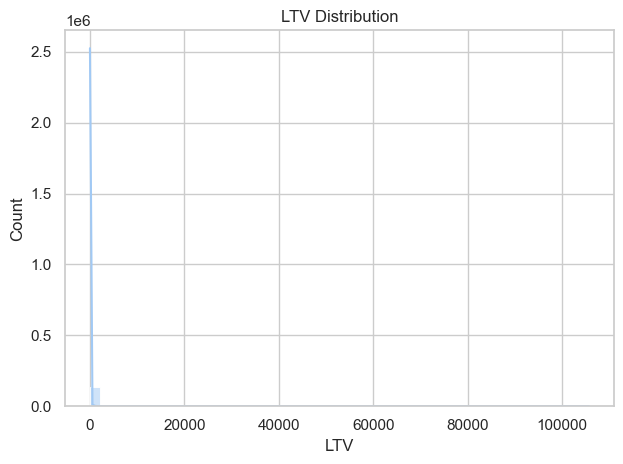

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

sns.set(style="whitegrid", palette="pastel")

# 1️⃣ LTV Distribution (Raw vs Log)
sns.histplot(donor_eda['LTV'], bins=50, kde=True)
plt.title("LTV Distribution")
plt.xlabel("LTV")
plt.tight_layout()
plt.show()

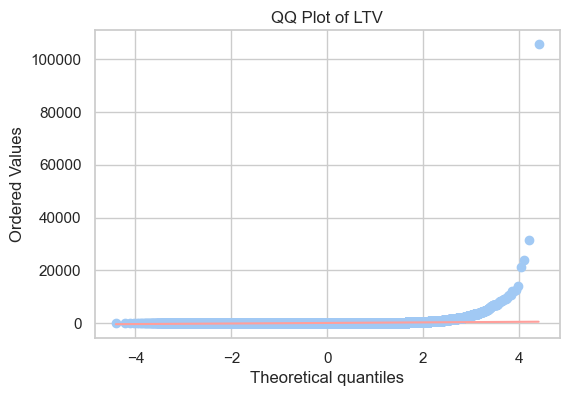

In [65]:
# 2️⃣ QQ Plot for LTV
plt.figure(figsize=(6,4))
stats.probplot(donor_eda['LTV'].dropna(), dist="norm", plot=plt)
plt.title("QQ Plot of LTV")
plt.show()

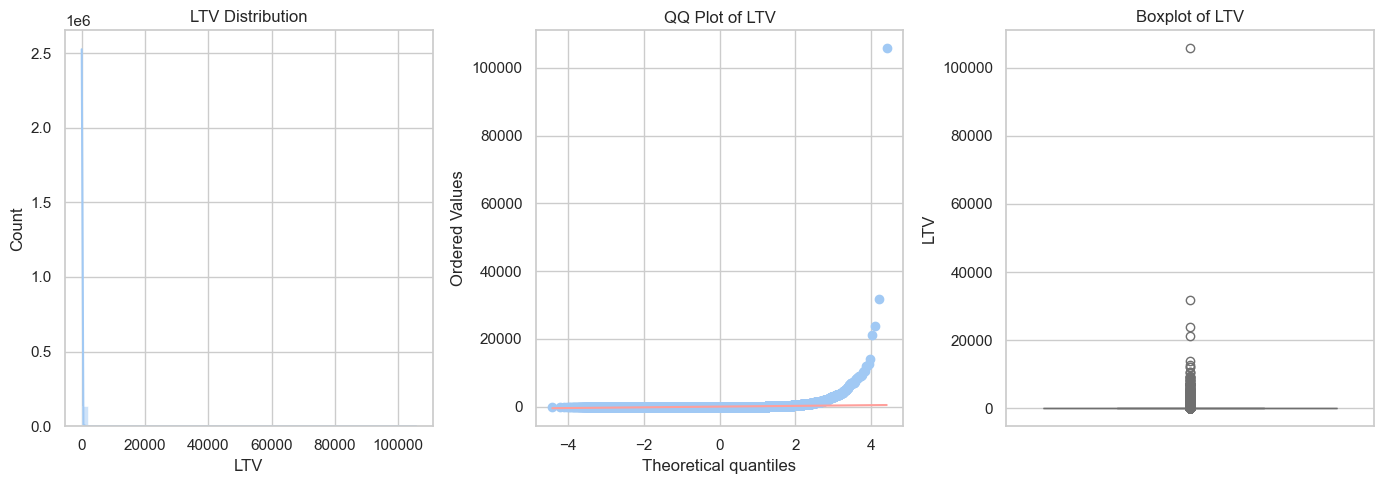

In [66]:
# 1️⃣ LTV Distribution (Raw vs Log)
plt.figure(figsize=(14,5))
plt.subplot(1,3,1)
sns.histplot(donor_eda['LTV'], bins=50, kde=True)
plt.title("LTV Distribution")
plt.xlabel("LTV")

# 2️⃣ QQ Plot for LTV
plt.subplot(1,3,2)
stats.probplot(donor_eda['LTV'].dropna(), dist="norm", plot=plt)
plt.title("QQ Plot of LTV")

plt.subplot(1,3,3)
sns.boxplot(y=donor_eda['LTV'], color='skyblue')
plt.title("Boxplot of LTV")

plt.tight_layout()
plt.savefig("LTV distribution and QQplot box.png")
plt.show()

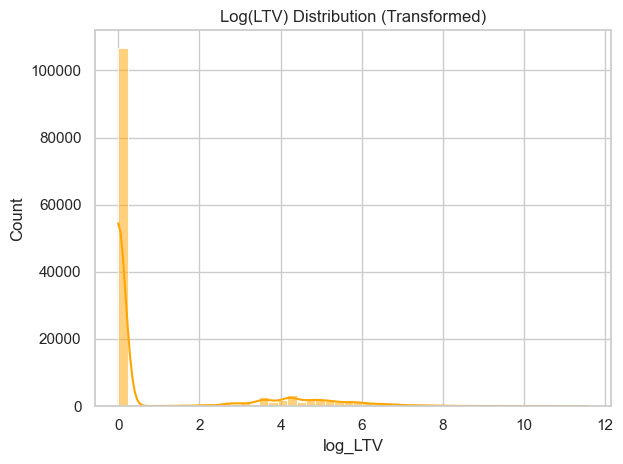

In [67]:
sns.histplot(donor_eda['log_LTV'], bins=50, kde=True, color='orange')
plt.title("Log(LTV) Distribution (Transformed)")
plt.xlabel("log_LTV")
plt.tight_layout()
plt.show()

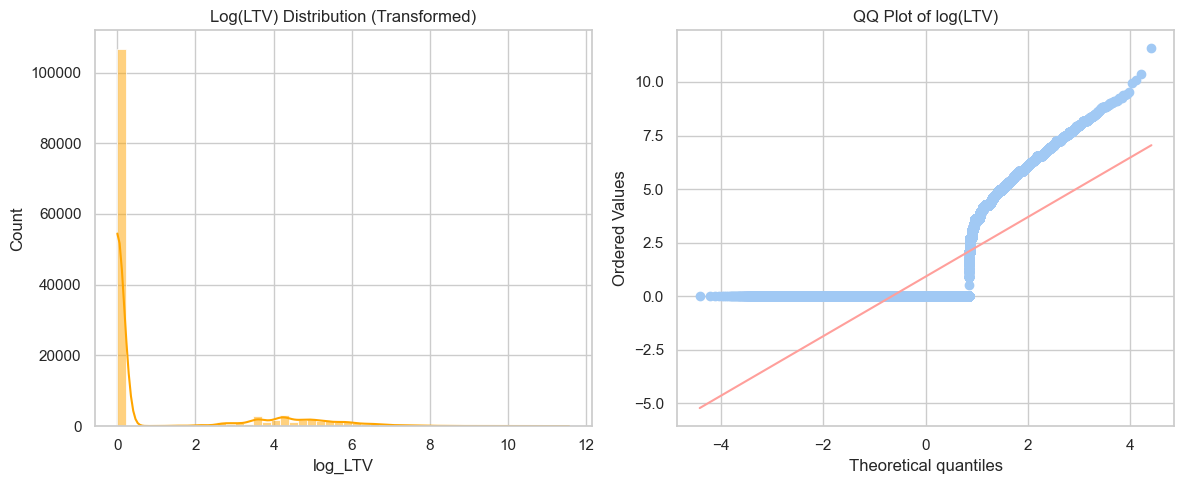

In [68]:
# 1️⃣ LTV Distribution (Raw vs Log)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(donor_eda['log_LTV'], bins=50, kde=True, color='orange')
plt.title("Log(LTV) Distribution (Transformed)")
plt.xlabel("log_LTV")

# 2️⃣ QQ Plot for log(LTV)
plt.subplot(1,2,2)
stats.probplot(donor_eda['log_LTV'].dropna(), dist="norm", plot=plt)
plt.title("QQ Plot of log(LTV)")

plt.tight_layout()
plt.show()

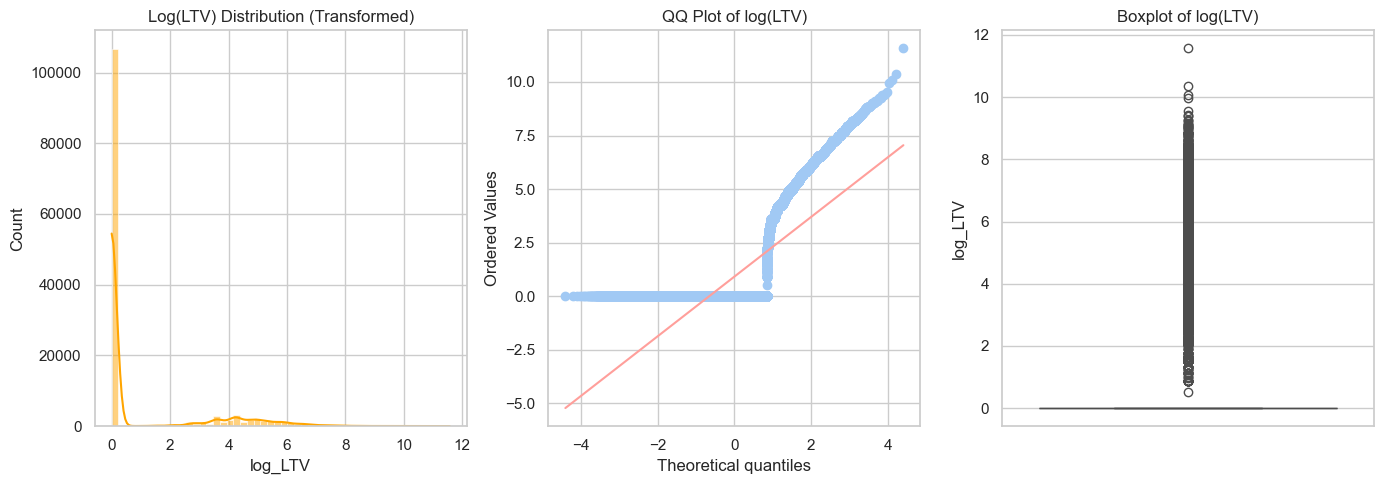

In [69]:
# 1️⃣ LTV Distribution (Raw vs Log)
plt.figure(figsize=(14,5))
plt.subplot(1,3,1)
sns.histplot(donor_eda['log_LTV'], bins=50, kde=True, color='orange')
plt.title("Log(LTV) Distribution (Transformed)")
plt.xlabel("log_LTV")

# 2️⃣ QQ Plot for log(LTV)
plt.subplot(1,3,2)
stats.probplot(donor_eda['log_LTV'].dropna(), dist="norm", plot=plt)
plt.title("QQ Plot of log(LTV)")

plt.subplot(1,3,3)
sns.boxplot(y=donor_eda['log_LTV'], color='orange')
plt.title("Boxplot of log(LTV)")

plt.tight_layout()
plt.savefig("log_LTV.png")
plt.show()

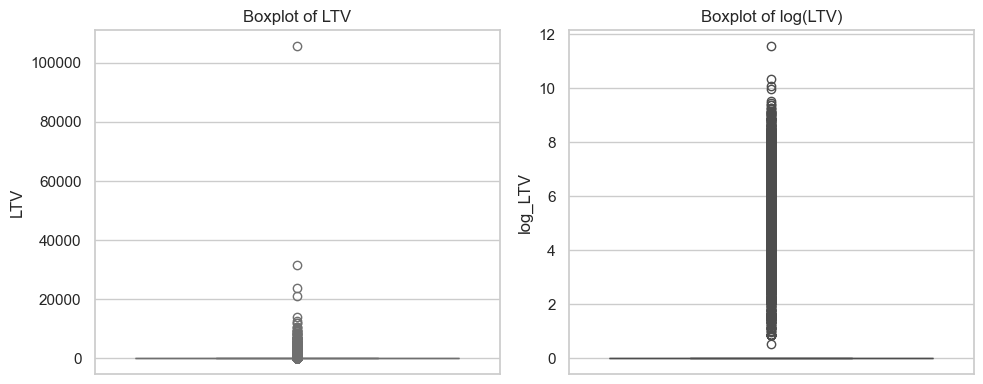

In [70]:
# 3️⃣ Boxplot for LTV and log_LTV
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(y=donor_eda['LTV'], color='skyblue')
plt.title("Boxplot of LTV")

plt.subplot(1,2,2)
sns.boxplot(y=donor_eda['log_LTV'], color='orange')
plt.title("Boxplot of log(LTV)")
plt.tight_layout()
plt.show()

C:\Users\FITSWE\AppData\Local\Temp\ipykernel_7260\3183394335.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=donor_eda['Positive_LTV'], palette=['#fcae91','#fb6a4a'])


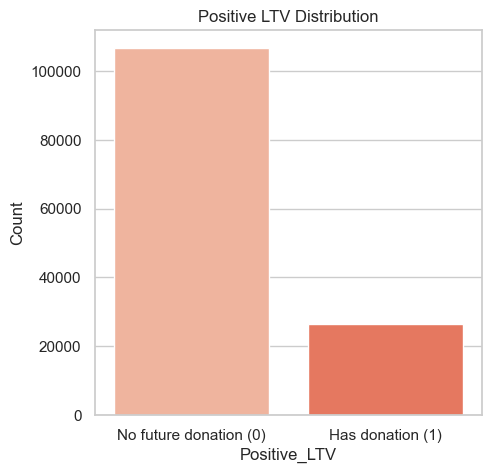

In [71]:
# 4️⃣ Positive_LTV Distribution
plt.figure(figsize=(5,5))
sns.countplot(x=donor_eda['Positive_LTV'], palette=['#fcae91','#fb6a4a'])
plt.title("Positive LTV Distribution")
plt.xticks([0,1], ['No future donation (0)', 'Has donation (1)'])
plt.ylabel("Count")

plt.savefig("postive_ltv.png")
plt.show()

In [72]:
donor_eda['Positive_LTV'].value_counts()

Positive_LTV
0    106582
1     26504
Name: count, dtype: int64

## 3.2 Bivariate

### 3.2.1 Numeric Variable

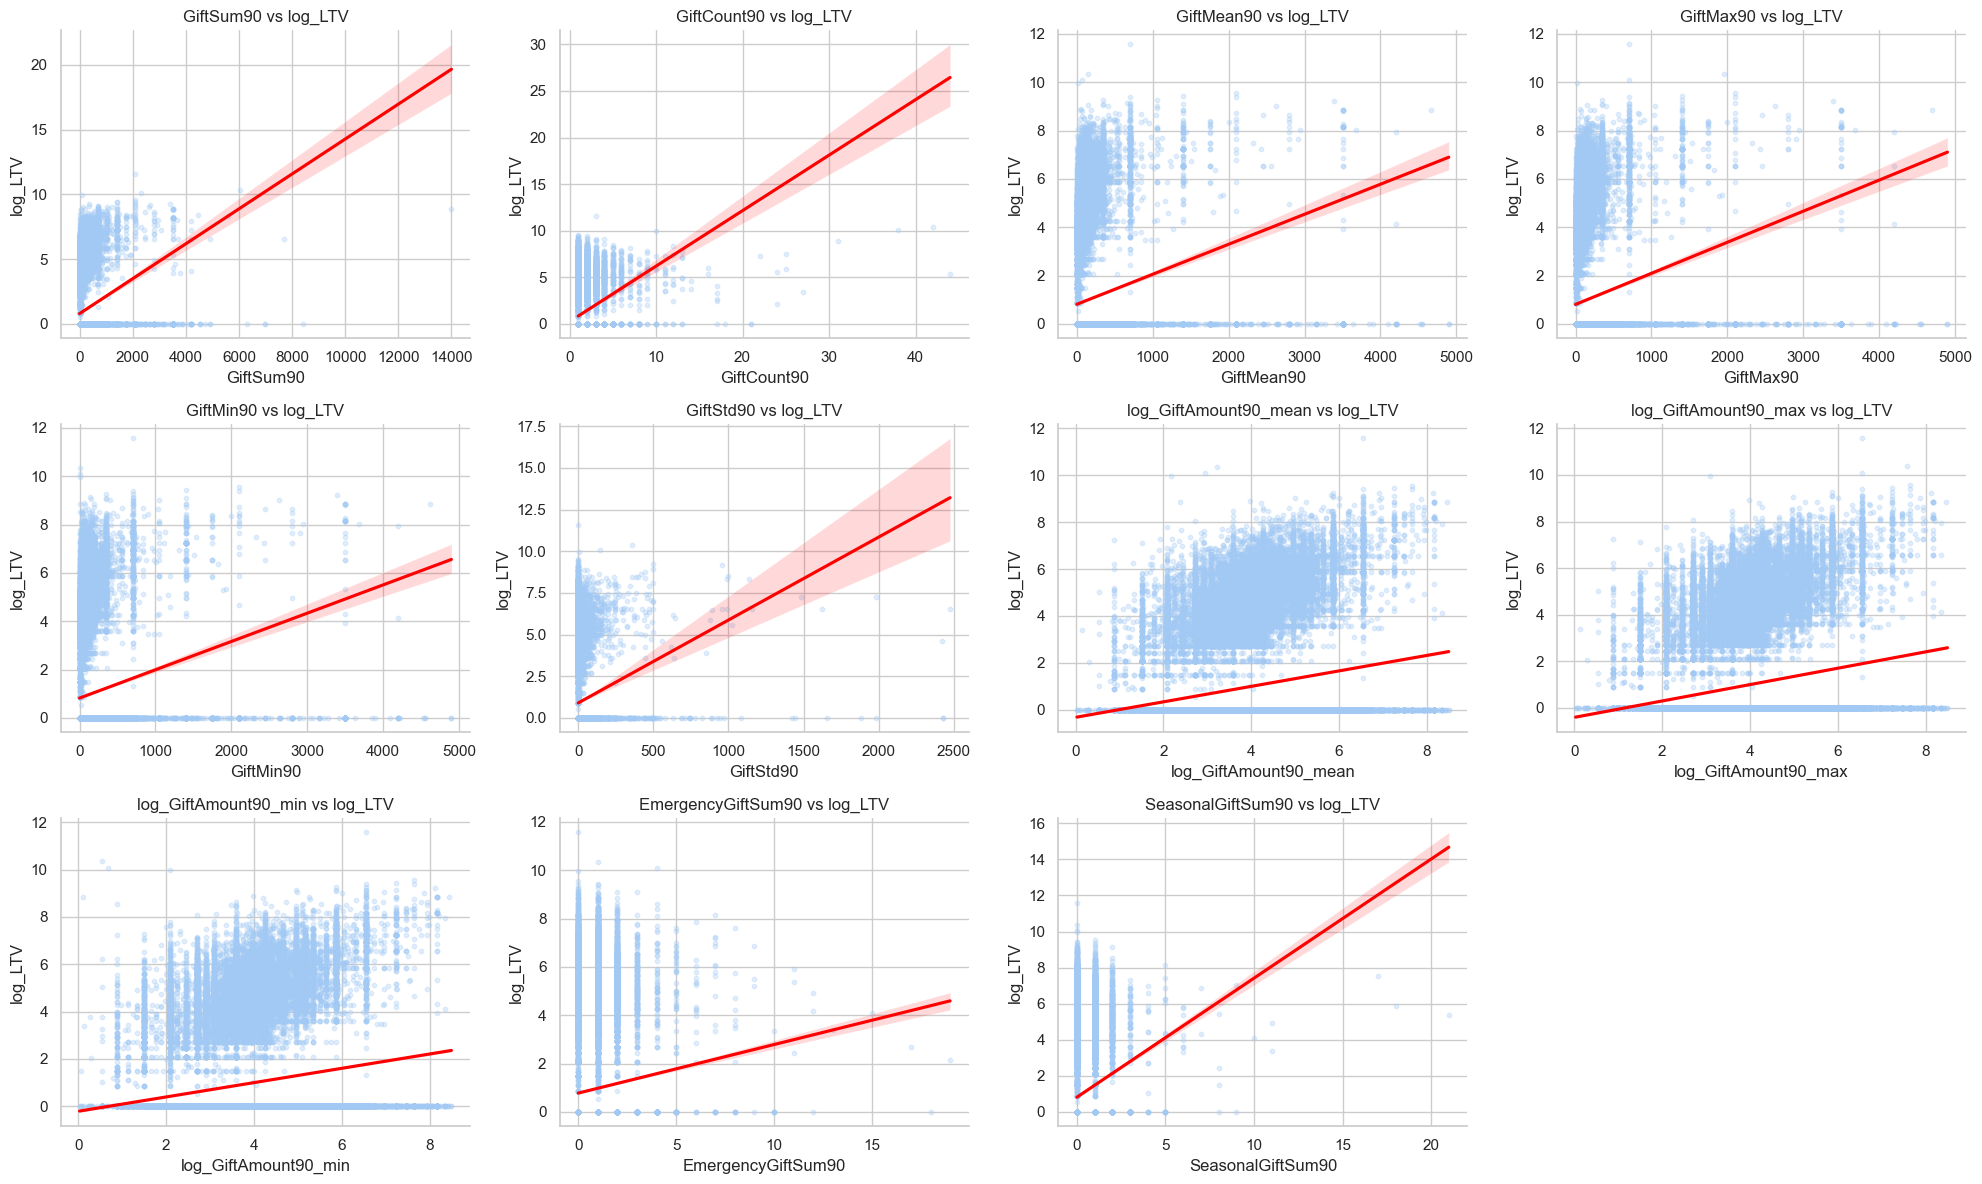

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", palette="pastel")

# numeric 
num_vars = [
    'GiftSum90','GiftCount90','GiftMean90','GiftMax90','GiftMin90','GiftStd90',
    'log_GiftAmount90_mean','log_GiftAmount90_max','log_GiftAmount90_min','EmergencyGiftSum90', 'SeasonalGiftSum90'
]

# 1️⃣ Numeric vs log_LTV (scatter/regplot)
n = len(num_vars)
cols = 4
rows = (n // cols) + 1

plt.figure(figsize=(20, 4 * rows))

for i, col in enumerate(num_vars):
    plt.subplot(rows, cols, i+1)
    sns.regplot(x=donor_eda[col], y=donor_eda['log_LTV'],
                scatter_kws={'alpha':0.3, 's':10}, line_kws={'color':'red'})
    plt.title(f'{col} vs log_LTV')
    plt.xlabel(col)
    plt.ylabel('log_LTV')
    sns.despine()
    
plt.tight_layout()
plt.show()

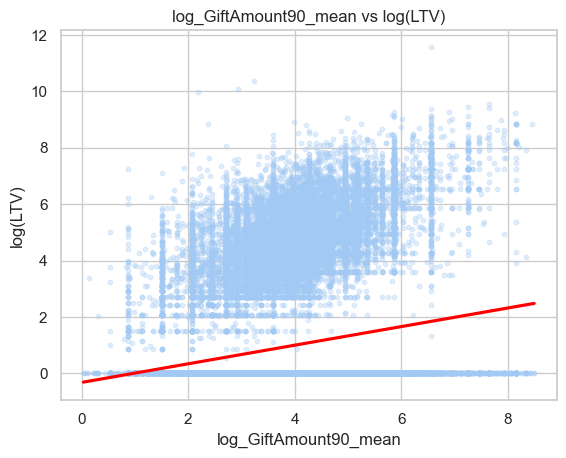

In [74]:
sns.set(style="whitegrid", palette="pastel")

# 3️⃣ log_GiftAmount90_mean vs log_LTV (Smoothed Trend)
sns.regplot(x='log_GiftAmount90_mean', y='log_LTV', data=donor_eda,
            scatter_kws={'alpha':0.3, 's':10}, line_kws={'color':'red'})
plt.title("log_GiftAmount90_mean vs log(LTV)")
plt.xlabel("log_GiftAmount90_mean")
plt.ylabel("log(LTV)")
plt.savefig("EDA2.png")
plt.show()

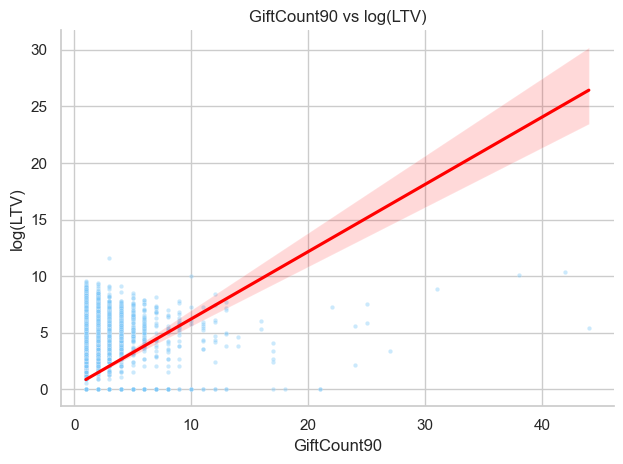

In [75]:
sns.scatterplot(x=donor_eda['GiftCount90'], y=donor_eda['log_LTV'],
                    color='#7fc8f8', alpha=0.4, s=10)
sns.regplot(x=donor_eda['GiftCount90'], y=donor_eda['log_LTV'],
                scatter=False, line_kws={'color': 'red'})
plt.title("GiftCount90 vs log(LTV)")
plt.xlabel("GiftCount90")
plt.ylabel("log(LTV)")
sns.despine()

plt.tight_layout()
plt.savefig("EDA2 giftcount.png")
plt.show()

### 3.2.2 Categorical

C:\Users\FITSWE\AppData\Local\Temp\ipykernel_7260\2552540676.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='log_LTV', data=donor_eda, palette='pastel')
C:\Users\FITSWE\AppData\Local\Temp\ipykernel_7260\2552540676.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='log_LTV', data=donor_eda, palette='pastel')
C:\Users\FITSWE\AppData\Local\Temp\ipykernel_7260\2552540676.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='log_LTV', data=donor_eda, palette='pastel')
C:\Users\FITSWE\AppData\Local\Temp\ipykerne

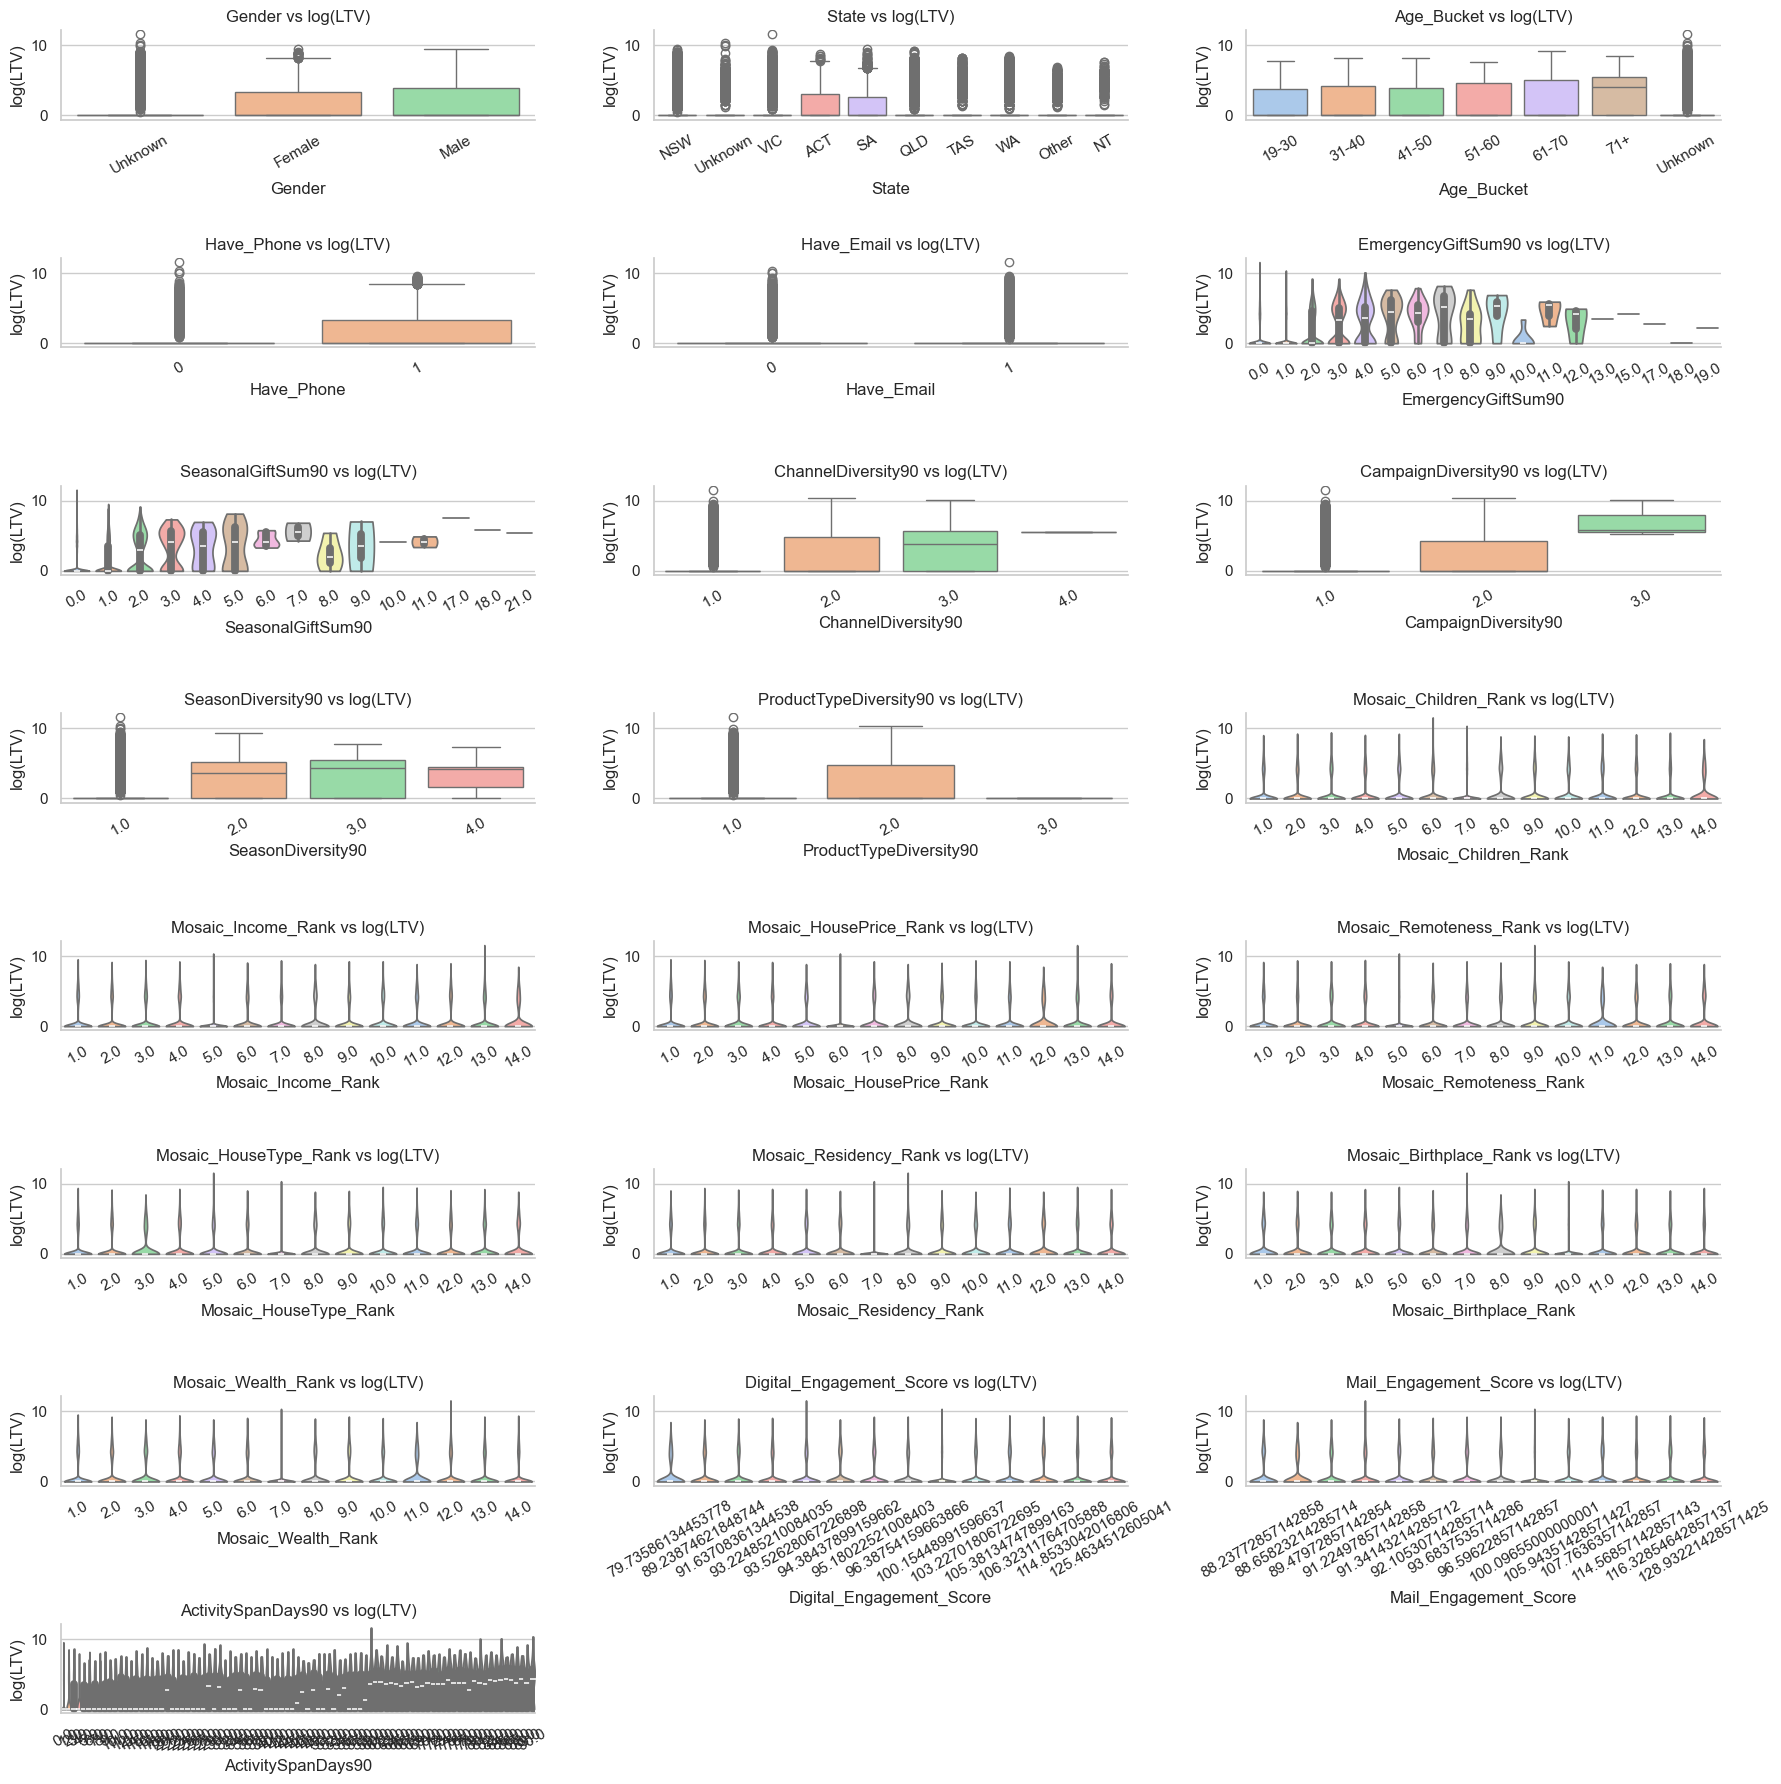

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", palette="pastel")

cat_vars = [
    'Gender', 'State', 'Age_Bucket', 
    'Have_Phone', 'Have_Email',
    'EmergencyGiftSum90', 'SeasonalGiftSum90',
    'ChannelDiversity90', 'CampaignDiversity90', 
    'SeasonDiversity90', 'ProductTypeDiversity90',
    'Mosaic_Children_Rank', 'Mosaic_Income_Rank',
    'Mosaic_HousePrice_Rank','Mosaic_Remoteness_Rank',
    'Mosaic_HouseType_Rank','Mosaic_Residency_Rank',
    'Mosaic_Birthplace_Rank','Mosaic_Wealth_Rank',
    'Digital_Engagement_Score','Mail_Engagement_Score',
    'ActivitySpanDays90'
]

plt.figure(figsize=(18, 18))

for i, col in enumerate(cat_vars):
    plt.subplot(8, 3, i + 1)
    
    if donor_eda[col].nunique() <= 10:
        sns.boxplot(x=col, y='log_LTV', data=donor_eda, palette='pastel')
    else:
        sns.violinplot(x=col, y='log_LTV', data=donor_eda, palette='pastel', cut=0)
    
    plt.title(f"{col} vs log(LTV)")
    plt.xlabel(col)
    plt.ylabel("log(LTV)")
    plt.xticks(rotation=30)
    sns.despine()

plt.tight_layout()
plt.show()

C:\Users\FITSWE\AppData\Local\Temp\ipykernel_7260\4229032596.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=donor_eda, x='Age_Bucket', y='log_LTV', order=age_order, palette='pastel')


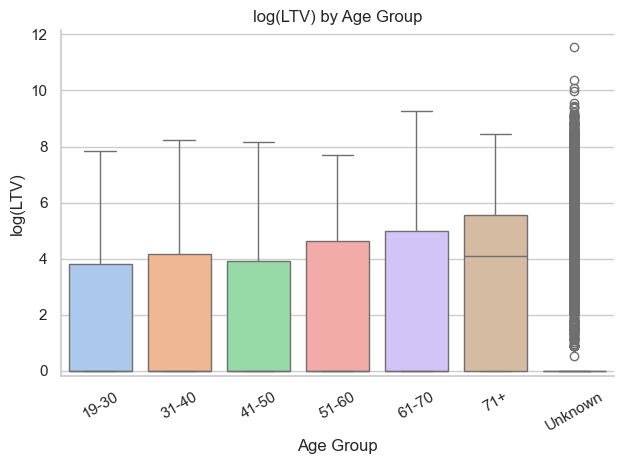

In [77]:
# ---order ---
age_order = ["19-30", "31-40", "41-50", "51-60", "61-70", "71+", "Unknown"]

donor_eda['Age_Bucket'] = pd.Categorical(donor_eda['Age_Bucket'], categories=age_order, ordered=True)

# Age_Bucket
sns.boxplot(data=donor_eda, x='Age_Bucket', y='log_LTV', order=age_order, palette='pastel')
plt.title('log(LTV) by Age Group')
plt.xlabel('Age Group')
plt.ylabel('log(LTV)')
plt.xticks(rotation=30)
sns.despine()
plt.ylim(-0.2, None)

plt.tight_layout()
plt.savefig("EDA2.1.png")
plt.show()

C:\Users\FITSWE\AppData\Local\Temp\ipykernel_7260\4047271200.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=donor_eda, x='State', y='log_LTV', order=aus_states, palette='pastel')


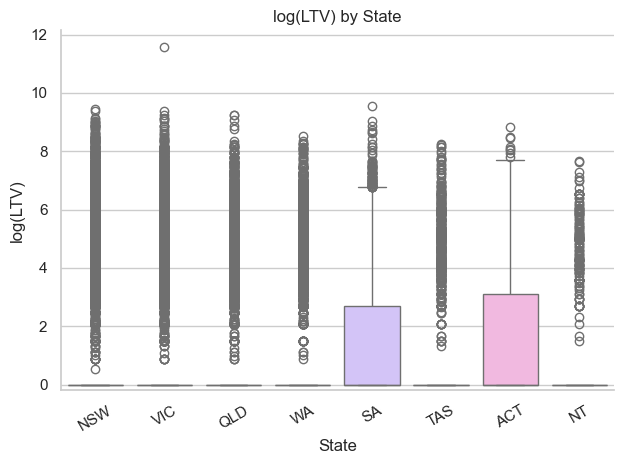

In [78]:
aus_states = ['NSW','VIC','QLD','WA','SA','TAS','ACT','NT']

donor_eda['State'] = pd.Categorical(donor_eda['State'], categories=aus_states, ordered=True)

sns.boxplot(data=donor_eda, x='State', y='log_LTV', order=aus_states, palette='pastel')
plt.ylim(-0.2, None)
plt.title('log(LTV) by State')
plt.xlabel('State')
plt.ylabel('log(LTV)')
plt.xticks(rotation=30)
sns.despine()
plt.tight_layout()
plt.savefig("EDA2.2.png")
plt.show()

In [79]:
donor_eda['Gender'].unique()

array(['Unknown', 'Female', 'Male'], dtype=object)

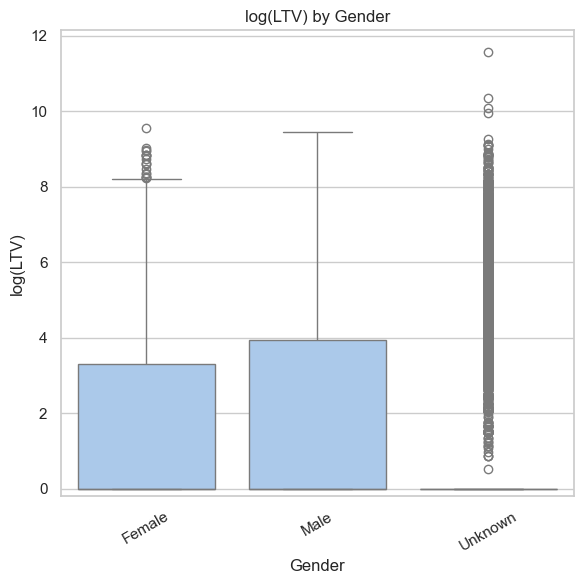

In [80]:
plt.figure(figsize=(6,6))
gender = ['Female','Male','Unknown']

donor_eda['Gender'] = pd.Categorical(donor_eda['Gender'], categories=gender, ordered=True)

sns.boxplot(data=donor_eda, x='Gender', y='log_LTV', order=gender)
plt.title('log(LTV) by Gender')
plt.xlabel('Gender')
plt.ylabel('log(LTV)')
plt.xticks(rotation=30)
plt.ylim(-0.2, None)
plt.tight_layout()
plt.savefig("EDA2.3.png")
plt.show()

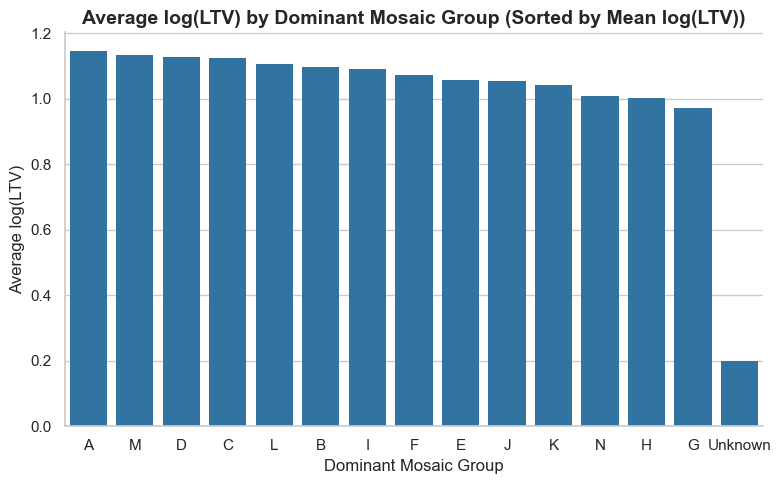

In [81]:
sns.set(style="whitegrid", palette="pastel")
# ===== 1. Calculate and Define Sort Order =====
# Calculate the mean log_LTV for each Mosaic Group
mean_log_ltv = donor_eda.groupby('DOMINANT_MOSAIC_GROUP')['log_LTV'].mean()

# Sort the groups by mean log_LTV in descending order (excluding 'Unknown' for now)
# .drop(labels=['Unknown'], errors='ignore') handles the case where 'Unknown' might not exist
sorted_groups = mean_log_ltv.drop(labels=['Unknown'], errors='ignore').sort_values(ascending=False).index.tolist()

# Add 'Unknown' group to the very end of the order list, if it exists
if 'Unknown' in mean_log_ltv.index:
    sorted_groups.append('Unknown')

# ===== 2. Visualization =====
sns.set(style="whitegrid", palette="pastel")

plt.figure(figsize=(8, 5))

ax = sns.barplot(
    data=donor_eda,
    x='DOMINANT_MOSAIC_GROUP',
    y='log_LTV',
    # Apply the calculated order list to sort the bars
    order=sorted_groups,
    estimator='mean',
    errorbar=None,
    capsize=0,
    color='#1f77b4',
    edgecolor='none',
    linewidth=0
)

plt.title('Average log(LTV) by Dominant Mosaic Group (Sorted by Mean log(LTV))', fontsize=14, weight='bold')
plt.xlabel('Dominant Mosaic Group', fontsize=12)
plt.ylabel('Average log(LTV)', fontsize=12)
sns.despine()
plt.savefig("EDA2.4_sorted.png")
plt.tight_layout()
plt.show()

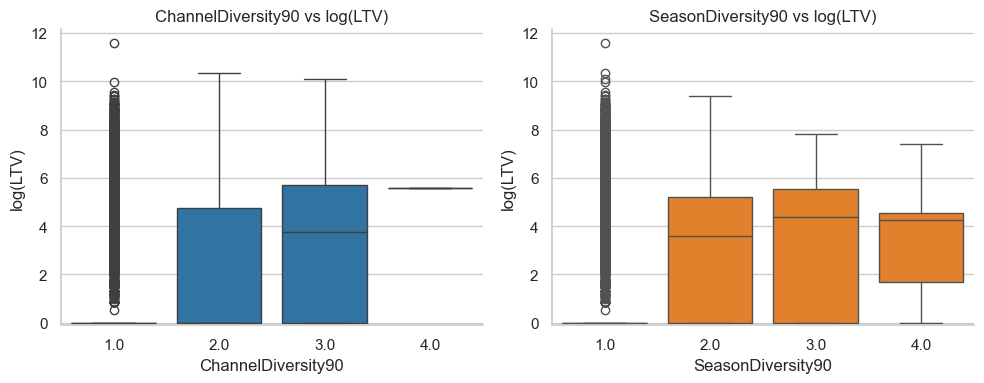

In [82]:
sns.set(style="whitegrid", palette="pastel")

plt.figure(figsize=(10, 4))

# 1️⃣ 'ChannelDiversity90'
plt.subplot(1, 2, 1)
sns.boxplot(x='ChannelDiversity90', y='log_LTV', data=donor_eda,
            color='#1f77b4')
plt.title("ChannelDiversity90 vs log(LTV)")
plt.xlabel("ChannelDiversity90")
plt.ylabel("log(LTV)")
sns.despine()
plt.ylim(-0.1, None)

# 2️⃣ SeasonDiversity90
plt.subplot(1, 2, 2)
sns.boxplot(x='SeasonDiversity90', y='log_LTV', data=donor_eda,
               color='#ff7f0e')
plt.title("SeasonDiversity90 vs log(LTV)")
plt.xlabel("SeasonDiversity90")
plt.ylabel("log(LTV)")
sns.despine()
plt.ylim(-0.1, None)

plt.tight_layout()
plt.show()

C:\Users\FITSWE\AppData\Local\Temp\ipykernel_7260\3106653857.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


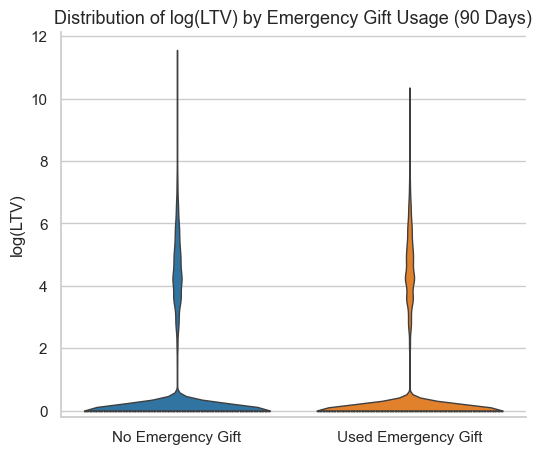

In [83]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,5))

sns.violinplot(
    data=donor_eda,
    x='UsedEmergencyGift90',
    y='log_LTV',
    palette=['#1f77b4', '#ff7f0e'],  
    inner='quartile',                     
    cut=0,
    linewidth=1                     
)

plt.xticks([0, 1], ['No Emergency Gift', 'Used Emergency Gift'])
plt.title('Distribution of log(LTV) by Emergency Gift Usage (90 Days)', fontsize=13)
plt.xlabel('')
plt.ylabel('log(LTV)')
plt.ylim(-0.2, None)
sns.despine()
plt.show()

C:\Users\FITSWE\AppData\Local\Temp\ipykernel_7260\2718059319.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


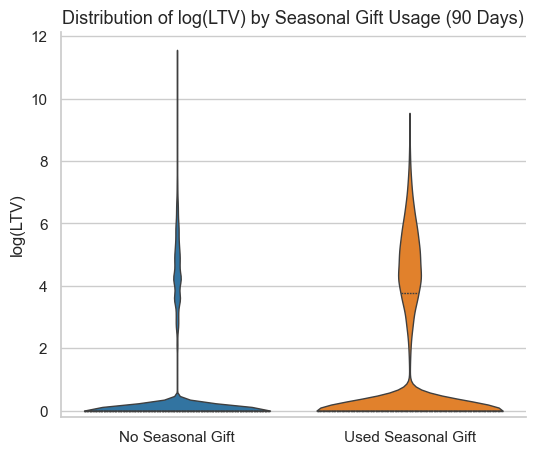

In [84]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,5))

sns.violinplot(
    data=donor_eda,
    x='UsedSeasonalGift90',
    y='log_LTV',
    palette=['#1f77b4', '#ff7f0e'],  
    inner='quartile',                   
    cut=0,                           
    linewidth=1                      
)

plt.xticks([0, 1], ['No Seasonal Gift', 'Used Seasonal Gift'])
plt.title('Distribution of log(LTV) by Seasonal Gift Usage (90 Days)', fontsize=13)
plt.xlabel('')
plt.ylabel('log(LTV)')
sns.despine()
plt.ylim(-0.2, None)
plt.show()

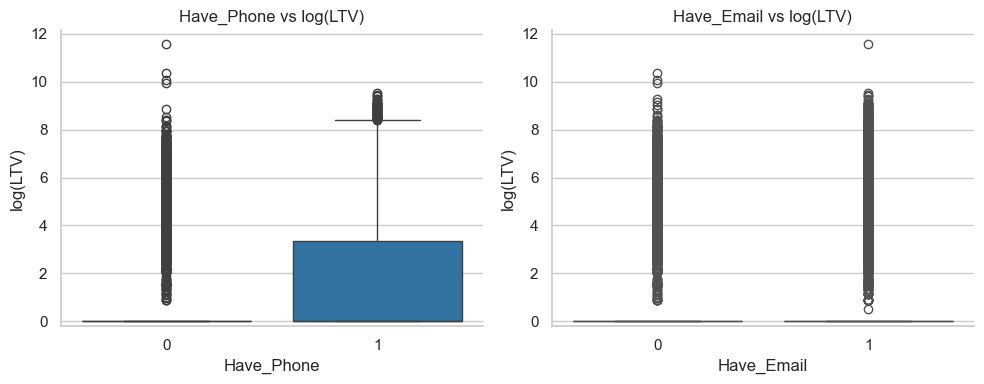

In [85]:
sns.set(style="whitegrid", palette="pastel")

plt.figure(figsize=(10, 4))

# 1️⃣ 'Have_Phone'
plt.subplot(1, 2, 1)
sns.boxplot(x='Have_Phone', y='log_LTV', data=donor_eda,
            color='#1f77b4')
plt.title("Have_Phone vs log(LTV)")
plt.xlabel("Have_Phone")
plt.ylabel("log(LTV)")
sns.despine()
plt.ylim(-0.2, None)

# 2️⃣ Have_Email
plt.subplot(1, 2, 2)
sns.boxplot(x='Have_Email', y='log_LTV', data=donor_eda,
               color='#ff7f0e')
plt.title("Have_Email vs log(LTV)")
plt.xlabel("Have_Email")
plt.ylabel("log(LTV)")
sns.despine()
plt.ylim(-0.2, None)


plt.tight_layout()
plt.show()

### 3.3 Multivariate

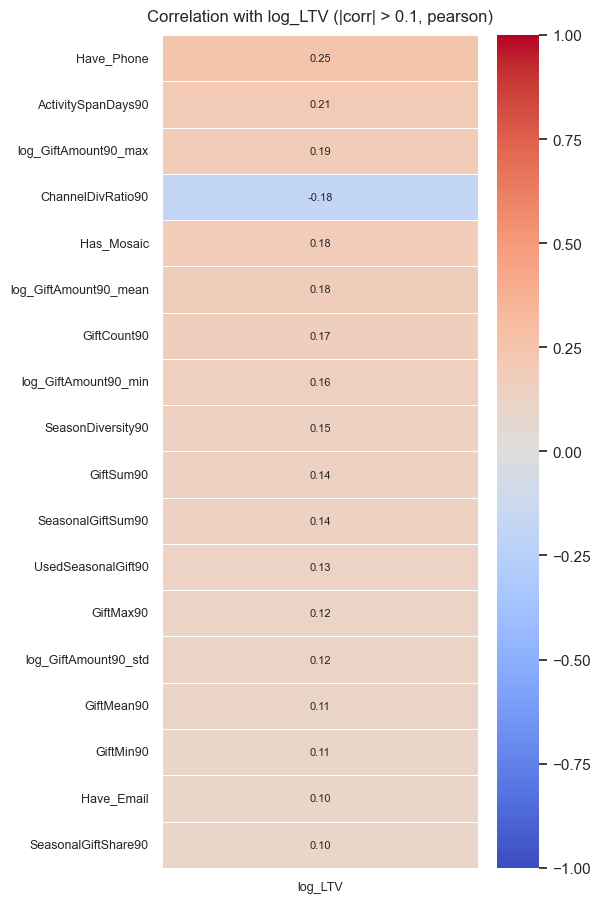

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ===== 설정 =====
METHOD     = 'pearson'     # 'pearson' or 'spearman'
THRESH     = 0.10          # |corr| threshold
MAX_CARD   = 50            # Maximum number of unique categories allowed for OHE
DROP_FIRST = True          # Drop the reference category when performing OHE
EXCLUDE    = ['SupporterID', 'MosaicGroup_Name', 'LTV', 'Positive_LTV']

df = donor_eda.copy()

# 1) Basic cleaning
df = df.drop(columns=[c for c in EXCLUDE if c in df.columns], errors='ignore')
df = df.dropna(subset=['log_LTV']).copy()

# 2) Remove datetime columns
dt_cols = df.select_dtypes(include=['datetime64[ns]']).columns
df = df.drop(columns=dt_cols, errors='ignore')

# (Optional) Standardize Gender labels (only if exists)
if 'Gender' in df.columns:
    df['Gender'] = (df['Gender'].astype(str).str.strip()
                    .replace({'F':'Female','M':'Male','U':'Unknown',
                              'FEMALE':'Female','MALE':'Male','UNKNOWN':'Unknown'})
                    .str.title())

# 3) One-hot encode categorical variables (exclude high-cardinality ones)
obj_cat = df.select_dtypes(include=['object','category']).columns.tolist()
high_card = [c for c in obj_cat if df[c].nunique(dropna=True) > MAX_CARD]
use_cats  = [c for c in obj_cat if c not in high_card]
df_enc = pd.get_dummies(df, columns=use_cats, drop_first=DROP_FIRST)

# Remove any remaining object-type columns
left_obj = df_enc.select_dtypes(include=['object']).columns
df_enc = df_enc.drop(columns=left_obj, errors='ignore')

# 4) Compute correlation (based on log_LTV)
num_cols = df_enc.select_dtypes(include=['number']).columns
corr_all = df_enc[num_cols].corr(method=METHOD)
corr_vec = corr_all['log_LTV'].drop(labels=['log_LTV'], errors='ignore').dropna()

# 5) Filter by threshold and sort
corr_keep = corr_vec[corr_vec.abs() > THRESH].sort_values(key=lambda s: s.abs(), ascending=False)

# (Safety) If nothing remains, show top 25 by absolute correlation
if corr_keep.empty:
    corr_keep = corr_vec.reindex(corr_vec.abs().sort_values(ascending=False).index).head(25)

# 6) N×1 heatmap (vertical list)
mat = corr_keep.to_frame(name='log_LTV')   # index=feature, col='log_LTV'

# Adjust figure height automatically based on number of variables
n = mat.shape[0]
fig_h = min(20, max(6, 0.4*n + 2))

plt.figure(figsize=(6, fig_h))
ax = sns.heatmap(
    mat, cmap='coolwarm', center=0, vmin=-1, vmax=1,
    cbar=True, annot=True, fmt=".2f",
    linewidths=0.5, linecolor='white',
    annot_kws={"size":8}
)

ax.set_title(f"Correlation with log_LTV (|corr| > {THRESH}, {METHOD})", pad=10)
ax.set_xlabel("")      # Hide column label
ax.set_ylabel("")      # Hide row label
ax.tick_params(axis='y', labelsize=9)  # Improve vertical label readability
ax.tick_params(axis='x', labelsize=9)
plt.tight_layout()
plt.savefig("EDA3.1.png")
plt.show()


# 4.0 Feature Engineering

In [87]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [88]:
# Apply OOF encoding to high-cardinality features (to prevent leakage) and one-hot encoding to smaller categorical variables
from category_encoders import TargetEncoder
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd

# ---- 0) Choose columns ----
target_col = "log_LTV"
oof_cols   = ["PostCode", "DOMINANT_MOSAIC_TYPE"]          # high-cardinality → OOF target encode
onehot_cols= ["Age_Bucket","Gender","State","DOMINANT_MOSAIC_GROUP"]  # small-cardinality → one-hot

# ---- 1) OOF target-encoding helper ----
def oof_target_encode(X, y, cols, n_splits=5, seed=42):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=seed)
    X = X.copy()
    y = y.copy()
    enc_df = pd.DataFrame(index=X.index)

    for col in cols:
        vals = np.zeros(len(X), dtype=float)
        for tr_idx, va_idx in kf.split(X):
            te = TargetEncoder(cols=[col])
            te.fit(X.iloc[tr_idx][[col]], y.iloc[tr_idx])
            vals[va_idx] = te.transform(X.iloc[va_idx][[col]])[col].values
        enc_df[col + "_oof"] = vals
    return enc_df

# ---- 2) Start from donor_model (no prior TE applied) ----
X_base = donor_model.copy()

# (Optional) ensure OOF columns are strings
for c in oof_cols:
    X_base[c] = X_base[c].astype(str)

y = X_base[target_col]

# ---- 3) Build feature matrix with OOF only ----
#    a) create OOF features
enc_oof = oof_target_encode(X_base[oof_cols], y, oof_cols, n_splits=5, seed=42)

#    b) drop original OOF source columns and join encoded ones
X_base = X_base.drop(columns=oof_cols).join(enc_oof)

#    c) one-hot encode small categorical features (do NOT include OOF’ed columns here)
donor_final = pd.get_dummies(X_base, columns=onehot_cols, drop_first=True)

# ---- 4) Light cleanup (as you had)
donor_final = donor_final.drop(columns=["SupporterID","FirstGiftDate90","LastGiftDate90", "Frequency90", "MonetaryTotal90", "MonetaryAvg90"], errors="ignore")
for col in ["GiftAmount_std","log_GiftAmount_std"]:
    if col in donor_final.columns:
        donor_final[col] = donor_final[col].fillna(0)
bool_cols = donor_final.select_dtypes(include="bool").columns
donor_final[bool_cols] = donor_final[bool_cols].astype("int8")

# ---- 5) Sanity checks
print(donor_final.dtypes.value_counts())
print(donor_final.shape)
print(donor_final.isna().mean().sort_values(ascending=False).head(10))


float64    42
int8       31
int64       5
object      1
Name: count, dtype: int64
(133086, 79)
log_GiftAmount90_std      0.927002
GiftStd90                 0.927002
MosaicGroup_Name          0.190463
Mosaic_Age_Rank           0.000000
Mosaic_Children_Rank      0.000000
Have_Phone                0.000000
Have_Email                0.000000
Mosaic_Remoteness_Rank    0.000000
Mosaic_HouseType_Rank     0.000000
Mosaic_Residency_Rank     0.000000
dtype: float64


In [89]:
# --- Save full-train TargetEncoders for test-time use ---
encoders = {}
for col in oof_cols:
    te_full = TargetEncoder(cols=[col])
    te_full.fit(donor_model[[col]].astype(str), donor_model[target_col])   # fit on FULL train
    encoders[col] = te_full

# Keep a clean list of FEATURE columns to align test later
feature_cols = donor_final.columns.tolist()
for drop_col in [target_col, "LTV", "Positive_LTV"]:
    if drop_col in feature_cols:
        feature_cols.remove(drop_col)

count    133086.000000
mean          0.913409
std           1.913162
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          11.568370
Name: log_LTV, dtype: float64
log_GiftAmount90_std      0.927002
GiftStd90                 0.927002
MosaicGroup_Name          0.190463
Mosaic_Age_Rank           0.000000
Mosaic_Children_Rank      0.000000
Have_Phone                0.000000
Have_Email                0.000000
Mosaic_Remoteness_Rank    0.000000
Mosaic_HouseType_Rank     0.000000
Mosaic_Residency_Rank     0.000000
dtype: float64
float64    42
int8       31
int64       5
object      1
Name: count, dtype: int64
(133086, 79)


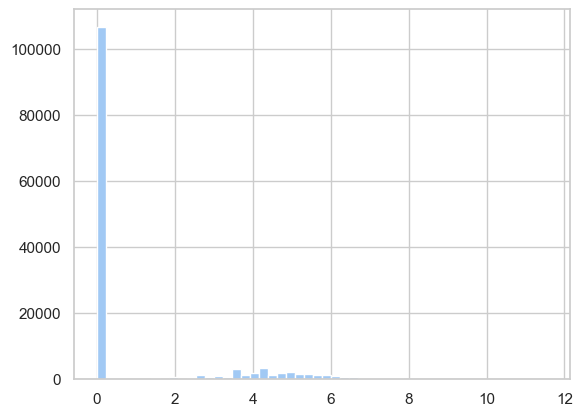

In [90]:
# Inspect donor_final dataframe after encoding

# 1. Target distribution
print(donor_final["log_LTV"].describe())
donor_final["log_LTV"].hist(bins=50)
# 2. Missing values
print(donor_final.isna().mean().sort_values(ascending=False).head(10))
# 3. Feature dtypes
print(donor_final.dtypes.value_counts())
# 4. Size of dataset
print(donor_final.shape)

In [91]:
# Clean and optimise donor_final
# for col in ["GiftStd90","log_GiftAmount90_std"]:
#     donor_final[col] = donor_final[col].fillna(0)
donor_final = donor_final.drop(columns=["GiftStd90", "log_GiftAmount90_std"], errors="ignore")
donor_final = donor_final.drop(columns=["SupporterID","FirstGiftDate90","LastGiftDate90"], errors="ignore")
bool_cols = donor_final.select_dtypes(include="bool").columns
donor_final[bool_cols] = donor_final[bool_cols].astype("int8")

In [92]:
# Display top most correlated featured with log_LTV
## Select only numeric columns
num_cols = donor_final.select_dtypes(include=[np.number]).columns
## Drop target to avoid self-correlation
num_cols = [c for c in num_cols if c not in ["log_LTV","LTV","Positive_LTV"]]
## Compute correlations
corrs = donor_final[num_cols].corrwith(donor_final["log_LTV"]).sort_values(key=np.abs, ascending=False)
print("Top correlations with log_LTV:")
print(corrs.head(20))

C:\Users\FITSWE\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\FITSWE\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Top correlations with log_LTV:
Phone_x_Frequency                0.282499
Have_Phone                       0.246748
Freq_x_Monetary                  0.215891
ActivitySpanDays90               0.210716
log_GiftAmount90_max             0.189618
ChannelDivRatio90               -0.183486
DOMINANT_MOSAIC_TYPE_oof         0.182396
DOMINANT_MOSAIC_GROUP_Unknown   -0.180883
Has_Mosaic                       0.180883
log_GiftAmount90_mean            0.176800
Email_x_Frequency                0.175745
PostCode_oof                     0.174833
State_Unknown                   -0.172002
Gender_Unknown                  -0.171957
GiftCount90                      0.167269
log_GiftAmount90_min             0.162915
SeasonDiversity90                0.148369
GiftSum90                        0.141043
SeasonalGiftSum90                0.135694
UsedSeasonalGift90               0.127718
dtype: float64


In [93]:
# Inspect donor_final dataframe
print(donor_final.shape)
print(donor_final.dtypes.value_counts())
print(donor_final.isna().mean().sort_values(ascending=False).head(10))

# Drop leftover object columns that cause trouble
donor_final = donor_final.drop(columns=["MosaicGroup_Name"], errors="ignore")
# Double-check object types
print(donor_final.select_dtypes(include="object").columns)

# Final inspection of donor_final dataframe
print(donor_final.shape)
print(donor_final.dtypes.value_counts())
print(donor_final.isna().mean().sort_values(ascending=False).head(10))

(133086, 77)
float64    40
int8       31
int64       5
object      1
Name: count, dtype: int64
MosaicGroup_Name          0.190463
Have_Phone                0.000000
Have_Email                0.000000
Mosaic_Age_Rank           0.000000
Mosaic_Children_Rank      0.000000
Mosaic_Income_Rank        0.000000
Mosaic_HousePrice_Rank    0.000000
Mosaic_Remoteness_Rank    0.000000
Mosaic_HouseType_Rank     0.000000
Mosaic_Residency_Rank     0.000000
dtype: float64
Index([], dtype='object')
(133086, 76)
float64    40
int8       31
int64       5
Name: count, dtype: int64
Have_Phone                0.0
Have_Email                0.0
Mosaic_Age_Rank           0.0
Mosaic_Children_Rank      0.0
Mosaic_Income_Rank        0.0
Mosaic_HousePrice_Rank    0.0
Mosaic_Remoteness_Rank    0.0
Mosaic_HouseType_Rank     0.0
Mosaic_Residency_Rank     0.0
Mosaic_Birthplace_Rank    0.0
dtype: float64


In [94]:
print(donor_final.columns.tolist())
donor_final.info()

['Have_Phone', 'Have_Email', 'Mosaic_Age_Rank', 'Mosaic_Children_Rank', 'Mosaic_Income_Rank', 'Mosaic_HousePrice_Rank', 'Mosaic_Remoteness_Rank', 'Mosaic_HouseType_Rank', 'Mosaic_Residency_Rank', 'Mosaic_Birthplace_Rank', 'Mosaic_Wealth_Rank', 'Digital_Engagement_Score', 'Mail_Engagement_Score', 'Has_Mosaic', 'Has_Mosaic_Score', 'LTV', 'log_LTV', 'Positive_LTV', 'GiftCount90', 'GiftSum90', 'GiftMean90', 'GiftMax90', 'GiftMin90', 'log_GiftAmount90_mean', 'log_GiftAmount90_max', 'log_GiftAmount90_min', 'EmergencyGiftSum90', 'SeasonalGiftSum90', 'ChannelDiversity90', 'CampaignDiversity90', 'SeasonDiversity90', 'ProductTypeDiversity90', 'UsedEmergencyGift90', 'UsedSeasonalGift90', 'UsedRegularGiving90', 'EmergencyGiftShare90', 'SeasonalGiftShare90', 'ChannelDivRatio90', 'ActivitySpanDays90', 'Recency90', 'Freq_x_Monetary', 'Email_x_Frequency', 'Phone_x_Frequency', 'PostCode_oof', 'DOMINANT_MOSAIC_TYPE_oof', 'Age_Bucket_31-40', 'Age_Bucket_41-50', 'Age_Bucket_51-60', 'Age_Bucket_61-70', 'Ag

# 5.0 Modelling

## 5.1 Ridge/LogReg baseline

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, RidgeCV, ElasticNetCV
from sklearn.metrics import (
    roc_auc_score, f1_score,
    mean_squared_error, mean_absolute_error, r2_score
)

# ------------------------------
# STEP 1: Prepare Data
# ------------------------------
X = donor_final.drop(columns=["LTV", "log_LTV", "Positive_LTV"])
y_class = donor_final["Positive_LTV"]
y_reg = donor_final["log_LTV"]

# Keep numeric features only
X_num = X.select_dtypes(include=[np.number])

# Train/vali split
X_train, X_vali, y_class_train, y_class_vali, y_reg_train, y_reg_vali = train_test_split(
    X_num, y_class, y_reg, test_size=0.2, random_state=42, stratify=y_class
)

# ------------------------------
# STEP 2: Scale but KEEP COLUMN NAMES
# ------------------------------
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns,
    index=X_train.index
)
X_vali_scaled = pd.DataFrame(
    scaler.transform(X_vali),
    columns=X_vali.columns,
    index=X_vali.index
)

def rmse(y_true, y_pred): 
    return np.sqrt(mean_squared_error(y_true, y_pred))

# ------------------------------
# STEP 3: Logistic Regression (Classifier)
# ------------------------------
clf = LogisticRegression(max_iter=2000, class_weight="balanced", solver="lbfgs")
clf.fit(X_train_scaled, y_class_train)

p_vali = clf.predict_proba(X_vali_scaled)[:, 1]

print("\n=== Logistic Classifier ===")
print("AUC :", roc_auc_score(y_class_vali, p_vali))
print("F1  :", f1_score(y_class_vali, (p_vali > 0.5).astype(int)))

# ------------------------------
# STEP 4: Ridge & ElasticNet (Regressors on Positives)
# ------------------------------
X_train_reg = X_train_scaled.loc[y_class_train == 1]
y_train_reg = y_reg_train[y_class_train == 1]

X_vali_reg  = X_vali_scaled.loc[y_class_vali == 1]
y_vali_reg  = y_reg_vali[y_class_vali == 1]

ridge = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)
ridge.fit(X_train_reg, y_train_reg)
y_pred_reg_ridge = ridge.predict(X_vali_reg)

enet = ElasticNetCV(l1_ratio=[0.1, 0.5, 0.9], cv=5, random_state=42, max_iter=5000)
enet.fit(X_train_reg, y_train_reg)
y_pred_reg_enet = enet.predict(X_vali_reg)

print("\n=== Ridge Regressor ===")
print("RMSE:", rmse(y_vali_reg, y_pred_reg_ridge))
print("MAE :", mean_absolute_error(y_vali_reg, y_pred_reg_ridge))
print("R²  :", r2_score(y_vali_reg, y_pred_reg_ridge))

print("\n=== ElasticNet Regressor ===")
print("RMSE:", rmse(y_vali_reg, y_pred_reg_enet))
print("MAE :", mean_absolute_error(y_vali_reg, y_pred_reg_enet))
print("R²  :", r2_score(y_vali_reg, y_pred_reg_enet))

# ------------------------------
# STEP 5: Combined Hurdle Model ($ space)
# ------------------------------
log_ltv_pred_all = ridge.predict(X_vali_scaled)
ltv_pos_pred_all = np.expm1(log_ltv_pred_all)
expected_ltv = p_vali * ltv_pos_pred_all
y_vali_dollar = np.expm1(y_reg_vali)

print("\n=== Combined Hurdle Model (in $ Space) ===")
print("RMSE ($):", rmse(y_vali_dollar, expected_ltv))
print("MAE  ($):", mean_absolute_error(y_vali_dollar, expected_ltv))
print("Mean Actual LTV ($):", np.mean(y_vali_dollar))
print("Mean Predicted LTV ($):", np.mean(expected_ltv))


=== Logistic Classifier ===
AUC : 0.7457384538815119
F1  : 0.44926152636603583

=== Ridge Regressor ===
RMSE: 0.936796184744556
MAE : 0.7348020789990923
R²  : 0.41096727895714125

=== ElasticNet Regressor ===
RMSE: 0.9368245659101426
MAE : 0.7354684431028128
R²  : 0.41093158776048655

=== Combined Hurdle Model (in $ Space) ===
RMSE ($): 258.32896338103075
MAE  ($): 69.62876489373915
Mean Actual LTV ($): 44.45799196032759
Mean Predicted LTV ($): 56.14573290368054


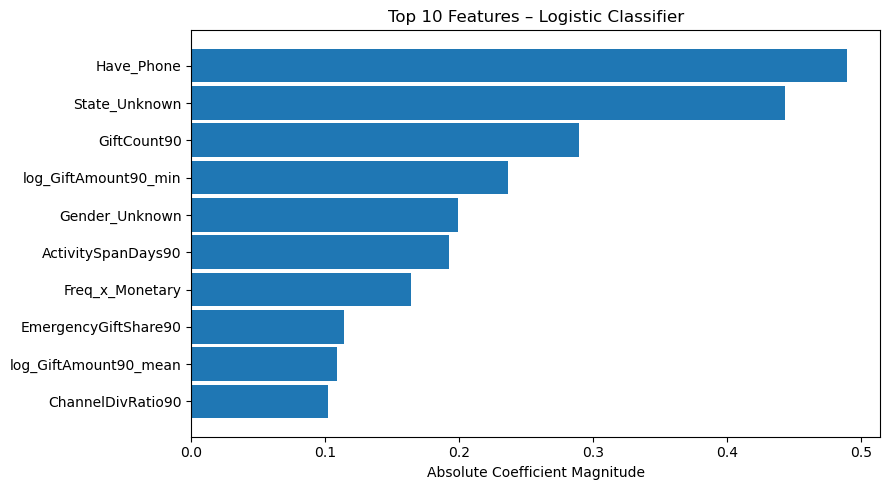

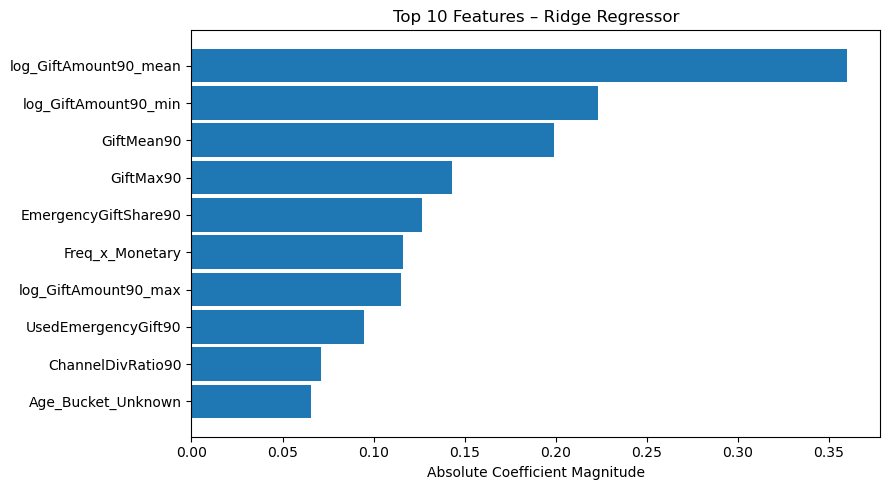

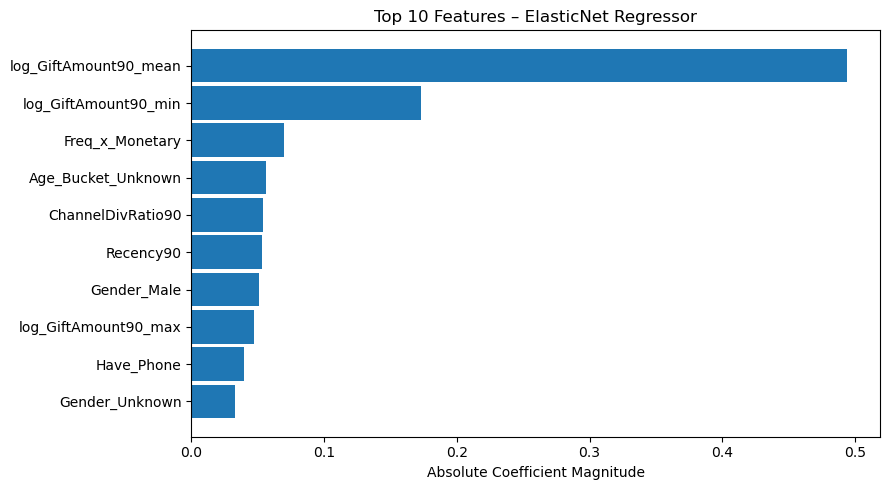

In [65]:
def plot_top_features(model, X, title, top_n=10):
    coef = pd.Series(model.coef_.flatten(), index=X.columns)
    coef_abs = coef.abs().sort_values(ascending=False).head(top_n)
    
    plt.figure(figsize=(9,5))
    plt.barh(coef_abs.index, coef_abs.values, height=0.9)
    plt.title(title)
    plt.xlabel("Absolute Coefficient Magnitude")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

plot_top_features(clf, X_train_scaled, "Top 10 Features – Logistic Classifier")
plot_top_features(ridge, X_train_scaled, "Top 10 Features – Ridge Regressor")
plot_top_features(enet, X_train_scaled, "Top 10 Features – ElasticNet Regressor")

## 5.2 XGBoost

In [66]:
!pip install xgboost

In [67]:
pip install -U xgboost

Note: you may need to restart the kernel to use updated packages.


### 5.2.1 XGB without early stopping

In [68]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    roc_auc_score, f1_score, average_precision_score,
    mean_squared_error, mean_absolute_error, r2_score
)

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# ------------------------------
# STEP 1: Prepare Data
# ------------------------------
X = donor_final.drop(columns=["LTV", "log_LTV", "Positive_LTV"])
y_class = donor_final["Positive_LTV"]
y_reg   = donor_final["log_LTV"]

X_num = X.select_dtypes(include=[np.number])

X_train, X_vali, y_class_train, y_class_vali, y_reg_train, y_reg_vali = train_test_split(
    X_num, y_class, y_reg, test_size=0.2, random_state=42, stratify=y_class
)

# ------------------------------
# STEP 2: Classifier (XGB without Early Stopping)
# ------------------------------
pos = y_class_train.value_counts().get(1, 1)
neg = y_class_train.value_counts().get(0, 1)
scale_pos = max(neg / pos, 1.0)

clf = xgb.XGBClassifier(
    n_estimators=1000,  # smaller because no stopping
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos,
    tree_method="hist",
    eval_metric="auc",
    random_state=42,
    n_jobs=-1
)

clf.fit(X_train, y_class_train, verbose=False)
p_vali = clf.predict_proba(X_vali)[:, 1]

print("\n=== XGB Classifier (no Early Stopping) ===")
print("AUC     :", roc_auc_score(y_class_vali, p_vali))
print("PR-AUC  :", average_precision_score(y_class_vali, p_vali))
print("F1@0.50 :", f1_score(y_class_vali, (p_vali > 0.5).astype(int)))

# ------------------------------
# STEP 3: Regressor (on positives only, no Early Stopping)
# ------------------------------
pos_tr = (y_class_train == 1)
pos_te = (y_class_vali == 1)

X_train_reg = X_train[pos_tr]
y_train_reg = y_reg_train[pos_tr]
X_vali_reg  = X_vali[pos_te]
y_vali_reg  = y_reg_vali[pos_te]

reg = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    tree_method="hist",
    random_state=42,
    n_jobs=-1
)

reg.fit(X_train_reg, y_train_reg, verbose=False)
y_pred_reg = reg.predict(X_vali_reg)

print("\n=== XGB Regressor (no Early Stopping) ===")
print("RMSE(log):", rmse(y_vali_reg, y_pred_reg))
print("MAE (log):", mean_absolute_error(y_vali_reg, y_pred_reg))
print("R²   (log):", r2_score(y_vali_reg, y_pred_reg))

# ------------------------------
# STEP 4: Combined Hurdle Model
# ------------------------------
log_ltv_pred_all = reg.predict(X_vali)
ltv_pos_pred_all = np.expm1(log_ltv_pred_all)
expected_ltv = p_vali * ltv_pos_pred_all
y_vali_dollar = np.expm1(y_reg_vali)

print("\n=== Combined Hurdle Model (no Early Stopping) ===")
print("RMSE ($):", rmse(y_vali_dollar, expected_ltv))
print("MAE  ($):", mean_absolute_error(y_vali_dollar, expected_ltv))
print("Mean Actual ($):", y_vali_dollar.mean())
print("Mean Pred   ($):", expected_ltv.mean())


=== XGB Classifier (no Early Stopping) ===
AUC     : 0.7790112401864837
PR-AUC  : 0.4685259616342814
F1@0.50 : 0.4861892917921194

=== XGB Regressor (no Early Stopping) ===
RMSE(log): 0.9579081533934019
MAE (log): 0.7480574119858978
R²   (log): 0.3841188192193077

=== Combined Hurdle Model (no Early Stopping) ===
RMSE ($): 215.20109968460238
MAE  ($): 64.58840253387098
Mean Actual ($): 44.45799196032759
Mean Pred   ($): 52.54015


### 5.2.2 XGboost with early stopping

In [69]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    roc_auc_score, f1_score, average_precision_score,
    mean_squared_error, mean_absolute_error, r2_score
)

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# ------------------------------
# STEP 1: Prepare Data
# ------------------------------
X = donor_final.drop(columns=["LTV","log_LTV","Positive_LTV"])
y_class = donor_final["Positive_LTV"]
y_reg   = donor_final["log_LTV"]

X_num = X.select_dtypes(include=[np.number])

X_train, X_vali, y_class_train, y_class_vali, y_reg_train, y_reg_vali = train_test_split(
    X_num, y_class, y_reg, test_size=0.2, random_state=42, stratify=y_class
)

# ------------------------------
# STEP 2: XGBoost CLASSIFIER with Early Stopping (native API)
# ------------------------------
pos = y_class_train.value_counts().get(1, 1)
neg = y_class_train.value_counts().get(0, 1)
scale_pos = max(neg / pos, 1.0)

dtrain_cls = xgb.DMatrix(X_train, label=y_class_train)
dvalid_cls = xgb.DMatrix(X_vali, label=y_class_vali)

params_cls = {
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "learning_rate": 0.03,
    "max_depth": 6,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "scale_pos_weight": scale_pos,
    "tree_method": "hist",
    "seed": 42
}

watchlist = [(dtrain_cls, "train"), (dvalid_cls, "valid")]

clf = xgb.train(
    params=params_cls,
    dtrain=dtrain_cls,
    num_boost_round=4000,
    evals=watchlist,
    early_stopping_rounds=100,
    verbose_eval=False
)

p_vali = clf.predict(dvalid_cls)

print("\n=== XGB Classifier (early stopping via native API) ===")
print("AUC     :", roc_auc_score(y_class_vali, p_vali))
print("PR-AUC  :", average_precision_score(y_class_vali, p_vali))
print("F1@0.50 :", f1_score(y_class_vali, (p_vali > 0.5).astype(int)))


# ------------------------------
# STEP 3: XGBoost REGRESSOR (positives only) with Early Stopping
# ------------------------------
pos_tr = (y_class_train == 1)
pos_te = (y_class_vali == 1)

X_train_reg = X_train[pos_tr]
y_train_reg = y_reg_train[pos_tr]
X_vali_reg  = X_vali[pos_te]
y_vali_reg  = y_reg_vali[pos_te]

dtrain_reg = xgb.DMatrix(X_train_reg, label=y_train_reg)
dvalid_reg = xgb.DMatrix(X_vali_reg,  label=y_vali_reg)

params_reg = {
    "objective": "reg:squarederror",
    "eval_metric": "rmse",
    "learning_rate": 0.03,
    "max_depth": 6,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "tree_method": "hist",
    "seed": 42
}

watchlist_reg = [(dtrain_reg, "train"), (dvalid_reg, "valid")]

reg = xgb.train(
    params=params_reg,
    dtrain=dtrain_reg,
    num_boost_round=4000,
    evals=watchlist_reg,
    early_stopping_rounds=100,
    verbose_eval=False
)

y_pred_reg = reg.predict(dvalid_reg)

print("\n=== XGB Regressor (log-LTV, native API) ===")
print("RMSE(log):", rmse(y_vali_reg, y_pred_reg))
print("MAE (log):", mean_absolute_error(y_vali_reg, y_pred_reg))
print("R²   (log):", r2_score(y_vali_reg, y_pred_reg))

# ------------------------------
# STEP 4: Combined Hurdle Model
# ------------------------------
dvali_all = xgb.DMatrix(X_vali)
log_ltv_pred_all = reg.predict(dvali_all)
ltv_pos_pred_all = np.expm1(log_ltv_pred_all)

expected_ltv = p_vali * ltv_pos_pred_all
y_vali_dollar = np.expm1(y_reg_vali)

print("\n=== Combined Hurdle Model (Early Stopping, Native API) ===")
print("RMSE ($):", rmse(y_vali_dollar, expected_ltv))
print("MAE  ($):", mean_absolute_error(y_vali_dollar, expected_ltv))
print("Mean Actual ($):", np.mean(y_vali_dollar))
print("Mean Pred   ($):", np.mean(expected_ltv))


=== XGB Classifier (early stopping via native API) ===
AUC     : 0.7880165830132909
PR-AUC  : 0.48038475983540607
F1@0.50 : 0.4859508127379298

=== XGB Regressor (log-LTV, native API) ===
RMSE(log): 0.9283619734303118
MAE (log): 0.7268536777150952
R²   (log): 0.4215259518594714

=== Combined Hurdle Model (Early Stopping, Native API) ===
RMSE ($): 215.21058518995895
MAE  ($): 65.1936589952085
Mean Actual ($): 44.45799196032759
Mean Pred   ($): 53.043552


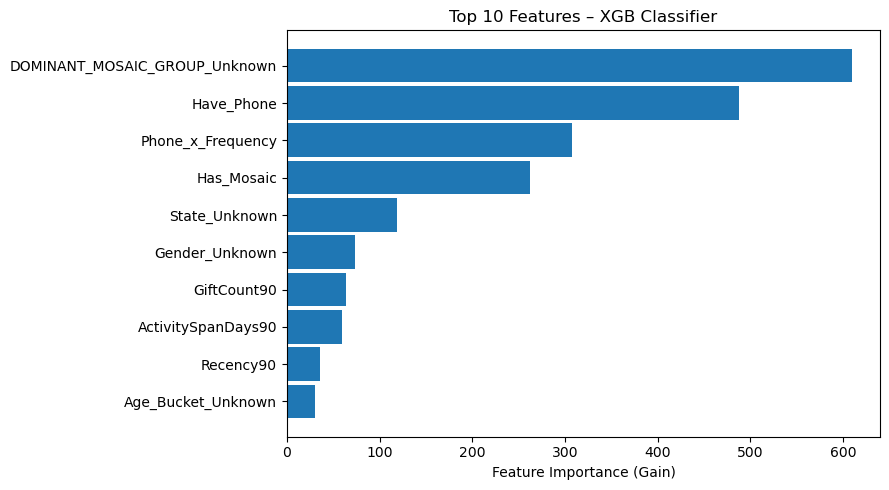

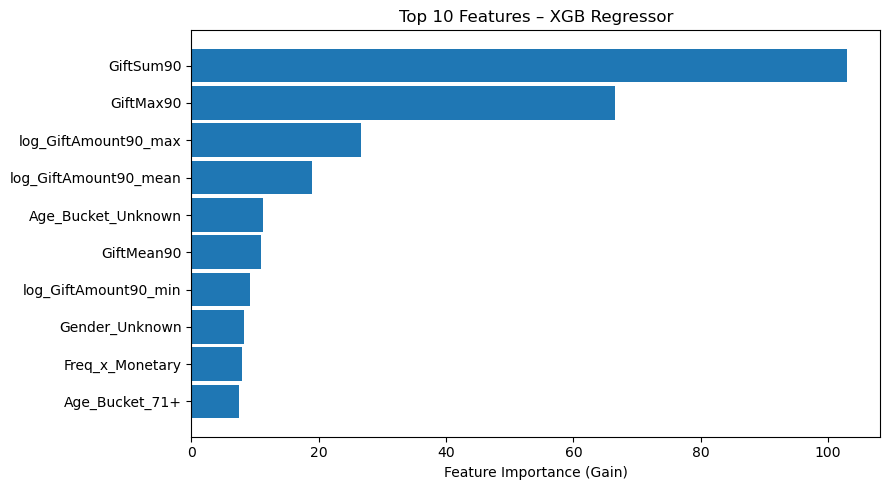

In [70]:
import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb


# ---- Classifier Feature Importance ----
clf_imp = clf.get_score(importance_type='gain')
clf_imp_df = pd.DataFrame.from_dict(clf_imp, orient='index', columns=['importance']).sort_values('importance', ascending=False)

plt.figure(figsize=(9,5))
top10_clf = clf_imp_df.head(10)
plt.barh(top10_clf.index, top10_clf['importance'], height=0.9)
plt.title("Top 10 Features – XGB Classifier")
plt.xlabel("Feature Importance (Gain)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# ---- Regressor Feature Importance ----
reg_imp = reg.get_score(importance_type='gain')
reg_imp_df = pd.DataFrame.from_dict(reg_imp, orient='index', columns=['importance']).sort_values('importance', ascending=False)

plt.figure(figsize=(9,5))
top10_reg = reg_imp_df.head(10)
plt.barh(top10_reg.index, top10_reg['importance'], height=0.9)
plt.title("Top 10 Features – XGB Regressor")
plt.xlabel("Feature Importance (Gain)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### 5.2.3 3rd iteration

In [71]:
# =====================================
# Iteration 5b – Hurdle Model with Strong Features Only
# =====================================
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    roc_auc_score, f1_score, average_precision_score,
    mean_squared_error, mean_absolute_error, r2_score
)

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# ------------------------------
# STEP 1: Prepare Data
# ------------------------------
X = donor_final.drop(columns=["LTV", "log_LTV", "Positive_LTV"])
y_class = donor_final["Positive_LTV"]
y_reg   = donor_final["log_LTV"]
X_num = X.select_dtypes(include=[np.number])

# ------------------------------
# STEP 2: Keep Only Strong Features (importance ≥ 0.005)
# ------------------------------
# assume `feat_imp_clf` from your earlier XGB classifier exists
strong_features = clf_imp_df[clf_imp_df >= 0.005].index.tolist()
X_strong = X_num[strong_features].copy()

print(f"✅ Using {len(strong_features)} strong features (importance ≥ 0.005)")
print("Features:", strong_features)

# # ------------------------------
# # STEP 2: Extract and Save Feature Importances
# # ------------------------------
# # After your previous XGB model was trained (or now if this is your main iteration)

# # 1️⃣ Get feature importances from classifier
# clf_imp = clf_strong.get_score(importance_type='gain')

# # 2️⃣ Convert to Series (so it behaves like clf_imp_df)
# clf_imp_df = (
#     pd.Series(clf_imp)
#     .sort_values(ascending=False)
#     .rename("importance")
# )

# # 3️⃣ (Optional) Save importances for reference
# clf_imp_df.to_csv("xgb_feature_importances.csv")
# print("✅ Saved feature importances to xgb_feature_importances.csv")

# # 4️⃣ Select strong features with importance ≥ 0.005
# strong_features = clf_imp_df[clf_imp_df >= 0.005].index.tolist()
# X_strong = X_num[strong_features].copy()

# print(f"✅ Using {len(strong_features)} strong features (importance ≥ 0.005)")
# print("Features:", strong_features)


# ------------------------------
# STEP 3: Train/Test Split
# ------------------------------
X_train, X_vali, y_class_train, y_class_vali, y_reg_train, y_reg_vali = train_test_split(
    X_strong, y_class, y_reg, test_size=0.2, random_state=42, stratify=y_class
)

# ------------------------------
# STEP 4: CLASSIFIER (Early Stopping)
# ------------------------------
pos = y_class_train.value_counts().get(1, 1)
neg = y_class_train.value_counts().get(0, 1)
scale_pos = max(neg / pos, 1.0)

dtrain_cls = xgb.DMatrix(X_train, label=y_class_train)
dvalid_cls = xgb.DMatrix(X_vali, label=y_class_vali)

params_cls = {
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "learning_rate": 0.03,
    "max_depth": 6,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "scale_pos_weight": scale_pos,
    "tree_method": "hist",
    "seed": 42
}

clf_strong = xgb.train(
    params=params_cls,
    dtrain=dtrain_cls,
    num_boost_round=4000,
    evals=[(dtrain_cls, "train"), (dvalid_cls, "valid")],
    early_stopping_rounds=100,
    verbose_eval=False
)

p_vali = clf_strong.predict(dvalid_cls)

print("\n=== XGB Classifier (Strong Features Only) ===")
print("AUC     :", roc_auc_score(y_class_vali, p_vali))
print("PR-AUC  :", average_precision_score(y_class_vali, p_vali))
print("F1@0.5  :", f1_score(y_class_vali, (p_vali > 0.5).astype(int)))

# ------------------------------
# STEP 5: REGRESSOR (positives only)
# ------------------------------
pos_tr = (y_class_train == 1)
pos_te = (y_class_vali == 1)

dtrain_reg = xgb.DMatrix(X_train[pos_tr], label=y_reg_train[pos_tr])
dvalid_reg = xgb.DMatrix(X_vali[pos_te], label=y_reg_vali[pos_te])

params_reg = {
    "objective": "reg:squarederror",
    "eval_metric": "rmse",
    "learning_rate": 0.03,
    "max_depth": 6,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "tree_method": "hist",
    "seed": 42
}

reg_strong = xgb.train(
    params=params_reg,
    dtrain=dtrain_reg,
    num_boost_round=4000,
    evals=[(dtrain_reg, "train"), (dvalid_reg, "valid")],
    early_stopping_rounds=100,
    verbose_eval=False
)

y_pred_reg = reg_strong.predict(dvalid_reg)

print("\n=== XGB Regressor (Strong Features Only) ===")
print("RMSE(log):", rmse(y_reg_vali[pos_te], y_pred_reg))
print("MAE (log):", mean_absolute_error(y_reg_vali[pos_te], y_pred_reg))
print("R²   (log):", r2_score(y_reg_vali[pos_te], y_pred_reg))

# ------------------------------
# STEP 6: Combined Hurdle Model
# ------------------------------
dvali_all = xgb.DMatrix(X_vali)
log_ltv_pred_all = reg_strong.predict(dvali_all)
ltv_pos_pred_all = np.expm1(log_ltv_pred_all)
expected_ltv = p_vali * ltv_pos_pred_all
y_vali_dollar = np.expm1(y_reg_vali)

print("\n=== Combined Hurdle Model (Strong Features Only) ===")
print("RMSE ($):", rmse(y_vali_dollar, expected_ltv))
print("MAE  ($):", mean_absolute_error(y_vali_dollar, expected_ltv))
print("Mean Actual ($):", np.mean(y_vali_dollar))
print("Mean Pred   ($):", np.mean(expected_ltv))

✅ Using 67 strong features (importance ≥ 0.005)
Features: ['DOMINANT_MOSAIC_GROUP_Unknown', 'Have_Phone', 'Phone_x_Frequency', 'Has_Mosaic', 'State_Unknown', 'Gender_Unknown', 'GiftCount90', 'ActivitySpanDays90', 'Recency90', 'Age_Bucket_Unknown', 'PostCode_oof', 'Freq_x_Monetary', 'Have_Email', 'UsedSeasonalGift90', 'Email_x_Frequency', 'Age_Bucket_71+', 'SeasonalGiftSum90', 'UsedEmergencyGift90', 'Gender_Male', 'EmergencyGiftShare90', 'SeasonalGiftShare90', 'ChannelDivRatio90', 'State_Other', 'GiftSum90', 'GiftMax90', 'GiftMean90', 'EmergencyGiftSum90', 'SeasonDiversity90', 'log_GiftAmount90_mean', 'DOMINANT_MOSAIC_GROUP_H', 'CampaignDiversity90', 'log_GiftAmount90_max', 'DOMINANT_MOSAIC_GROUP_K', 'ChannelDiversity90', 'Mosaic_Birthplace_Rank', 'DOMINANT_MOSAIC_TYPE_oof', 'Mosaic_Children_Rank', 'DOMINANT_MOSAIC_GROUP_C', 'DOMINANT_MOSAIC_GROUP_M', 'log_GiftAmount90_min', 'Mosaic_Wealth_Rank', 'Digital_Engagement_Score', 'DOMINANT_MOSAIC_GROUP_E', 'Mosaic_Residency_Rank', 'GiftMin90'

## 5.3 Decision Tree

### 5.3.1 1st iteration

In [72]:
# ==============================
# Decision Tree Hurdle (cleaned)
# ==============================
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import (
    roc_auc_score, average_precision_score, f1_score,
    mean_squared_error, mean_absolute_error, r2_score
)
import numpy as np

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# ----- STEP 1: prepare (reuse your existing split) -----
# X_train, X_vali, y_class_train, y_class_vali, y_reg_train, y_reg_vali already defined above

# ----- STEP 2: classifier (probability of positive LTV) -----
clf_tree = DecisionTreeClassifier(
    criterion="gini",
    max_depth=5,            # shallow for interpretability
    min_samples_leaf=200,   # avoid tiny leaves
    max_features="sqrt",    # reduces variance a bit
    class_weight="balanced",
    random_state=42
)
clf_tree.fit(X_train, y_class_train)
p_vali = clf_tree.predict_proba(X_vali)[:, 1]

print("\n=== Decision Tree Classifier ===")
print("AUC    :", roc_auc_score(y_class_vali, p_vali))
print("PR-AUC :", average_precision_score(y_class_vali, p_vali))
print("F1@0.5 :", f1_score(y_class_vali, (p_vali > 0.5).astype(int)))

# ----- STEP 3: regressor on positives (log-LTV | positive) -----
pos_tr = (y_class_train == 1)
pos_te = (y_class_vali  == 1)

reg_tree = DecisionTreeRegressor(
    criterion="squared_error",
    max_depth=5,
    min_samples_leaf=200,
    max_features="sqrt",
    random_state=42
)
reg_tree.fit(X_train[pos_tr], y_reg_train[pos_tr])

# Evaluate on positive subset (log-scale)
y_pred_reg_log_pos = reg_tree.predict(X_vali[pos_te])
print("\n=== Decision Tree Regressor (positives, log-scale) ===")
print("RMSE(log):", rmse(y_reg_vali[pos_te], y_pred_reg_log_pos))
print("MAE (log):", mean_absolute_error(y_reg_vali[pos_te], y_pred_reg_log_pos))
print("R²  (log):", r2_score(y_reg_vali[pos_te], y_pred_reg_log_pos))

# ----- STEP 4: Combined expected LTV in $ space (hurdle) -----
# Predict conditional log-LTV for ALL rows, convert to $, then multiply by P(positive)
log_ltv_pred_all = reg_tree.predict(X_vali)          # uses model trained on positives
ltv_pos_pred_all = np.expm1(log_ltv_pred_all)        # $ given positive
expected_ltv     = p_vali * ltv_pos_pred_all         # E[LTV] in $

y_vali_dollar = np.expm1(y_reg_vali)

print("\n=== Hurdle (Decision Tree) in $ ===")
print("RMSE ($):", rmse(y_vali_dollar, expected_ltv))
print("MAE  ($):", mean_absolute_error(y_vali_dollar, expected_ltv))
print("Mean Actual ($):", y_vali_dollar.mean())
print("Mean Pred   ($):", expected_ltv.mean())



=== Decision Tree Classifier ===
AUC    : 0.7281750900521893
PR-AUC : 0.36597292127490066
F1@0.5 : 0.4360761979575805

=== Decision Tree Regressor (positives, log-scale) ===
RMSE(log): 0.9781157767115886
MAE (log): 0.7664974000672176
R²  (log): 0.35786000243978844

=== Hurdle (Decision Tree) in $ ===
RMSE ($): 225.8167806498093
MAE  ($): 68.73766270738933
Mean Actual ($): 44.45799196032759
Mean Pred   ($): 51.82587079259476


### 5.3.2 2nd iteration - Tuning

In [73]:
# ==============================
# Decision Tree Hurdle (cleaned)
# ==============================
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import (
    roc_auc_score, average_precision_score, f1_score,
    mean_squared_error, mean_absolute_error, r2_score
)
import numpy as np

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# ----- STEP 1: prepare (reuse your existing split) -----
# X_train, X_vali, y_class_train, y_class_vali, y_reg_train, y_reg_vali already defined above

# ----- STEP 2: classifier (probability of positive LTV) -----
clf_tree = DecisionTreeClassifier(
    # criterion="gini",
    max_depth=8,            # shallow for interpretability
    min_samples_leaf=100,   # avoid tiny leaves
    max_features=None,    # reduces variance a bit
    class_weight="balanced",
    random_state=42
)
clf_tree.fit(X_train, y_class_train)
p_vali = clf_tree.predict_proba(X_vali)[:, 1]

print("\n=== Decision Tree Classifier ===")
print("AUC    :", roc_auc_score(y_class_vali, p_vali))
print("PR-AUC :", average_precision_score(y_class_vali, p_vali))
print("F1@0.5 :", f1_score(y_class_vali, (p_vali > 0.5).astype(int)))

# ----- STEP 3: regressor on positives (log-LTV | positive) -----
pos_tr = (y_class_train == 1)
pos_te = (y_class_vali  == 1)

reg_tree = DecisionTreeRegressor(
    # criterion="squared_error",
    max_depth=8,
    min_samples_leaf=100,
    max_features=None,
    random_state=42
)
reg_tree.fit(X_train[pos_tr], y_reg_train[pos_tr])

# Evaluate on positive subset (log-scale)
y_pred_reg_log_pos = reg_tree.predict(X_vali[pos_te])
print("\n=== Decision Tree Regressor (positives, log-scale) ===")
print("RMSE(log):", rmse(y_reg_vali[pos_te], y_pred_reg_log_pos))
print("MAE (log):", mean_absolute_error(y_reg_vali[pos_te], y_pred_reg_log_pos))
print("R²  (log):", r2_score(y_reg_vali[pos_te], y_pred_reg_log_pos))

# ----- STEP 4: Combined expected LTV in $ space (hurdle) -----
# Predict conditional log-LTV for ALL rows, convert to $, then multiply by P(positive)
log_ltv_pred_all = reg_tree.predict(X_vali)          # uses model trained on positives
ltv_pos_pred_all = np.expm1(log_ltv_pred_all)        # $ given positive
expected_ltv     = p_vali * ltv_pos_pred_all         # E[LTV] in $

y_test_dollar = np.expm1(y_reg_vali)

print("\n=== Hurdle (Decision Tree) in $ ===")
print("RMSE ($):", rmse(y_vali_dollar, expected_ltv))
print("MAE  ($):", mean_absolute_error(y_vali_dollar, expected_ltv))
print("Mean Actual ($):", y_vali_dollar.mean())
print("Mean Pred   ($):", expected_ltv.mean())



=== Decision Tree Classifier ===
AUC    : 0.7711376840522274
PR-AUC : 0.44055975851417495
F1@0.5 : 0.46099290780141844

=== Decision Tree Regressor (positives, log-scale) ===
RMSE(log): 0.9474526908667333
MAE (log): 0.7424801784781476
R²  (log): 0.3974899975176267

=== Hurdle (Decision Tree) in $ ===
RMSE ($): 220.76290399918767
MAE  ($): 67.29511813629809
Mean Actual ($): 44.45799196032759
Mean Pred   ($): 54.48660168692745


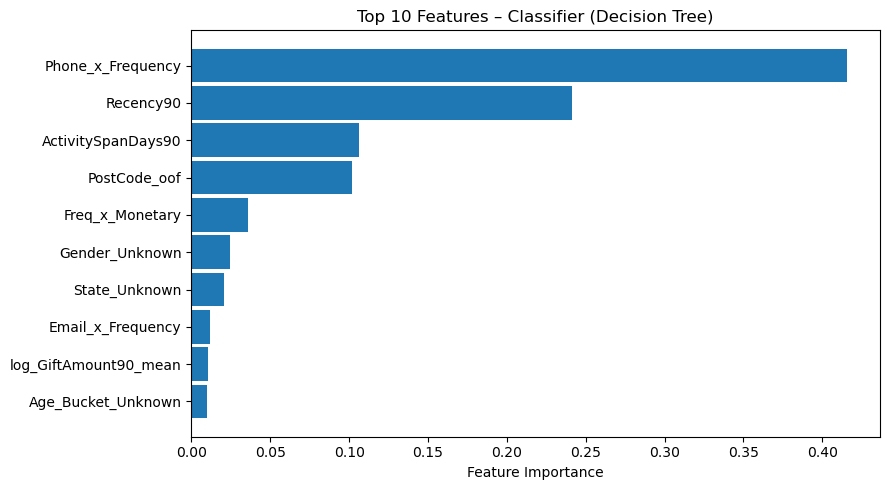

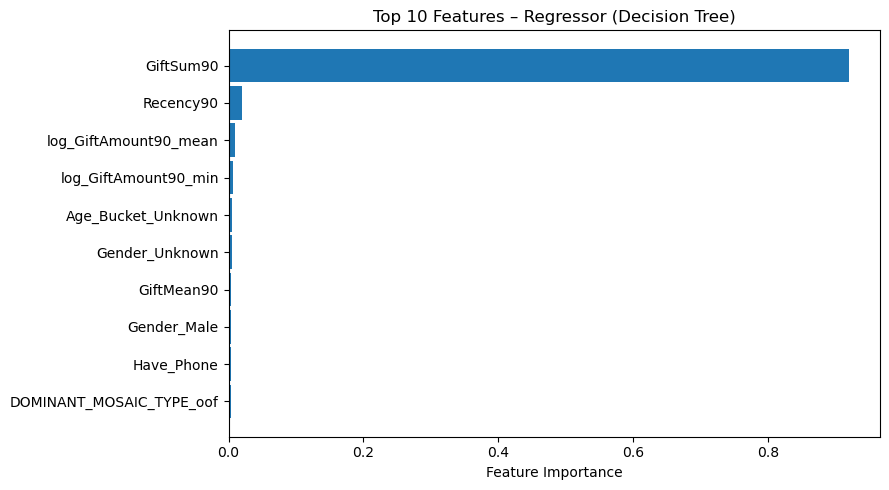

In [74]:
import matplotlib.pyplot as plt
import pandas as pd

feat_imp_clf = pd.Series(clf_tree.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feat_imp_reg = pd.Series(reg_tree.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(9,5))
top10_clf = feat_imp_clf.head(10)
plt.barh(top10_clf.index, top10_clf.values, height=0.9)  # <– control bar thickness here
plt.title("Top 10 Features – Classifier (Decision Tree)")
plt.xlabel("Feature Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

plt.figure(figsize=(9,5))
top10_reg = feat_imp_reg.head(10)
plt.barh(top10_reg.index, top10_reg.values, height=0.9)
plt.title("Top 10 Features – Regressor (Decision Tree)")
plt.xlabel("Feature Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 5.4 LightGBM

In [75]:
!pip install lightgbm

### 5.4.1 1st iteration

In [76]:
# ==============================
# LightGBM Hurdle Model
# ==============================
import lightgbm as lgb
from sklearn.metrics import (
    roc_auc_score, average_precision_score, f1_score,
    mean_squared_error, mean_absolute_error, r2_score
)
import numpy as np

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# ------------------------------
# STEP 1: Classifier (LightGBM)
# ------------------------------
clf_lgb = lgb.LGBMClassifier(
    objective="binary",
    n_estimators=3000,
    learning_rate=0.03,
    num_leaves=63,
    subsample=0.8,
    colsample_bytree=0.8,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

clf_lgb.fit(
    X_train, y_class_train,
    eval_set=[(X_vali, y_class_vali)],
    eval_metric="auc",
    callbacks=[lgb.early_stopping(100, verbose=False)]
)

p_vali = clf_lgb.predict_proba(X_vali)[:, 1]

print("\n=== LightGBM Classifier ===")
print("AUC    :", roc_auc_score(y_class_vali, p_vali))
print("PR-AUC :", average_precision_score(y_class_vali, p_vali))
print("F1@0.5 :", f1_score(y_class_vali, (p_vali > 0.5).astype(int)))

# ------------------------------
# STEP 2: Regressor on positives (log-LTV | positive)
# ------------------------------
pos_tr = (y_class_train == 1)
pos_te = (y_class_vali  == 1)

reg_lgb = lgb.LGBMRegressor(
    objective="regression",
    n_estimators=4000,
    learning_rate=0.03,
    num_leaves=63,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

reg_lgb.fit(
    X_train[pos_tr], y_reg_train[pos_tr],
    eval_set=[(X_vali[pos_te], y_reg_vali[pos_te])],
    eval_metric="rmse",
    callbacks=[lgb.early_stopping(200, verbose=False)]
)

y_pred_reg_log_pos = reg_lgb.predict(X_vali[pos_te])

print("\n=== LightGBM Regressor (positives, log-scale) ===")
print("RMSE(log):", rmse(y_reg_vali[pos_te], y_pred_reg_log_pos))
print("MAE (log):", mean_absolute_error(y_reg_vali[pos_te], y_pred_reg_log_pos))
print("R²  (log):", r2_score(y_reg_vali[pos_te], y_pred_reg_log_pos))

# ------------------------------
# STEP 3: Combined Expected LTV in $ space
# ------------------------------
# Predict conditional log-LTV for all rows, convert to $, multiply by P(positive)
log_ltv_pred_all = reg_lgb.predict(X_vali)
ltv_pos_pred_all = np.expm1(log_ltv_pred_all)
expected_ltv     = p_vali * ltv_pos_pred_all

y_vali_dollar = np.expm1(y_reg_vali)

print("\n=== Hurdle (LightGBM) in $ ===")
print("RMSE ($):", rmse(y_vali_dollar, expected_ltv))
print("MAE  ($):", mean_absolute_error(y_vali_dollar, expected_ltv))
print("Mean Actual ($):", y_vali_dollar.mean())
print("Mean Pred   ($):", expected_ltv.mean())


[LightGBM] [Info] Number of positive: 21203, number of negative: 85265
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006057 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3245
[LightGBM] [Info] Number of data points in the train set: 106468, number of used features: 67
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000

=== LightGBM Classifier ===
AUC    : 0.7889082930703426
PR-AUC : 0.4824447610886403
F1@0.5 : 0.48526638378123527
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006276 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3108
[LightGBM] [Info] Number of data points in the train set: 21203, number of used features: 67
[LightGBM] [Info] Start training from 

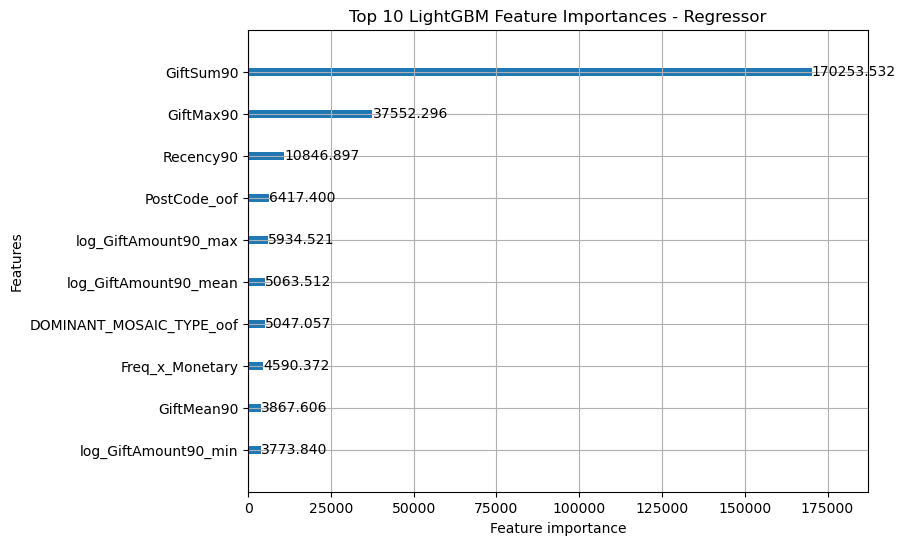

In [77]:
# Feature importance
import matplotlib.pyplot as plt
lgb.plot_importance(reg_lgb, max_num_features=10, importance_type="gain", figsize=(8,6))
plt.title("Top 10 LightGBM Feature Importances - Regressor")
plt.show()

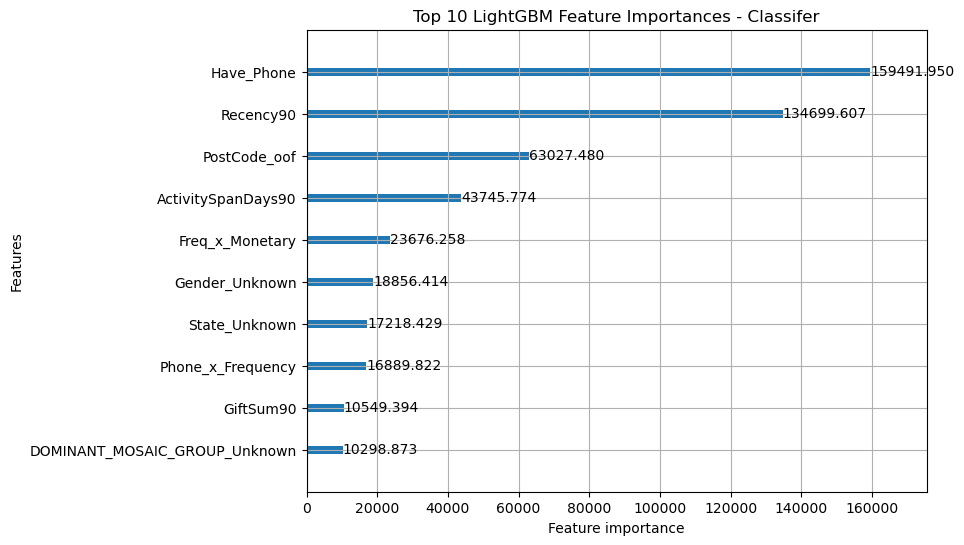

In [78]:
lgb.plot_importance(clf_lgb, max_num_features=10, importance_type="gain", figsize=(8,6))
plt.title("Top 10 LightGBM Feature Importances - Classifer")
plt.show()

### 5.4.2 2nd iteration

In [79]:
# ==============================
# LightGBM Hurdle Model (Top-10 Features, Formatted Metrics)
# ==============================
import numpy as np
import lightgbm as lgb
from sklearn.metrics import (
    roc_auc_score, average_precision_score, f1_score,
    mean_squared_error, mean_absolute_error, r2_score
)
from sklearn.model_selection import train_test_split

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# ------------------------------
# STEP 0: Use only Top-10 features
# ------------------------------
top10_feats = [
    "GiftSum90", "GiftMax90", "log_GiftAmount90_max", "Recency90",
    "PostCode_oof", "DOMINANT_MOSAIC_TYPE_oof", "GiftMin90",
    "log_GiftAmount90_mean", "GiftMean90", "Freq_x_Monetary"
]

X_top10 = X_train[top10_feats]
X_val_top10 = X_vali[top10_feats]

# ------------------------------
# STEP 1: Classifier
# ------------------------------
clf_lgb = lgb.LGBMClassifier(
    objective="binary",
    n_estimators=3000,
    learning_rate=0.03,
    num_leaves=63,
    subsample=0.8,
    colsample_bytree=0.8,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

clf_lgb.fit(
    X_top10, y_class_train,
    eval_set=[(X_val_top10, y_class_vali)],
    eval_metric="auc",
    callbacks=[lgb.early_stopping(100, verbose=False)]
)

p_vali = clf_lgb.predict_proba(X_val_top10)[:, 1]

# --- Classifier metrics ---
auc_val = roc_auc_score(y_class_vali, p_vali)
prauc_val = average_precision_score(y_class_vali, p_vali)
f1_05 = f1_score(y_class_vali, (p_vali > 0.5).astype(int))

# F1 threshold tuning
thr_grid = np.linspace(0.05, 0.95, 37)
f1s = [f1_score(y_class_vali, (p_vali > t).astype(int)) for t in thr_grid]
t_best = thr_grid[int(np.argmax(f1s))]
f1_best = f1_score(y_class_vali, (p_vali > t_best).astype(int))

# ------------------------------
# STEP 2: Regressor (positives only)
# ------------------------------
pos_tr = (y_class_train == 1)
pos_va = (y_class_vali == 1)

reg_lgb = lgb.LGBMRegressor(
    objective="regression",
    n_estimators=4000,
    learning_rate=0.03,
    num_leaves=63,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

reg_lgb.fit(
    X_top10[pos_tr], y_reg_train[pos_tr],
    eval_set=[(X_val_top10[pos_va], y_reg_vali[pos_va])],
    eval_metric="rmse",
    callbacks=[lgb.early_stopping(200, verbose=False)]
)

y_pred_reg_log_pos = reg_lgb.predict(X_val_top10[pos_va])
rmse_log = rmse(y_reg_vali[pos_va], y_pred_reg_log_pos)
mae_log = mean_absolute_error(y_reg_vali[pos_va], y_pred_reg_log_pos)
r2_log = r2_score(y_reg_vali[pos_va], y_pred_reg_log_pos)

# ------------------------------
# STEP 3: Combined Hurdle Prediction in $
# ------------------------------
log_ltv_pred_all = reg_lgb.predict(X_val_top10)
ltv_pos_pred_all = np.expm1(log_ltv_pred_all)
expected_ltv = p_vali * ltv_pos_pred_all
y_val_dollar = np.expm1(y_reg_vali)

rmse_dollar = rmse(y_val_dollar, expected_ltv)
mae_dollar = mean_absolute_error(y_val_dollar, expected_ltv)
mean_actual = y_val_dollar.mean()
mean_pred = expected_ltv.mean()

# ------------------------------
# STEP 4: Print results (Decision-Tree style)
# ------------------------------
print("\n=== LightGBM Classifier (Top-10 feats) ===")
print(f"AUC    : {auc_val}")
print(f"PR-AUC : {prauc_val}")
print(f"F1@0.5 : {f1_05}")
print(f"(Best F1 threshold on val = {t_best:.3f}; F1@test = {f1_best})")

print("\n=== LightGBM Regressor (positives, log-scale, Top-10 feats) ===")
print(f"RMSE(log): {rmse_log}")
print(f"MAE (log): {mae_log}")
print(f"R²  (log): {r2_log}")

print("\n=== Hurdle (LightGBM, Top-10 feats) in $ ===")
print(f"RMSE ($): {rmse_dollar}")
print(f"MAE  ($): {mae_dollar}")
print(f"Mean Actual ($): {mean_actual}")
print(f"Mean Pred   ($): {mean_pred}")


[LightGBM] [Info] Number of positive: 21203, number of negative: 85265
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003058 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2507
[LightGBM] [Info] Number of data points in the train set: 106468, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001272 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2407
[LightGBM] [Info] Number of data points in the train set: 21203, number of used features: 10
[LightGBM] [Info] Start training from score 4.587292

=== LightGBM Classifier (Top-10 feats) ===
AUC    : 0.7190642529730401
PR-AUC : 0.3911202514539108
F1@0.5 : 0.42255823457294645
(Best F1 threshold on val = 0.525;

## 5.5 Random Forest

### 5.5.1 First iteration

In [80]:
# ==============================
# Random Forest Hurdle
# ==============================
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import (
    roc_auc_score, average_precision_score, f1_score,
    mean_squared_error, mean_absolute_error, r2_score
)
import numpy as np

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# ----- Classifier: P(Positive LTV) -----
rf_clf = RandomForestClassifier(
    n_estimators=600,
    max_depth=None,              # let trees grow; control with min_samples_leaf
    min_samples_leaf=100,        # curb overfitting; try 50–300
    max_features="sqrt",         # classical RF choice
    class_weight="balanced_subsample",
    n_jobs=-1,
    random_state=42
)
rf_clf.fit(X_train, y_class_train)
p_vali = rf_clf.predict_proba(X_vali)[:, 1]

print("\n=== Random Forest Classifier ===")
print("AUC    :", roc_auc_score(y_class_vali, p_vali))
print("PR-AUC :", average_precision_score(y_class_vali, p_vali))
print("F1@0.5 :", f1_score(y_class_vali, (p_vali > 0.5).astype(int)))

# ----- Regressor: log_LTV | positive -----
pos_tr = (y_class_train == 1)
pos_te = (y_class_vali  == 1)

rf_reg = RandomForestRegressor(
    n_estimators=800,
    max_depth=None,
    min_samples_leaf=100,
    max_features="sqrt",
    n_jobs=-1,
    random_state=42
)
rf_reg.fit(X_train[pos_tr], y_reg_train[pos_tr])

# Evaluate on positive subset (log-scale)
y_pred_reg_log_pos = rf_reg.predict(X_vali[pos_te])
print("\n=== Random Forest Regressor (positives, log-scale) ===")
print("RMSE(log):", rmse(y_reg_vali[pos_te], y_pred_reg_log_pos))
print("MAE (log):", mean_absolute_error(y_reg_vali[pos_te], y_pred_reg_log_pos))
print("R²  (log):", r2_score(y_reg_vali[pos_te], y_pred_reg_log_pos))

# ----- Combined expected LTV in $ space -----
log_ltv_pred_all = rf_reg.predict(X_vali)          # conditional log-LTV for all rows
ltv_pos_pred_all = np.expm1(log_ltv_pred_all)      # $ given positive
expected_ltv     = p_vali * ltv_pos_pred_all

y_vali_dollar = np.expm1(y_reg_vali)

print("\n=== Hurdle (Random Forest) in $ ===")
print("RMSE ($):", rmse(y_vali_dollar, expected_ltv))
print("MAE  ($):", mean_absolute_error(y_vali_dollar, expected_ltv))
print("Mean Actual ($):", y_vali_dollar.mean())
print("Mean Pred   ($):", expected_ltv.mean())



=== Random Forest Classifier ===
AUC    : 0.7742664634019589
PR-AUC : 0.45102862579563174
F1@0.5 : 0.47276512085116223

=== Random Forest Regressor (positives, log-scale) ===
RMSE(log): 0.9428715310068081
MAE (log): 0.7410259956595285
R²  (log): 0.4033024704046314

=== Hurdle (Random Forest) in $ ===
RMSE ($): 223.84202716474599
MAE  ($): 67.41893250515285
Mean Actual ($): 44.45799196032759
Mean Pred   ($): 52.54779818082859


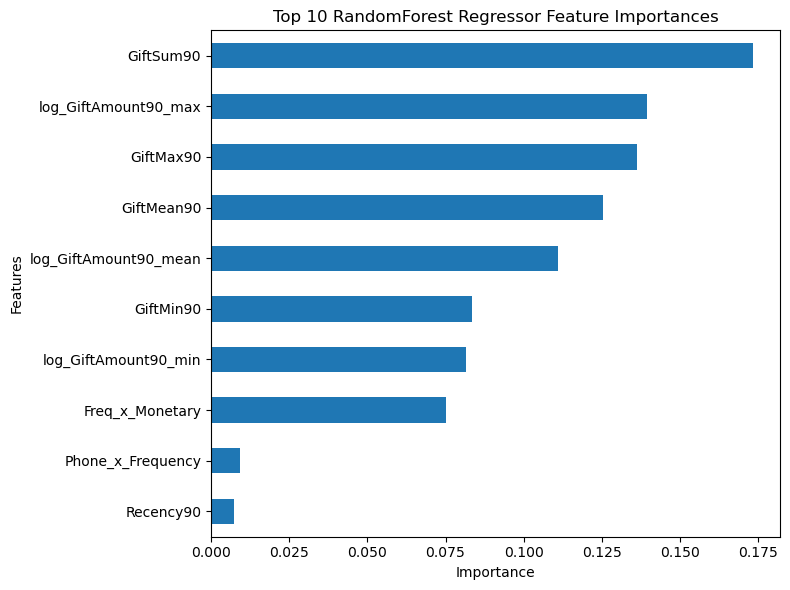

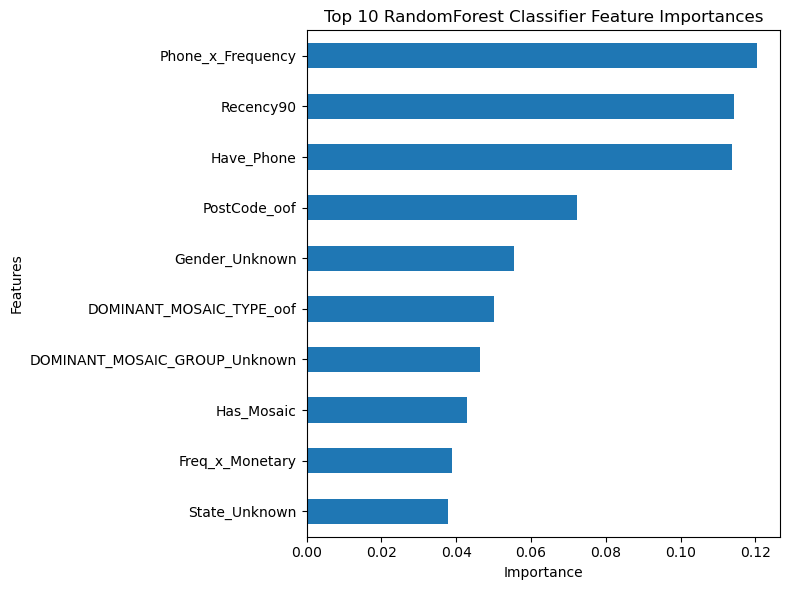

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ===== 1) Random Forest Regressor feature importances =====
# Uses trained rf_reg and the same training columns as the regressor was fit on.
reg_cols = X_train.columns  # or X_train.columns[pos_tr] if you subsetted features before fitting
imp_reg = pd.Series(rf_reg.feature_importances_, index=reg_cols).sort_values(ascending=False)

top_n = 10
plt.figure(figsize=(8, 6))
imp_reg.head(top_n).iloc[::-1].plot(kind="barh")
plt.title(f"Top {top_n} RandomForest Regressor Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# ===== 2) Random Forest Classifier feature importances (optional) =====
clf_cols = X_train.columns
imp_clf = pd.Series(rf_clf.feature_importances_, index=clf_cols).sort_values(ascending=False)

plt.figure(figsize=(8, 6))
imp_clf.head(top_n).iloc[::-1].plot(kind="barh")
plt.title(f"Top {top_n} RandomForest Classifier Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


### 5.5.2 Second iteration after tuning

In [82]:
# ==============================
# Random Forest Hurdle — 2nd Iteration (Top-10 feats, VALIDATION ONLY)
# ==============================
import numpy as np
import pandas as pd
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, KFold, StratifiedShuffleSplit
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    roc_auc_score, average_precision_score, f1_score,
    mean_squared_error, mean_absolute_error, r2_score
)
import warnings
warnings.filterwarnings("ignore", message="No further splits with positive gain")

rmse = lambda y, yhat: np.sqrt(mean_squared_error(y, yhat))

# ---------- A) Pick Top-10 features from Iteration-1 ----------
# Auto-extract (preferred)
try:
    top10_clf = (
        pd.Series(rf_clf.feature_importances_, index=X_train.columns)
        .sort_values(ascending=False).head(10).index.tolist()
    )
    top10_reg = (
        pd.Series(rf_reg.feature_importances_, index=X_train.columns)
        .sort_values(ascending=False).head(10).index.tolist()
    )
except NameError:
    # Manual fallback (edit if needed)
    top10_reg = ["GiftSum90","log_GiftAmount90_max","GiftMax90","GiftMean90",
                 "log_GiftAmount90_mean","Freq_x_Monetary","log_GiftAmount90_min",
                 "GiftMin90","Phone_x_Frequency","Recency90"]
    top10_clf = ["Phone_x_Frequency","Have_Phone","Recency90","PostCode_oof",
                 "Gender_Unknown","DOMINANT_MOSAIC_TYPE_oof","DOMINANT_MOSAIC_GROUP_Unknown",
                 "Has_Mosaic","State_Unknown","Freq_x_Monetary"]

# Ensure columns exist
top10_clf = [c for c in top10_clf if c in X_train.columns]
top10_reg = [c for c in top10_reg if c in X_train.columns]

X_train_clf = X_train[top10_clf].copy()
X_val_clf   = X_vali[top10_clf].copy()
X_train_regX= X_train[top10_reg].copy()
X_val_regX  = X_vali[top10_reg].copy()

# ---------- B) Subsample for fast tuning (10%) ----------
rng = np.random.RandomState(42)
sub_idx = rng.choice(len(X_train_clf), size=max(2000, int(0.10*len(X_train_clf))), replace=False)

X_tr_sub_clf  = X_train_clf.iloc[sub_idx]
y_cls_sub     = y_class_train.iloc[sub_idx]

X_tr_sub_regX = X_train_regX.iloc[sub_idx]
y_reg_sub     = y_reg_train.iloc[sub_idx]
pos_mask_sub  = (y_cls_sub == 1)

# ---------- C) Search spaces (lean) ----------
rf_clf_space = {
    "n_estimators":      randint(200, 450),
    "max_depth":         [None, 20],
    "min_samples_split": randint(2, 8),
    "min_samples_leaf":  randint(20, 80),
    "max_features":      ["sqrt", 0.8],
    "bootstrap":         [True],
    "max_samples":       [0.7],
}
rf_reg_space = {
    "n_estimators":      randint(250, 450),
    "max_depth":         [None, 20],
    "min_samples_split": randint(2, 8),
    "min_samples_leaf":  randint(20, 80),
    "max_features":      ["sqrt", 0.8],
    "bootstrap":         [True],
    "max_samples":       [0.7],
    "criterion":         ["squared_error", "absolute_error"],
}

# ---------- D) Tune classifier on top-10 clf features ----------
cv_cls = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)
rf_clf_base = RandomForestClassifier(class_weight="balanced_subsample", n_jobs=-1, random_state=42)
rf_clf_search = RandomizedSearchCV(
    rf_clf_base, rf_clf_space, n_iter=10, cv=cv_cls,
    scoring="roc_auc", n_jobs=-1, verbose=0, refit=True, random_state=42
)
rf_clf_search.fit(X_tr_sub_clf, y_cls_sub)
best_rf_clf_params = rf_clf_search.best_params_

# ---------- E) Tune regressor on positives with top-10 reg features ----------
cv_reg = KFold(n_splits=2, shuffle=True, random_state=42)
def neg_rmse_scorer(est, X, y): return -rmse(y, est.predict(X))
rf_reg_base = RandomForestRegressor(n_jobs=-1, random_state=42)
rf_reg_search = RandomizedSearchCV(
    rf_reg_base, rf_reg_space, n_iter=10, cv=cv_reg,
    scoring=neg_rmse_scorer, n_jobs=-1, verbose=0, refit=True, random_state=42
)
rf_reg_search.fit(X_tr_sub_regX[pos_mask_sub], y_reg_sub[pos_mask_sub])
best_rf_reg_params = rf_reg_search.best_params_

# ---------- F) Use existing TRAIN/VAL split for calibration ----------
# (You already have X_train / X_vali; we just subset columns above)
pos_tr = (y_class_train == 1)
pos_val = (y_class_vali  == 1)

# ---------- G) Refit classifier (more trees) + isotonic calibration on VAL ----------
rf_clf_full = RandomForestClassifier(
    n_jobs=-1, random_state=42, class_weight="balanced_subsample",
    **{**best_rf_clf_params, "n_estimators": 1200}
)
rf_clf_full.fit(X_train_clf, y_class_train)
rf_cal = CalibratedClassifierCV(rf_clf_full, method="isotonic", cv="prefit")
rf_cal.fit(X_val_clf, y_class_vali)

p_val = rf_cal.predict_proba(X_val_clf)[:, 1]

# ---------- H) Refit regressor on positives (more trees) ----------
rf_reg_full = RandomForestRegressor(
    n_jobs=-1, random_state=42,
    **{**best_rf_reg_params, "n_estimators": 1400}
)
rf_reg_full.fit(X_train_regX[pos_tr], y_reg_train[pos_tr])

# ---------- I) Dollar calibration (choose linear vs ratio) on VAL ----------
log_val_pred = rf_reg_full.predict(X_val_regX)          # conditional log-LTV for all VAL rows
val_pos_pred = np.expm1(log_val_pred)
exp_val      = p_val * val_pos_pred
y_val_dollar = np.expm1(y_reg_vali).values

scale = y_val_dollar.mean() / max(exp_val.mean(), 1e-12)     # ratio mean-anchoring
exp_val_ratio = np.clip(exp_val * scale, 0, None)

lin_cal = LinearRegression().fit(exp_val.reshape(-1,1), y_val_dollar)
exp_val_lin = np.clip(lin_cal.predict(exp_val.reshape(-1,1)), 0, None)

use_linear = (mean_absolute_error(y_val_dollar, exp_val_lin) <=
              mean_absolute_error(y_val_dollar, exp_val_ratio))

# ---------- J) Metrics (VALIDATION) ----------
thr_grid = np.linspace(0.05, 0.95, 37)
f1s = [f1_score(y_class_vali, (p_val > t).astype(int)) for t in thr_grid]
t_best = float(thr_grid[int(np.argmax(f1s))])

print("\n=== Random Forest Classifier (Top-10 feats) ===")
print("AUC    :", f"{roc_auc_score(y_class_vali, p_val):.12f}")
print("PR-AUC :", f"{average_precision_score(y_class_vali, p_val):.12f}")
print("F1@0.5 :", f"{f1_score(y_class_vali, (p_val > 0.5).astype(int)):.12f}")
print(f"(Best F1 threshold on val = {t_best:.3f}; F1@val = {f1_score(y_class_vali, (p_val > t_best).astype(int)):.12f})")

y_pred_reg_log_pos = rf_reg_full.predict(X_val_regX[pos_val])
print("\n=== Random Forest Regressor (positives, log-scale, Top-10 feats) ===")
print("RMSE(log):", f"{rmse(y_reg_vali[pos_val], y_pred_reg_log_pos):.12f}")
print("MAE (log):", f"{mean_absolute_error(y_reg_vali[pos_val], y_pred_reg_log_pos):.12f}")
print("R²  (log):", f"{r2_score(y_reg_vali[pos_val], y_pred_reg_log_pos):.12f}")

log_ltv_pred_all = rf_reg_full.predict(X_val_regX)
ltv_pos_pred_all = np.expm1(log_ltv_pred_all)
expected_raw = p_val * ltv_pos_pred_all
expected_ltv = (np.clip(lin_cal.predict(expected_raw.reshape(-1,1)), 0, None)
                if use_linear else
                np.clip(expected_raw * scale, 0, None))

print("\n=== Hurdle (Random Forest, Top-10 feats) in $ (Validation) ===")
print("RMSE ($):", f"{rmse(y_val_dollar, expected_ltv):.12f}")
print("MAE  ($):", f"{mean_absolute_error(y_val_dollar, expected_ltv):.12f}")
print("Mean Actual ($):", f"{y_val_dollar.mean():.12f}")
print("Mean Pred   ($):", f"{expected_ltv.mean():.12f}")
print(f"(Dollar calibration used: {'Linear' if use_linear else 'Ratio mean-anchoring'})")


C:\Users\Hannah\anaconda3\envs\py310ltv\lib\site-packages\sklearn\calibration.py:330: FutureWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(



=== Random Forest Classifier (Top-10 feats) ===
AUC    : 0.778080490796
PR-AUC : 0.441829210227
F1@0.5 : 0.197014925373
(Best F1 threshold on val = 0.225; F1@val = 0.488431511710)

=== Random Forest Regressor (positives, log-scale, Top-10 feats) ===
RMSE(log): 0.938766098831
MAE (log): 0.736701419814
R²  (log): 0.408487414349

=== Hurdle (Random Forest, Top-10 feats) in $ (Validation) ===
RMSE ($): 218.124345989525
MAE  ($): 60.088322749884
Mean Actual ($): 44.457991960328
Mean Pred   ($): 45.220205429728
(Dollar calibration used: Linear)


## 5.6 CatBoost

In [83]:
!pip install catboost

### 5.6.1 First iteration

In [84]:
# ==============================
# CatBoost Hurdle Model
# ==============================
from catboost import CatBoostClassifier, CatBoostRegressor, Pool
from sklearn.metrics import (
    roc_auc_score, average_precision_score, f1_score,
    mean_squared_error, mean_absolute_error, r2_score
)
import numpy as np

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# ------------------------------
# STEP 1: Classifier
# ------------------------------
clf_cat = CatBoostClassifier(
    iterations=2000,
    learning_rate=0.03,
    depth=6,
    subsample=0.8,
    colsample_bylevel=0.8,
    class_weights=[1, (y_class_train==0).sum() / (y_class_train==1).sum()],
    eval_metric="AUC",
    loss_function="Logloss",
    random_seed=42,
    verbose=False
)

clf_cat.fit(
    X_train, y_class_train,
    eval_set=(X_vali, y_class_vali),
    early_stopping_rounds=100
)

p_vali = clf_cat.predict_proba(X_vali)[:, 1]

print("\n=== CatBoost Classifier ===")
print("AUC    :", roc_auc_score(y_class_vali, p_vali))
print("PR-AUC :", average_precision_score(y_class_vali, p_vali))
print("F1@0.5 :", f1_score(y_class_vali, (p_vali > 0.5).astype(int)))

# ------------------------------
# STEP 2: Regressor on positives (log-LTV | positive)
# ------------------------------
pos_tr = (y_class_train == 1)
pos_te = (y_class_vali  == 1)

reg_cat = CatBoostRegressor(
    iterations=3000,
    learning_rate=0.03,
    depth=6,
    subsample=0.8,
    colsample_bylevel=0.8,
    loss_function="RMSE",
    random_seed=42,
    verbose=False
)

reg_cat.fit(
    X_train[pos_tr], y_reg_train[pos_tr],
    eval_set=(X_vali[pos_te], y_reg_vali[pos_te]),
    early_stopping_rounds=200
)

y_pred_reg_log_pos = reg_cat.predict(X_vali[pos_te])

print("\n=== CatBoost Regressor (positives, log-scale) ===")
print("RMSE(log):", rmse(y_reg_vali[pos_te], y_pred_reg_log_pos))
print("MAE (log):", mean_absolute_error(y_reg_vali[pos_te], y_pred_reg_log_pos))
print("R²  (log):", r2_score(y_reg_vali[pos_te], y_pred_reg_log_pos))

# ------------------------------
# STEP 3: Combined Expected LTV in $ space
# ------------------------------
log_ltv_pred_all = reg_cat.predict(X_vali)
ltv_pos_pred_all = np.expm1(log_ltv_pred_all)
expected_ltv     = p_vali * ltv_pos_pred_all

y_vali_dollar = np.expm1(y_reg_vali)

print("\n=== Hurdle (CatBoost) in $ ===")
print("RMSE ($):", rmse(y_vali_dollar, expected_ltv))
print("MAE  ($):", mean_absolute_error(y_vali_dollar, expected_ltv))
print("Mean Actual ($):", y_vali_dollar.mean())
print("Mean Pred   ($):", expected_ltv.mean())



=== CatBoost Classifier ===
AUC    : 0.7867837533400134
PR-AUC : 0.47915193374840637
F1@0.5 : 0.4841905439876609

=== CatBoost Regressor (positives, log-scale) ===
RMSE(log): 0.9261441495172686
MAE (log): 0.7260273054920163
R²  (log): 0.4242865584942972

=== Hurdle (CatBoost) in $ ===
RMSE ($): 215.52353877957515
MAE  ($): 65.66619447322249
Mean Actual ($): 44.45799196032759
Mean Pred   ($): 53.47186943494135


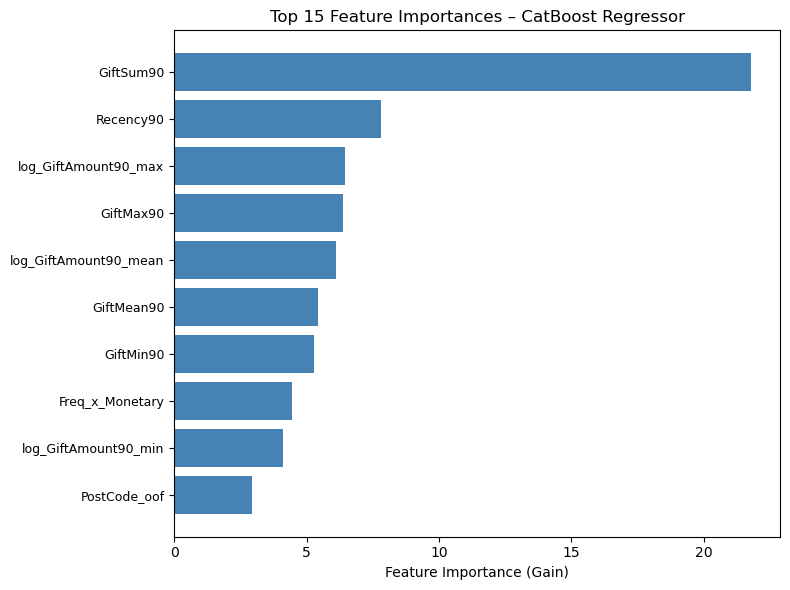

In [85]:
# ==============================
# Feature Importance (CatBoost)
# ==============================
import matplotlib.pyplot as plt

# Get feature importances from the trained regressor
importances = reg_cat.get_feature_importance()
features = X_train.columns

# Sort for readability
indices = np.argsort(importances)[::-1]
top_n = 10  # show top 15 features

plt.figure(figsize=(8, 6))
plt.barh(range(top_n), importances[indices[:top_n]][::-1], color="steelblue")
plt.yticks(range(top_n), features[indices[:top_n]][::-1], fontsize=9)
plt.xlabel("Feature Importance (Gain)")
plt.title("Top 15 Feature Importances – CatBoost Regressor")
plt.tight_layout()
plt.show()


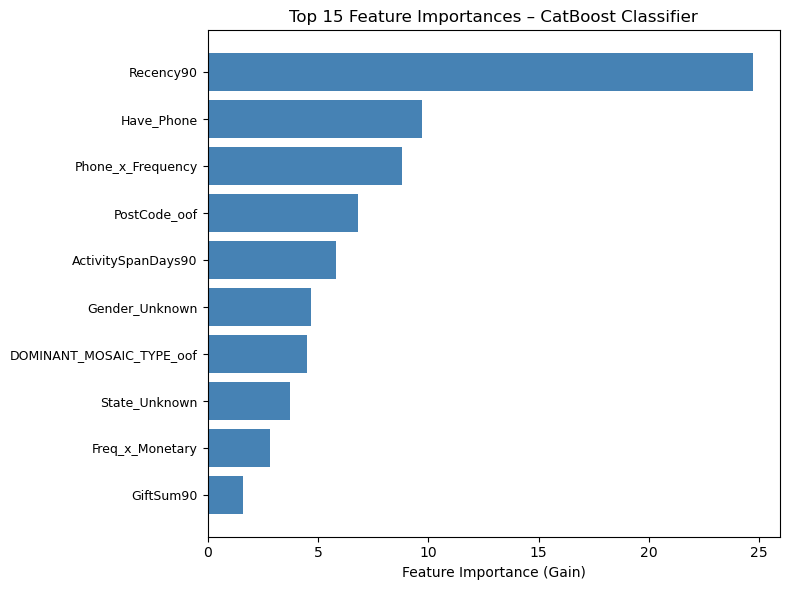

In [86]:
# ==============================
# Feature Importance (CatBoost)
# ==============================
import matplotlib.pyplot as plt

# Get feature importances from the trained regressor
importances = clf_cat.get_feature_importance()
features = X_train.columns

# Sort for readability
indices = np.argsort(importances)[::-1]
top_n = 10  # show top 15 features

plt.figure(figsize=(8, 6))
plt.barh(range(top_n), importances[indices[:top_n]][::-1], color="steelblue")
plt.yticks(range(top_n), features[indices[:top_n]][::-1], fontsize=9)
plt.xlabel("Feature Importance (Gain)")
plt.title("Top 15 Feature Importances – CatBoost Classifier")
plt.tight_layout()
plt.show()


### 5.6.2 Second iteration

In [87]:
# ==============================
# CatBoost Hurdle — 2nd Iteration (Top-10 features + formatted metrics)
# ==============================
import numpy as np, pandas as pd
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, KFold, StratifiedShuffleSplit
from sklearn.metrics import (
    roc_auc_score, average_precision_score, f1_score,
    mean_squared_error, mean_absolute_error, r2_score
)
from sklearn.linear_model import LinearRegression
from scipy.stats import randint, uniform

rmse = lambda y, yhat: np.sqrt(mean_squared_error(y, yhat))

# ---------- 0) Get Top-10 features from your 1st-iteration models ----------
# If you already trained clf_cat / reg_cat earlier, we pull their importances.
# Fallback: use a manual list (uncomment and edit).
def topk_from_cat(model, cols, k=10, type_="PredictionValuesChange"):
    imps = model.get_feature_importance(type=type_)
    return list(pd.Series(imps, index=cols).sort_values(ascending=False).head(k).index)

try:
    top10_reg = topk_from_cat(reg_cat, X_train.columns, k=10)     # from your plot
    top10_clf = topk_from_cat(clf_cat, X_train.columns, k=10)
except Exception:
    # Manual fallback (from your figure)
    top10_reg = ["GiftSum90","GiftMax90","log_GiftAmount90_mean","Recency90",
                 "GiftMean90","GiftMin90","log_GiftAmount90_max","log_GiftAmount90_min",
                 "Freq_x_Monetary","Phone_x_Frequency"]
    top10_clf = top10_reg[:]  # reuse for classifier if needed

# Guard (only keep columns that exist)
top10_reg = [c for c in top10_reg if c in X_train.columns]
top10_clf = [c for c in top10_clf if c in X_train.columns]

Xtr_clf, Xva_clf = X_train[top10_clf], X_vali[top10_clf]
Xtr_reg, Xva_reg = X_train[top10_reg], X_vali[top10_reg]

# ---------- 1) Fast hyperparam search on subsample ----------
rng = np.random.RandomState(42)
sub_idx = rng.choice(len(Xtr_clf), size=max(2000, int(0.10*len(Xtr_clf))), replace=False)
X_sub_clf, y_sub_cls = Xtr_clf.iloc[sub_idx], y_class_train.iloc[sub_idx]
X_sub_reg, y_sub_reg = Xtr_reg.iloc[sub_idx], y_reg_train.iloc[sub_idx]
pos_sub = (y_sub_cls == 1)

# Classifier search space
clf_base = CatBoostClassifier(
    loss_function="Logloss",
    eval_metric="AUC",
    auto_class_weights="Balanced",
    verbose=False,
    random_seed=42,
    allow_writing_files=False
)
clf_space = {
    "iterations": randint(400, 900),
    "learning_rate": uniform(0.03, 0.05),   # 0.03–0.08
    "depth": randint(4, 8),
    "l2_leaf_reg": uniform(2, 8),
    "subsample": uniform(0.6, 0.3),
    "colsample_bylevel": uniform(0.6, 0.3),
}
cv_cls = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
clf_search = RandomizedSearchCV(
    clf_base, clf_space, n_iter=15, cv=cv_cls, scoring="roc_auc",
    refit=True, n_jobs=-1, random_state=42, verbose=0
)
clf_search.fit(X_sub_clf, y_sub_cls)

# Regressor search space (on positives)
reg_base = CatBoostRegressor(
    loss_function="RMSE",
    verbose=False,
    random_seed=42,
    allow_writing_files=False
)
reg_space = {
    "iterations": randint(600, 1200),
    "learning_rate": uniform(0.03, 0.05),
    "depth": randint(4, 8),
    "l2_leaf_reg": uniform(2, 8),
    "subsample": uniform(0.6, 0.3),
    "colsample_bylevel": uniform(0.6, 0.3),
}
cv_reg = KFold(n_splits=3, shuffle=True, random_state=42)
reg_search = RandomizedSearchCV(
    reg_base, reg_space, n_iter=15, cv=cv_reg,
    scoring="neg_root_mean_squared_error",
    refit=True, n_jobs=-1, random_state=42, verbose=0
)
reg_search.fit(X_sub_reg[pos_sub], y_sub_reg[pos_sub])

# ---------- 2) Refit with early stopping on full TRAIN, evaluate on VAL ----------
# Classifier
clf_cat2 = CatBoostClassifier(
    **clf_search.best_params_,
    loss_function="Logloss",
    eval_metric="AUC",
    auto_class_weights="Balanced",
    use_best_model=True,
    early_stopping_rounds=200,
    verbose=False,
    random_seed=42,
    allow_writing_files=False
)
clf_cat2.fit(Xtr_clf, y_class_train, eval_set=(Xva_clf, y_class_vali))
p_val = clf_cat2.predict_proba(Xva_clf)[:, 1]

# Regressor (positives only, log target)
pos_tr = (y_class_train == 1)
pos_va = (y_class_vali  == 1)
reg_cat2 = CatBoostRegressor(
    **reg_search.best_params_,
    loss_function="RMSE",
    use_best_model=True,
    early_stopping_rounds=200,
    verbose=False,
    random_seed=42,
    allow_writing_files=False
)
reg_cat2.fit(Xtr_reg[pos_tr], y_reg_train[pos_tr], eval_set=(Xva_reg[pos_va], y_reg_vali[pos_va]))

# ---------- 3) Metrics (classifier) ----------
thr_grid = np.linspace(0.05, 0.95, 37)
f1s = [f1_score(y_class_vali, (p_val > t).astype(int)) for t in thr_grid]
t_best = float(thr_grid[int(np.argmax(f1s))])
f1_at_05 = f1_score(y_class_vali, (p_val > 0.5).astype(int))
auc_val  = roc_auc_score(y_class_vali, p_val)
prauc    = average_precision_score(y_class_vali, p_val)

# ---------- 4) Metrics (regressor on positives, log) ----------
y_log_true_pos = y_reg_vali[pos_va]
y_log_pred_pos = reg_cat2.predict(Xva_reg[pos_va])
rmse_log = rmse(y_log_true_pos, y_log_pred_pos)
mae_log  = mean_absolute_error(y_log_true_pos, y_log_pred_pos)
r2_log   = r2_score(y_log_true_pos, y_log_pred_pos)

# ---------- 5) Hurdle in $ (with simple linear dollar calibration) ----------
log_pred_all = reg_cat2.predict(Xva_reg)
ltv_pos_pred = np.expm1(log_pred_all)
expected_raw = p_val * ltv_pos_pred

y_val_dollar = np.expm1(y_reg_vali).values
cal = LinearRegression().fit(expected_raw.reshape(-1,1), y_val_dollar)
expected_ltv = np.clip(cal.predict(expected_raw.reshape(-1,1)), 0, None)

rmse_dollar = rmse(y_val_dollar, expected_ltv)
mae_dollar  = mean_absolute_error(y_val_dollar, expected_ltv)
mean_actual = y_val_dollar.mean()
mean_pred   = expected_ltv.mean()

# ---------- 6) Print in your Decision-Tree format ----------
print("\n=== CatBoost Classifier (Top-10 feats) ===")
print("AUC    :", f"{auc_val:.12f}")
print("PR-AUC :", f"{prauc:.12f}")
print("F1@0.5 :", f"{f1_at_05:.12f}")
print(f"(Best F1 threshold on val = {t_best:.3f})")

print("\n=== CatBoost Regressor (positives, log-scale, Top-10 feats) ===")
print("RMSE(log):", f"{rmse_log:.12f}")
print("MAE (log):", f"{mae_log:.12f}")
print("R²  (log):", f"{r2_log:.12f}")

print("\n=== Hurdle (CatBoost, Top-10 feats) in $ ===")
print("RMSE ($):", f"{rmse_dollar:.12f}")
print("MAE  ($):", f"{mae_dollar:.12f}")
print("Mean Actual ($):", f"{mean_actual:.12f}")
print("Mean Pred   ($):", f"{mean_pred:.12f}")



=== CatBoost Classifier (Top-10 feats) ===
AUC    : 0.772990797983
PR-AUC : 0.452762345404
F1@0.5 : 0.470296750943
(Best F1 threshold on val = 0.550)

=== CatBoost Regressor (positives, log-scale, Top-10 feats) ===
RMSE(log): 0.944075759683
MAE (log): 0.740611649408
R²  (log): 0.401777301550

=== Hurdle (CatBoost, Top-10 feats) in $ ===
RMSE ($): 219.351567203733
MAE  ($): 62.205361243868
Mean Actual ($): 44.457991960328
Mean Pred   ($): 46.327770584763


## 5.7 Gradient Boosting


### 5.7.1. Baseline Gradient Boosting (fixed hyperparameter)

In [88]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    roc_auc_score, f1_score, average_precision_score,
    mean_squared_error, mean_absolute_error, r2_score
)
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# ------------------------------
# STEP 1: Prepare Data
# ------------------------------
X = donor_final.drop(columns=["LTV", "log_LTV", "Positive_LTV"])
y_class = donor_final["Positive_LTV"]
y_reg   = donor_final["log_LTV"]

X_num = X.select_dtypes(include=[np.number])

X_train, X_vali, y_class_train, y_class_vali, y_reg_train, y_reg_vali = train_test_split(
    X_num, y_class, y_reg, test_size=0.2, random_state=42, stratify=y_class
)

# ------------------------------
# STEP 2: Gradient Boosting Classifier (Baseline)
# ------------------------------
clf = GradientBoostingClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8,
    random_state=42
)

clf.fit(X_train, y_class_train)
p_vali = clf.predict_proba(X_vali)[:, 1]

print("\n=== Gradient Boosting Classifier ===")
print("AUC     :", roc_auc_score(y_class_vali, p_vali))
print("PR-AUC  :", average_precision_score(y_class_vali, p_vali))
print("F1@0.50 :", f1_score(y_class_vali, (p_vali > 0.5).astype(int)))

# ------------------------------
# STEP 3: Gradient Boosting Regressor (on positives only)
# ------------------------------
pos_tr = (y_class_train == 1)
pos_te = (y_class_vali == 1)

X_train_reg = X_train[pos_tr]
y_train_reg = y_reg_train[pos_tr]
X_vali_reg  = X_vali[pos_te]
y_vali_reg  = y_reg_vali[pos_te]

reg = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8,
    random_state=42
)

reg.fit(X_train_reg, y_train_reg)
y_pred_reg = reg.predict(X_vali_reg)

print("\n=== Gradient Boosting Regressor ===")
print("RMSE(log):", rmse(y_vali_reg, y_pred_reg))
print("MAE (log):", mean_absolute_error(y_vali_reg, y_pred_reg))
print("R²   (log):", r2_score(y_vali_reg, y_pred_reg))

# ------------------------------
# STEP 4: Combined Hurdle Model
# ------------------------------
log_ltv_pred_all = reg.predict(X_vali)
ltv_pos_pred_all = np.expm1(log_ltv_pred_all)
expected_ltv = p_vali * ltv_pos_pred_all
y_vali_dollar = np.expm1(y_reg_vali)

print("\n=== Combined Hurdle Model (Gradient Boosting) ===")
print("RMSE ($):", rmse(y_vali_dollar, expected_ltv))
print("MAE  ($):", mean_absolute_error(y_vali_dollar, expected_ltv))
print("Mean Actual ($):", y_vali_dollar.mean())
print("Mean Pred   ($):", expected_ltv.mean())


=== Gradient Boosting Classifier ===
AUC     : 0.7832713150844826
PR-AUC  : 0.4771600226354069
F1@0.50 : 0.28039015868394235

=== Gradient Boosting Regressor ===
RMSE(log): 0.9259854140580059
MAE (log): 0.7266434137608142
R²   (log): 0.4244838891281417

=== Combined Hurdle Model (Gradient Boosting) ===
RMSE ($): 221.05313491862447
MAE  ($): 52.30174222729787
Mean Actual ($): 44.45799196032759
Mean Pred   ($): 28.127575352792242


### 5.7.2. Tuned Gradient Boosting Model (RandomizedSearchCV)

In [89]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import (
    roc_auc_score, average_precision_score, f1_score,
    mean_squared_error, mean_absolute_error, r2_score
)

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# =====================================================
# STEP 1: Data Preparation
# =====================================================
X = donor_final.drop(columns=["LTV", "log_LTV", "Positive_LTV"])
y_class = donor_final["Positive_LTV"]
y_reg   = donor_final["log_LTV"]

X_num = X.select_dtypes(include=[np.number])

X_train, X_test, y_class_train, y_class_test, y_reg_train, y_reg_test = train_test_split(
    X_num, y_class, y_reg, test_size=0.2, random_state=42, stratify=y_class
)

# =====================================================
# STEP 2: Compact Parameter Grids (Quick Search)
# =====================================================
param_grid_clf = {
    'learning_rate': [0.03, 0.05],
    'n_estimators': [200, 300],
    'max_depth': [3, 4],
    'min_samples_leaf': [10, 20],
    'subsample': [0.8, 1.0],
}

param_grid_reg = {
    'learning_rate': [0.03, 0.05],
    'n_estimators': [200, 300],
    'max_depth': [3, 4],
    'min_samples_leaf': [5, 15],
    'subsample': [0.8, 1.0],
    'loss': ['squared_error']
}

# =====================================================
# STEP 3: Randomized Search – CLASSIFIER (Fast)
# =====================================================
clf_search = RandomizedSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_distributions=param_grid_clf,
    scoring='roc_auc',
    cv=2,                 # Fewer folds for speed
    n_iter=5,             # Reduced iterations
    verbose=0,
    n_jobs=-1,
    random_state=42
)
clf_search.fit(X_train.sample(frac=0.7, random_state=42),
               y_class_train.sample(frac=0.7, random_state=42))  # 70% data for tuning

clf_best = clf_search.best_estimator_
p_test = clf_best.predict_proba(X_test)[:, 1]
p_label = (p_test > 0.5).astype(int)

print("\n=== Gradient Boosting Classifier (Quick Tuned) ===")
print("Best Params:", clf_search.best_params_)
print("AUC     :", roc_auc_score(y_class_test, p_test))
print("PR-AUC  :", average_precision_score(y_class_test, p_test))
print("F1@0.50 :", f1_score(y_class_test, p_label))

# =====================================================
# STEP 4: Randomized Search – REGRESSOR (Positives Only)
# =====================================================
pos_tr = (y_class_train == 1)
pos_te = (y_class_test == 1)

X_train_reg = X_train[pos_tr]
y_train_reg = y_reg_train[pos_tr]
X_test_reg  = X_test[pos_te]
y_test_reg  = y_reg_test[pos_te]

reg_search = RandomizedSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_distributions=param_grid_reg,
    scoring='neg_root_mean_squared_error',
    cv=2,
    n_iter=5,
    verbose=0,
    n_jobs=-1,
    random_state=42
)
reg_search.fit(X_train_reg.sample(frac=0.7, random_state=42),
               y_train_reg.sample(frac=0.7, random_state=42))

reg_best = reg_search.best_estimator_
y_pred_reg = reg_best.predict(X_test_reg)

print("\n=== Gradient Boosting Regressor (Quick Tuned) ===")
print("Best Params:", reg_search.best_params_)
print("RMSE(log):", rmse(y_test_reg, y_pred_reg))
print("MAE (log):", mean_absolute_error(y_test_reg, y_pred_reg))
print("R²   (log):", r2_score(y_test_reg, y_pred_reg))

# =====================================================
# STEP 5: Combined Hurdle Model
# =====================================================
log_ltv_pred_all = reg_best.predict(X_test)
ltv_pos_pred_all = np.expm1(log_ltv_pred_all)
expected_ltv = p_test * ltv_pos_pred_all
y_test_dollar = np.expm1(y_reg_test)

print("\n=== Combined Hurdle Model (Quick Tuned Gradient Boosting) ===")
print("RMSE ($):", rmse(y_test_dollar, expected_ltv))
print("MAE  ($):", mean_absolute_error(y_test_dollar, expected_ltv))
print("Mean Actual ($):", y_test_dollar.mean())
print("Mean Pred   ($):", expected_ltv.mean())


=== Gradient Boosting Classifier (Quick Tuned) ===
Best Params: {'subsample': 1.0, 'n_estimators': 200, 'min_samples_leaf': 20, 'max_depth': 4, 'learning_rate': 0.05}
AUC     : 0.7821942887671931
PR-AUC  : 0.47422569514665946
F1@0.50 : 0.2812545165486342

=== Gradient Boosting Regressor (Quick Tuned) ===
Best Params: {'subsample': 0.8, 'n_estimators': 200, 'min_samples_leaf': 5, 'max_depth': 4, 'loss': 'squared_error', 'learning_rate': 0.03}
RMSE(log): 0.93050972913135
MAE (log): 0.7301165683785629
R²   (log): 0.4188462684292903

=== Combined Hurdle Model (Quick Tuned Gradient Boosting) ===
RMSE ($): 221.8018288586363
MAE  ($): 52.288412011164645
Mean Actual ($): 44.45799196032759
Mean Pred   ($): 27.235078132584007


# 6.0 Standardise Test Data

## 6.1 Data Preprocessing - Handling Test_p1 data => test1

In [90]:
# Import test data
test1 = pd.read_csv('Test_p1.csv')
test1.head()

,SupporterID,Age_Bucket,Gender,State,PostCode,Have_Phone,Have_Email,Gift_ID,GiftDate,IsEmergencyGift,Is_First_Gift,ProductType_Group,GiftSolicitationChannel,CampaignSubtype_Group,AppealSeason,GiftAmount,Initial_90_Days
0,C-990078102,Unknown,NaN,NSW,2088.0,No,No,0062u000009SyPiAAK,8/01/2014,Yes,Is_First_Gift,Cash - One off,Web,Appeal,Non Seasonal,70.0,1
1,C-990116708,Unknown,NaN,SA,5006.0,No,No,0062u000009FmpmAAC,4/27/2015,Yes,Is_First_Gift,Cash - One off,Web,Appeal,Non Seasonal,35.0,1
2,C-990132428,Unknown,Female,QLD,4007.0,Yes,Yes,0062u000009SLdHAAW,9/02/2015,NaN,Is_First_Gift,Cash - Inspired Gifts,Web,Appeal,Non Seasonal,28.0,1
3,C-990137490,Unknown,Female,SA,NaN,Yes,Yes,0062u00000C4UWoAAN,4/29/2021,Yes,Is_First_Gift,Cash - One off,EDM,Appeal,Non Seasonal,576.1,1
4,C-990189756,Unknown,NaN,NSW,2777.0,Yes,Yes,0062u00000DC1KSAA1,9/04/2021,NaN,Is_First_Gift,Cash - Inspired Gifts,EDM,Appeal,Non Seasonal,42.0,1


In [91]:
# View test1's data structure and data types
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34371 entries, 0 to 34370
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SupporterID              34371 non-null  object 
 1   Age_Bucket               34371 non-null  object 
 2   Gender                   16445 non-null  object 
 3   State                    31028 non-null  object 
 4   PostCode                 30267 non-null  float64
 5   Have_Phone               34371 non-null  object 
 6   Have_Email               34371 non-null  object 
 7   Gift_ID                  34371 non-null  object 
 8   GiftDate                 34371 non-null  object 
 9   IsEmergencyGift          9961 non-null   object 
 10  Is_First_Gift            34371 non-null  object 
 11  ProductType_Group        34371 non-null  object 
 12  GiftSolicitationChannel  32544 non-null  object 
 13  CampaignSubtype_Group    34371 non-null  object 
 14  AppealSeason          

In [92]:
# Convert GiftDate to datetime format
test1['GiftDate'] = pd.to_datetime(test1['GiftDate'])
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34371 entries, 0 to 34370
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   SupporterID              34371 non-null  object        
 1   Age_Bucket               34371 non-null  object        
 2   Gender                   16445 non-null  object        
 3   State                    31028 non-null  object        
 4   PostCode                 30267 non-null  float64       
 5   Have_Phone               34371 non-null  object        
 6   Have_Email               34371 non-null  object        
 7   Gift_ID                  34371 non-null  object        
 8   GiftDate                 34371 non-null  datetime64[ns]
 9   IsEmergencyGift          9961 non-null   object        
 10  Is_First_Gift            34371 non-null  object        
 11  ProductType_Group        34371 non-null  object        
 12  GiftSolicitationChannel  32544 n

In [93]:
# View test1's missing values
test1.isna().sum()

SupporterID                    0
Age_Bucket                     0
Gender                     17926
State                       3343
PostCode                    4104
Have_Phone                     0
Have_Email                     0
Gift_ID                        0
GiftDate                       0
IsEmergencyGift            24410
Is_First_Gift                  0
ProductType_Group              0
GiftSolicitationChannel     1827
CampaignSubtype_Group          0
AppealSeason                   0
GiftAmount                     0
Initial_90_Days                0
dtype: int64

In [94]:
# Cleans and standardises Age_Bucket column
test1["Age_Bucket"] = test1["Age_Bucket"].str.strip()

test1["Age_Bucket"] = test1["Age_Bucket"].replace({
    "19 - 30": "19-30",
    "19-30 ": "19-30",
    "71 +": "71+"
})

test1["Age_Bucket"] = test1["Age_Bucket"].fillna("Unknown")
test1.loc[test1["Age_Bucket"]=="", "Age_Bucket"] = "Unknown"

age_order = ["19-30", "31-40", "41-50", "51-60", "61-70", "71+", "Unknown"]
test1["Age_Bucket"] = pd.Categorical(test1["Age_Bucket"], categories=age_order, ordered=True)
print(test1["Age_Bucket"].value_counts(dropna=False))

Age_Bucket
Unknown    24475
31-40       3554
41-50       1961
51-60       1284
19-30       1196
71+          980
61-70        921
Name: count, dtype: int64


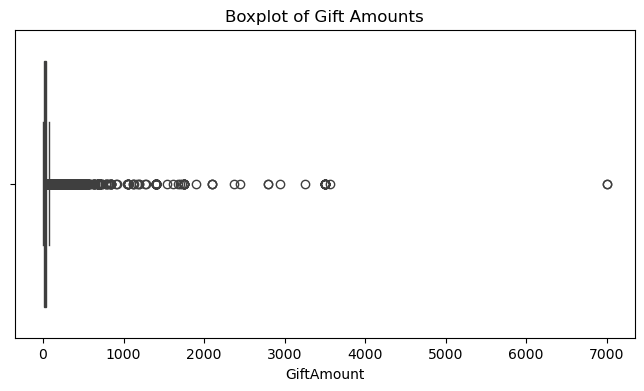

In [95]:
# Visualise the distribution and outliers of GiftAmount column
plt.figure(figsize=(8, 4))
sns.boxplot(x=test1['GiftAmount'])
plt.title("Boxplot of Gift Amounts")
plt.xlabel("GiftAmount")
plt.show()

In [96]:
# Summary statistics for GiftAmount column
print(test1["GiftAmount"].describe())

# Keep only valid positive amounts less than or equal to 5000 for GiftAmount column
test1 = test1[(test1["GiftAmount"] > 0) & (test1["GiftAmount"] <= 5000)]

count    34371.000000
mean        51.477445
std        142.082468
min          0.340000
25%         17.500000
50%         27.300000
75%         38.500000
max       7000.000000
Name: GiftAmount, dtype: float64


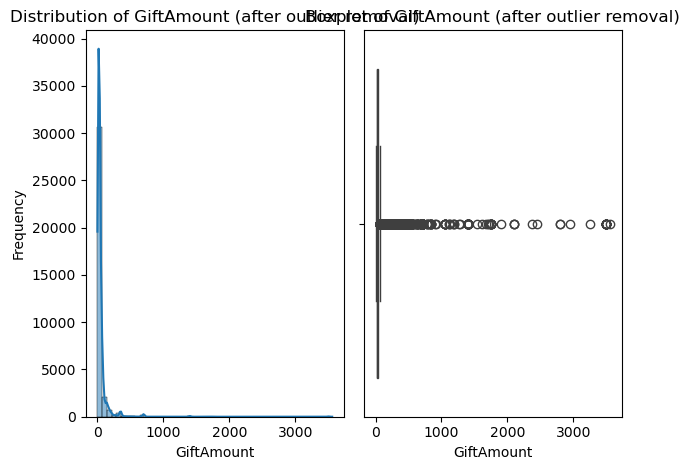

In [97]:
# Plot GiftAmount column after removing outliers
plt.subplot(1, 2, 1)
sns.histplot(test1["GiftAmount"], bins=50, kde=True)
plt.title("Distribution of GiftAmount (after outlier removal)")
plt.xlabel("GiftAmount")
plt.ylabel("Frequency")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=test1["GiftAmount"])
plt.title("Boxplot of GiftAmount (after outlier removal)")

plt.tight_layout()
plt.show()

In [98]:
# Create a new column with log-transformed GiftAmount - to reduce skewness and stability
test1['log_GiftAmount'] = np.log1p(test1['GiftAmount'])

In [99]:
# Standardise the Gender column by replacing minority values with 'Unknown'
test1['Gender'] = test1['Gender'].replace({
    "Non-Binary":"Unknown",
    "Prefer Not To Say":"Unknown"})

# Replace missing values with 'Unknown'
test1['Gender'] = test1['Gender'].fillna("Unknown")
print(test1['Gender'].value_counts(dropna=False))

Gender
Unknown    17927
Female      9483
Male        6959
Name: count, dtype: int64


In [100]:
# Clean the State column by filling missing values with 'Unknown'
aus_states = ['NSW','VIC','QLD','WA','SA','TAS','ACT','NT']
test1["State"] = test1["State"].fillna("Unknown")

# Group non-Australian states as "Other"
test1.loc[~test1["State"].isin(aus_states) & (test1["State"]!="Unknown"), "State"] = "Other"
print(test1["State"].value_counts(dropna=False))

State
NSW        10778
VIC         7587
QLD         4311
WA          3776
Unknown     3343
ACT         2122
SA          1197
Other        494
TAS          490
NT           271
Name: count, dtype: int64


In [101]:
# Clean and standardise the PostCode column
test1["PostCode"] = test1["PostCode"].astype(str)
test1["PostCode"] = test1["PostCode"].str.split(".").str[0]
test1.loc[test1["PostCode"].isin(["nan","NaN","None","Unknown",""]), "PostCode"] = "Unknown"
mask = test1["PostCode"].str.match(r"^\d+$")  # Include PostCode values that are purely numeric strings
test1.loc[mask, "PostCode"] = test1.loc[mask, "PostCode"].str.zfill(4)

print(test1["PostCode"].value_counts(ascending = False))

PostCode
Unknown    4104
2602        229
2000        203
2617        194
2615        192
           ... 
4871          1
5142          1
6175          1
1660          1
5040          1
Name: count, Length: 1593, dtype: int64


In [102]:
# Convert the Have_Phone column into binary values (1 = 'Yes', 0 = 'No')
test1["Have_Phone"] = (test1["Have_Phone"]=="Yes").astype(int)
print(test1['Have_Phone'].value_counts())

Have_Phone
1    22554
0    11815
Name: count, dtype: int64


In [103]:
# Convert the Have_Email column into binary values (1 = 'Yes', 0 = 'No')
test1['Have_Email'] = (test1['Have_Email']=='Yes').astype(int)
print(test1['Have_Email'].value_counts())

Have_Email
1    22452
0    11917
Name: count, dtype: int64


In [104]:
# Fill missing values within the IsEmergencyGift column with “No,” and convert them to binary (1 = “Yes”, 0 = “No”)
test1["IsEmergencyGift"] = test1["IsEmergencyGift"].fillna("No")
test1["IsEmergencyGift"] = (test1["IsEmergencyGift"]=="Yes").astype(int)
print(test1['IsEmergencyGift'].value_counts())

IsEmergencyGift
0    24410
1     9959
Name: count, dtype: int64


In [105]:
# Clean the ProductType_Group column by removing spaces and hyphens
test1['ProductType_Group'] = (test1['ProductType_Group'].str.replace(" ", "", regex = False)
                              .str.replace("-","_",regex=False))
print(test1['ProductType_Group'].value_counts())

ProductType_Group
RG_GlobalParent          16095
Cash_Oneoff              12939
Cash_InspiredGifts        2233
CommunityFundraising      1778
RG_PaddingtonPostcard     1324
Name: count, dtype: int64


In [106]:
# Create a binary flag for regular giving product types
regular_giving_types = ['RG_GlobalParent', 'RG_PaddingtonPostcard', 'RG_Wiggles']
test1['Is_Regular_Giving'] = test1['ProductType_Group'].isin(regular_giving_types).astype(int)
print(test1['Is_Regular_Giving'].value_counts())

Is_Regular_Giving
1    17419
0    16950
Name: count, dtype: int64


In [107]:
# Clean GiftSolicitationChannel by removing spaces and filling missing values with 'Unknown'
test1['GiftSolicitationChannel'] = (test1['GiftSolicitationChannel'].str.replace(" ","",regex=False))
test1['GiftSolicitationChannel'] = test1['GiftSolicitationChannel'].fillna('Unknown')
print(test1['GiftSolicitationChannel'].value_counts())

GiftSolicitationChannel
Web              17623
F2F               5985
Doortodoor        3737
Retail            2175
Unknown           1827
General            868
Telemarketing      730
Unsolicited        393
DM                 392
EDM                246
TravelTrip         228
B2B                 69
DRTV                55
Inserts             25
SMS                 12
TV                   4
Name: count, dtype: int64


In [108]:
# Standardise GiftSolicitationChannel values using a mapping dictionary
channel_map = {'Unsolicited':'Unknown',
               'TravelTrip':'F2F',
               'DRTV':'TV',
               'Telemarketing':'Phone',
              'EDM':'Email',
              'DM':'DirectMail'}
test1['GiftSolicitationChannel'] = test1['GiftSolicitationChannel'].replace(channel_map)
print(test1['GiftSolicitationChannel'].value_counts())

GiftSolicitationChannel
Web           17623
F2F            6213
Doortodoor     3737
Unknown        2220
Retail         2175
General         868
Phone           730
DirectMail      392
Email           246
B2B              69
TV               59
Inserts          25
SMS              12
Name: count, dtype: int64


In [109]:
# Group the GiftSolicitiationChannel column into broader categories
def map_channel(x):
    if x in ["Web","Email","SMS","B2B"]:
        return "Digital"
    elif x in ['Phone']:
        return "Telemarketing"
    elif x in ["F2F","Doortodoor","Retail"]:
        return "FaceToFace"
    elif x in ["DirectMail","TV","Inserts"]:
        return "Media"
    else:
        return "Unknown"

test1["Channel_Group"] = test1["GiftSolicitationChannel"].apply(map_channel)

print(test1["Channel_Group"].value_counts())

Channel_Group
Digital          17950
FaceToFace       12125
Unknown           3088
Telemarketing      730
Media              476
Name: count, dtype: int64


In [110]:
# Clean CampaignSubtype_Group column by removing spaces
test1['CampaignSubtype_Group'] = test1['CampaignSubtype_Group'].str.replace(" ","_",regex=False)
test1['CampaignSubtype_Group'].value_counts()

CampaignSubtype_Group
Regular_Giving           17678
Appeal                   14879
Community_Fundraising     1778
Engagement                  34
Name: count, dtype: int64

In [111]:
# Create a binary flag for regular giving subtypes (the output is the same as regular giving products above)
test1['Is_Regular_Giving_Subtype'] = (test1['CampaignSubtype_Group']=='Regular_Giving').astype(int)
print(test1['Is_Regular_Giving_Subtype'].value_counts())

Is_Regular_Giving_Subtype
1    17678
0    16691
Name: count, dtype: int64


In [112]:
# Clean AppealSeason by removing spaces
test1['AppealSeason'] = test1['AppealSeason'].str.replace(" ","_",regex=False)
print(test1['AppealSeason'].value_counts())

AppealSeason
Non_Seasonal    32051
Tax              1310
Christmas         703
Autumn            224
Spring             81
Name: count, dtype: int64


In [113]:
# Create a binary flag for seasonal appeals (1 = seasonal, 0 = non-seasonal)
test1['Is_Seasonal'] = (test1['AppealSeason']!='Non_Seasonal').astype(int)
test1['Is_Seasonal'].value_counts()

Is_Seasonal
0    32051
1     2318
Name: count, dtype: int64

In [114]:
# View missing values after cleaning
test1.isna().sum()

SupporterID                  0
Age_Bucket                   0
Gender                       0
State                        0
PostCode                     0
Have_Phone                   0
Have_Email                   0
Gift_ID                      0
GiftDate                     0
IsEmergencyGift              0
Is_First_Gift                0
ProductType_Group            0
GiftSolicitationChannel      0
CampaignSubtype_Group        0
AppealSeason                 0
GiftAmount                   0
Initial_90_Days              0
log_GiftAmount               0
Is_Regular_Giving            0
Channel_Group                0
Is_Regular_Giving_Subtype    0
Is_Seasonal                  0
dtype: int64

In [115]:
# View data structure and data types after cleaning
test1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34369 entries, 0 to 34370
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   SupporterID                34369 non-null  object        
 1   Age_Bucket                 34369 non-null  category      
 2   Gender                     34369 non-null  object        
 3   State                      34369 non-null  object        
 4   PostCode                   34369 non-null  object        
 5   Have_Phone                 34369 non-null  int64         
 6   Have_Email                 34369 non-null  int64         
 7   Gift_ID                    34369 non-null  object        
 8   GiftDate                   34369 non-null  datetime64[ns]
 9   IsEmergencyGift            34369 non-null  int64         
 10  Is_First_Gift              34369 non-null  object        
 11  ProductType_Group          34369 non-null  object        
 12  GiftSolic

In [116]:
# Merge mosaic demographic columns within pc with test1
mosaic_cols = ['PostCode', 'DOMINANT_MOSAIC_GROUP', 'DOMINANT_MOSAIC_TYPE']
test1 = test1.merge(pc[mosaic_cols], how='left', on='PostCode')

print(test1['DOMINANT_MOSAIC_GROUP'].value_counts(dropna=False))

DOMINANT_MOSAIC_GROUP
NaN    4255
B      4129
A      3936
G      3809
C      2677
F      2534
E      2238
J      2017
K      1952
M      1823
H      1769
I      1466
D       921
L       782
N        61
Name: count, dtype: int64


In [117]:
# View the first 5 rows of merged dataset
test1.head()

,SupporterID,Age_Bucket,Gender,State,PostCode,Have_Phone,Have_Email,Gift_ID,GiftDate,IsEmergencyGift,...,AppealSeason,GiftAmount,Initial_90_Days,log_GiftAmount,Is_Regular_Giving,Channel_Group,Is_Regular_Giving_Subtype,Is_Seasonal,DOMINANT_MOSAIC_GROUP,DOMINANT_MOSAIC_TYPE
0,C-990078102,Unknown,Unknown,NSW,2088,0,0,0062u000009SyPiAAK,2014-08-01,1,...,Non_Seasonal,70.0,1,4.262680,0,Digital,0,0,A,A01
1,C-990116708,Unknown,Unknown,SA,5006,0,0,0062u000009FmpmAAC,2015-04-27,1,...,Non_Seasonal,35.0,1,3.583519,0,Digital,0,0,I,I28
2,C-990132428,Unknown,Female,QLD,4007,1,1,0062u000009SLdHAAW,2015-09-02,0,...,Non_Seasonal,28.0,1,3.367296,0,Digital,0,0,B,B07
3,C-990137490,Unknown,Female,SA,Unknown,1,1,0062u00000C4UWoAAN,2021-04-29,1,...,Non_Seasonal,576.1,1,6.358016,0,Digital,0,0,NaN,NaN
4,C-990189756,Unknown,Unknown,NSW,2777,1,1,0062u00000DC1KSAA1,2021-09-04,0,...,Non_Seasonal,42.0,1,3.761200,0,Digital,0,0,D,D13


In [118]:
# Integrate mosaic demographics within gi into test1
## STEP 1: Extract Mosaic Group from Type (e.g., A01 → A)
test1['DOMINANT_MOSAIC_GROUP'] = test1['DOMINANT_MOSAIC_TYPE'].str[0]

## STEP 2: Load and rename Mosaic Grand Index (group-level) data
gi_path = "Mosaic-Australia-2024-Grand-Index_1.2 1.xlsx"
gi = pd.read_excel(gi_path, sheet_name="Rankings")

### Filter for Mosaic Groups (A–N only)
gi_groups = gi[gi["Group/Type"].str.fullmatch(r"[A-N]")].copy()

### Rename columns for clarity and uniqueness
gi_groups = gi_groups.rename(columns={
    "Group/Type": "DOMINANT_MOSAIC_GROUP",
    "Group/Type Name": "MosaicGroup_Name",
    "Age (Young to Old)": "Mosaic_Age_Rank",
    "Children Presence (Likely to Unlikely)": "Mosaic_Children_Rank",
    "Household Income (High to Low)": "Mosaic_Income_Rank",
    "House Price (High to Low)": "Mosaic_HousePrice_Rank",
    "Remoteness (Urban to Remote)": "Mosaic_Remoteness_Rank",
    "House Type (Flats to Houses)": "Mosaic_HouseType_Rank",
    "Length Of Residency (Short to Long)": "Mosaic_Residency_Rank",
    "Birthplace (Australia to Overseas)": "Mosaic_Birthplace_Rank",
    "Wealth (High to Low)": "Mosaic_Wealth_Rank"
})

## STEP 3: Drop ALL old Mosaic columns (conflicting versions)
cols_to_drop = [col for col in test1.columns if 'Mosaic' in col]
test1 = test1.drop(columns=cols_to_drop)

## STEP 4: Merge cleanly on group
test1 = test1.merge(gi_groups, how='left', on='DOMINANT_MOSAIC_GROUP')
test1.head()

,SupporterID,Age_Bucket,Gender,State,PostCode,Have_Phone,Have_Email,Gift_ID,GiftDate,IsEmergencyGift,...,MosaicGroup_Name,Mosaic_Age_Rank,Mosaic_Children_Rank,Mosaic_Income_Rank,Mosaic_HousePrice_Rank,Mosaic_Remoteness_Rank,Mosaic_HouseType_Rank,Mosaic_Residency_Rank,Mosaic_Birthplace_Rank,Mosaic_Wealth_Rank
0,C-990078102,Unknown,Unknown,NSW,2088,0,0,0062u000009SyPiAAK,2014-08-01,1,...,High Society,11.0,7.0,1.0,1.0,5.0,10.0,13.0,5.0,1.0
1,C-990116708,Unknown,Unknown,SA,5006,0,0,0062u000009FmpmAAC,2015-04-27,1,...,Dream Chasers,5.0,11.0,10.0,7.0,3.0,4.0,5.0,9.0,9.0
2,C-990132428,Unknown,Female,QLD,4007,1,1,0062u000009SLdHAAW,2015-09-02,0,...,Upscale Urbanites,3.0,12.0,2.0,4.0,1.0,2.0,3.0,11.0,7.0
3,C-990137490,Unknown,Female,SA,Unknown,1,1,0062u00000C4UWoAAN,2021-04-29,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C-990189756,Unknown,Unknown,NSW,2777,1,1,0062u00000DC1KSAA1,2021-09-04,0,...,Suburban Stability,9.0,5.0,4.0,3.0,10.0,13.0,14.0,4.0,2.0


In [119]:
# Extract digital and mail engagements and merge their scores into test1

## Step 1: Filter digital and mail-related variables
digital_keywords = ["Online", "Streaming", "Digital", "Internet", "YouTube", "Social", "Mobile", "Email"]
mail_keywords = ["Mail", "Postal", "Letterbox", "Catalog", "Direct Mail", "Flyer", "Post"]

# Filter rows with keywords
digital_mask = mosaic_index['Variable'].str.contains('|'.join(digital_keywords), case=False, na=False)
mail_mask = mosaic_index['Variable'].str.contains('|'.join(mail_keywords), case=False, na=False)

digital_index = mosaic_index[digital_mask].copy()
mail_index = mosaic_index[mail_mask].copy()

## Step 2: Keep only Mosaic Group-level rows (A–N, not A01 etc.)
valid_groups = [chr(i) for i in range(ord('A'), ord('N')+1)]
digital_index = digital_index[digital_index['Region'].isin(valid_groups)]
mail_index = mail_index[mail_index['Region'].isin(valid_groups)]
# Compute average digital engagement index per group
digital_score = digital_index.groupby("Region")["IndexValue"].mean().reset_index()
digital_score = digital_score.rename(columns={"Region": "DOMINANT_MOSAIC_GROUP", "IndexValue": "Digital_Engagement_Score"})

# Compute average mail engagement index per group
mail_score = mail_index.groupby("Region")["IndexValue"].mean().reset_index()
mail_score = mail_score.rename(columns={"Region": "DOMINANT_MOSAIC_GROUP", "IndexValue": "Mail_Engagement_Score"})
# Merge both scores into one
mosaic_scores = pd.merge(digital_score, mail_score, on="DOMINANT_MOSAIC_GROUP", how="outer")

# Merge into test1 (donor-level)
test1 = test1.merge(mosaic_scores, how='left', on='DOMINANT_MOSAIC_GROUP')

In [120]:
# Create a binary flag for donors with mosaic demographic data, and fill missing Mosaic rank values with each column’s median
test1['Has_Mosaic'] = test1['MosaicGroup_Name'].notna().astype(int)
mosaic_rank_cols = [col for col in test1.columns if col.startswith('Mosaic_')]
for col in mosaic_rank_cols:
    test1[col] = test1[col].fillna(test1[col].median())

In [121]:
# Convert digitial and mail engagement scores to numeric, fill missing values with median, and add a binary flag for donors with mosaic demographic data
test1.info()
test1["Digital_Engagement_Score"] = pd.to_numeric(test1["Digital_Engagement_Score"], errors="coerce")
test1["Mail_Engagement_Score"] = pd.to_numeric(test1["Mail_Engagement_Score"], errors="coerce")
for col in ["Digital_Engagement_Score","Mail_Engagement_Score"]:
    test1[col] = test1[col].fillna(test1[col].median())
test1["Has_Mosaic_Score"] = test1["Digital_Engagement_Score"].notna().astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34369 entries, 0 to 34368
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   SupporterID                34369 non-null  object        
 1   Age_Bucket                 34369 non-null  category      
 2   Gender                     34369 non-null  object        
 3   State                      34369 non-null  object        
 4   PostCode                   34369 non-null  object        
 5   Have_Phone                 34369 non-null  int64         
 6   Have_Email                 34369 non-null  int64         
 7   Gift_ID                    34369 non-null  object        
 8   GiftDate                   34369 non-null  datetime64[ns]
 9   IsEmergencyGift            34369 non-null  int64         
 10  Is_First_Gift              34369 non-null  object        
 11  ProductType_Group          34369 non-null  object        
 12  Gift

## 6.2 Data Processing - Donor Level & Merging with Test Data

In [122]:
# (need to change) Aggregate transaction data into donor-level features; create 90-day behavioural metrics; create interaction terms

import pandas as pd
import numpy as np
from category_encoders import TargetEncoder

# --- STEP 0: Convert GiftDate to datetime ---
test1['GiftDate'] = pd.to_datetime(test1['GiftDate'], errors='coerce')

# --- STEP 1: Donor-level static features (no leakage) ---
test_donor_data = test1.groupby("SupporterID").agg(
    # Demographics & contact
    Age_Bucket=("Age_Bucket", "first"),
    Gender=("Gender", "first"),
    State=("State", "first"),
    PostCode=("PostCode", "first"),
    Have_Phone=("Have_Phone", "max"),
    Have_Email=("Have_Email", "max"),

    # # Gift stats (all-time)
    # GiftAmount_mean=("GiftAmount", "mean"),
    # GiftAmount_sum=("GiftAmount", "sum"),
    # GiftAmount_max=("GiftAmount", "max"),
    # GiftAmount_min=("GiftAmount", "min"),
    # GiftAmount_std=("GiftAmount", "std"),

    # log_GiftAmount_mean=("log_GiftAmount", "mean"),
    # log_GiftAmount_max=("log_GiftAmount", "max"),
    # log_GiftAmount_min=("log_GiftAmount", "min"),
    # log_GiftAmount_std=("log_GiftAmount", "std"),

    # # Flags
    # Is_First_Gift=("Is_First_Gift", "max"),
    # IsEmergencyGift=("IsEmergencyGift", "max"),
    # Is_Seasonal=("Is_Seasonal", "max"),

    # Mosaic enrichment
    MosaicGroup_Name=("MosaicGroup_Name", "first"),
    DOMINANT_MOSAIC_GROUP=("DOMINANT_MOSAIC_GROUP", "first"),
    DOMINANT_MOSAIC_TYPE=("DOMINANT_MOSAIC_TYPE", "first"),
    Mosaic_Age_Rank=("Mosaic_Age_Rank", "first"),
    Mosaic_Children_Rank=("Mosaic_Children_Rank", "first"),
    Mosaic_Income_Rank=("Mosaic_Income_Rank", "first"),
    Mosaic_HousePrice_Rank=("Mosaic_HousePrice_Rank", "first"),
    Mosaic_Remoteness_Rank=("Mosaic_Remoteness_Rank", "first"),
    Mosaic_HouseType_Rank=("Mosaic_HouseType_Rank", "first"),
    Mosaic_Residency_Rank=("Mosaic_Residency_Rank", "first"),
    Mosaic_Birthplace_Rank=("Mosaic_Birthplace_Rank", "first"),
    Mosaic_Wealth_Rank=("Mosaic_Wealth_Rank", "first"),
    Digital_Engagement_Score=("Digital_Engagement_Score", "first"),
    Mail_Engagement_Score=("Mail_Engagement_Score", "first"),
    Has_Mosaic=("Has_Mosaic", "max"),
    Has_Mosaic_Score=("Has_Mosaic_Score", "max"),

#     # Targets
#     LTV=("LTV", "first"),
#     log_LTV=("log_LTV", "first"),
#     Positive_LTV=("Positive_LTV", "first")
).reset_index()

# --- STEP 2: Drop leaky all-time columns ---
leaky_cols = [
    "Is_Regular_Giving", "Is_Regular_Giving_Subtype",
    "GiftSolicitationChannel", "Channel_Group",
    "CampaignSubtype_Group", "ProductType_Group"
]
test_donor_data_clean = test_donor_data.drop(columns=[c for c in leaky_cols if c in test_donor_data.columns], errors="ignore")

# --- STEP 3: 90-day features ---
test_df90 = test1[test1["Initial_90_Days"] == 1].copy()
test_donor_90 = test_df90.groupby("SupporterID").agg(
    # --- Core behavioural metrics ---
    GiftCount90=("GiftAmount", "count"),
    GiftSum90=("GiftAmount", "sum"),          # true monetary sum within 90 days
    GiftMean90=("GiftAmount", "mean"),
    GiftMax90=("GiftAmount", "max"),
    GiftMin90=("GiftAmount", "min"),
    GiftStd90=("GiftAmount", "std"),

    # --- Log-transformed gift metrics (safe versions) ---
    log_GiftAmount90_mean=("log_GiftAmount", "mean"),
    log_GiftAmount90_max=("log_GiftAmount", "max"),
    log_GiftAmount90_min=("log_GiftAmount", "min"),
    log_GiftAmount90_std=("log_GiftAmount", "std"),

    # --- Campaign / product diversity ---
    EmergencyGiftSum90=("IsEmergencyGift", "sum"),
    SeasonalGiftSum90=("Is_Seasonal", "sum"),
    ChannelDiversity90=("Channel_Group", pd.Series.nunique),
    CampaignDiversity90=("CampaignSubtype_Group", pd.Series.nunique),
    SeasonDiversity90=("AppealSeason", pd.Series.nunique),
    ProductTypeDiversity90=("ProductType_Group", pd.Series.nunique),

    # --- Regular giving & dates ---
    UsedEmergencyGift90=("IsEmergencyGift", "max"),
    UsedSeasonalGift90=("Is_Seasonal", "max"),
    UsedRegularGiving90=("Is_Regular_Giving", "max"),
    FirstGiftDate90=("GiftDate", "min"),
    LastGiftDate90=("GiftDate", "max")
).reset_index()

# Ratios & RFM
test_donor_90["EmergencyGiftShare90"] = test_donor_90["EmergencyGiftSum90"] / test_donor_90["GiftCount90"].clip(lower=1)
test_donor_90["SeasonalGiftShare90"]  = test_donor_90["SeasonalGiftSum90"] / test_donor_90["GiftCount90"].clip(lower=1)
test_donor_90["ChannelDivRatio90"]    = test_donor_90["ChannelDiversity90"] / test_donor_90["GiftCount90"].clip(lower=1)
test_donor_90["ActivitySpanDays90"]   = (test_donor_90["LastGiftDate90"] - test_donor_90["FirstGiftDate90"]).dt.days.fillna(0)

# RFM with correct monetary
test_donor_90["Frequency90"]     = test_donor_90["GiftCount90"]
test_donor_90["MonetaryTotal90"] = np.log1p(test_donor_90["GiftSum90"])
test_donor_90["MonetaryAvg90"]   = test_donor_90["GiftMean90"].fillna(0)

# Recency
ref_date = pd.to_datetime(test_df90["GiftDate"]).max()
test_donor_90["Recency90"] = (ref_date - test_donor_90["LastGiftDate90"]).dt.days

# --- STEP 4: Merge donor-level + 90-day ---
test_donor_data_clean = test_donor_data_clean.merge(test_donor_90, on="SupporterID", how="left")

# --- STEP 5: Filter for non-RG donors in 90 days ---
test_donor_model = test_donor_data_clean[test_donor_data_clean["UsedRegularGiving90"] == 0].copy()

# --- STEP 6: Handle Mosaic missing values ---
mosaic_cols = [
    'Mosaic_Children_Rank','Mosaic_Income_Rank','Mosaic_HousePrice_Rank',
    'Mosaic_Remoteness_Rank','Mosaic_HouseType_Rank','Mosaic_Residency_Rank',
    'Mosaic_Birthplace_Rank','Mosaic_Wealth_Rank',
    'Digital_Engagement_Score','Mail_Engagement_Score'
]
for col in mosaic_cols:
    test_donor_model[col] = pd.to_numeric(test_donor_model[col], errors="coerce")
    test_donor_model[col] = test_donor_model[col].fillna(test_donor_model[col].median())

test_donor_model['DOMINANT_MOSAIC_GROUP'] = test_donor_model['DOMINANT_MOSAIC_GROUP'].fillna("Unknown")
test_donor_model['DOMINANT_MOSAIC_TYPE']  = test_donor_model['DOMINANT_MOSAIC_TYPE'].fillna("Unknown")

# --- STEP 7: Create interaction terms (safe subset only) ---
test_donor_model["Freq_x_Monetary"]   = test_donor_model["Frequency90"] * test_donor_model["MonetaryTotal90"]
test_donor_model["Email_x_Frequency"] = test_donor_model["Have_Email"] * test_donor_model["Frequency90"]
test_donor_model["Phone_x_Frequency"] = test_donor_model["Have_Phone"] * test_donor_model["Frequency90"]

# Optional rare-event interactions (only keep if predictive later)
# test_donor_model["Emergency_x_Freq"]     = test_donor_model["EmergencyGiftShare90"] * test_donor_model["Frequency90"]
# test_donor_model["Seasonal_x_Freq"]      = test_donor_model["SeasonalGiftShare90"] * test_donor_model["Frequency90"]

In [123]:
# Apply OOF encoding to high-cardinality features (to prevent leakage) and one-hot encoding to smaller categorical variables
test = test_donor_model.copy()

# 1) Apply the saved full-train encoders to test
test_enc = {}
for col in oof_cols:
    test[col] = test[col].astype(str)
    # transform returns a DataFrame; select the encoded column
    test_enc[col + "_oof"] = encoders[col].transform(test[[col]])[col].values
test_enc = pd.DataFrame(test_enc, index=test.index)

# 2) Drop raw OOF source cols, join encoded, then one-hot the small cats
test_donor_final = test.drop(columns=oof_cols).join(test_enc)
test_donor_final = pd.get_dummies(test_donor_final, columns=onehot_cols, drop_first=True)

# 3) Align columns to TRAIN feature set
test_donor_final = test_donor_final.reindex(columns=feature_cols, fill_value=0)

# 4) Same light cleanup as train
test_donor_final.drop(columns=["SupporterID","FirstGiftDate90","LastGiftDate90"], errors="ignore", inplace=True)
for col in ["GiftAmount_std","log_GiftAmount_std"]:
    if col in test_donor_final.columns:
        test_donor_final[col] = test_donor_final[col].fillna(0)
bool_cols = test_donor_final.select_dtypes(include="bool").columns
test_donor_final[bool_cols] = test_donor_final[bool_cols].astype("int8")

print(test_donor_final.shape)


(14868, 76)


In [124]:
# Inspect test_donor_final dataframe after encoding

# 1. Target distribution
# print(test_donor_final["log_LTV"].describe())
# test_donor_final["log_LTV"].hist(bins=50)
# 2. Missing values
print(test_donor_final.isna().mean().sort_values(ascending=False).head(10))
# 3. Feature dtypes
print(test_donor_final.dtypes.value_counts())
# 4. Size of dataset
print(test_donor_final.shape)

GiftStd90                 0.928302
log_GiftAmount90_std      0.928302
MosaicGroup_Name          0.188189
Have_Phone                0.000000
Mosaic_Children_Rank      0.000000
Mosaic_Income_Rank        0.000000
Mosaic_HousePrice_Rank    0.000000
Mosaic_Remoteness_Rank    0.000000
Mosaic_HouseType_Rank     0.000000
Mosaic_Residency_Rank     0.000000
dtype: float64
int8       31
float64    26
int64      18
object      1
Name: count, dtype: int64
(14868, 76)


In [125]:
# Clean and optimise test_donor_final
for col in ["GiftStd90","log_GiftAmount90_std"]:
    test_donor_final[col] = test_donor_final[col].fillna(0)
test_donor_final = test_donor_final.drop(columns=["SupporterID","FirstGiftDate90","LastGiftDate90"], errors="ignore")
bool_cols = test_donor_final.select_dtypes(include="bool").columns
test_donor_final[bool_cols] = test_donor_final[bool_cols].astype("int8")

In [126]:
# Inspect test_donor_final dataframe
# print(test_donor_final.shape)
# print(test_donor_final.dtypes.value_counts())
# print(test_donor_final.isna().mean().sort_values(ascending=False).head(10))

# Drop leftover object columns that cause trouble
test_donor_final = test_donor_final.drop(columns=["MosaicGroup_Name", "GiftStd90", "log_GiftAmount90_std"], errors="ignore")
# Double-check object types
print(test_donor_final.isna().mean().sort_values(ascending=False).head(10))
print(test_donor_final.select_dtypes(include="object").columns)

Have_Phone                0.0
Have_Email                0.0
Mosaic_Age_Rank           0.0
Mosaic_Children_Rank      0.0
Mosaic_Income_Rank        0.0
Mosaic_HousePrice_Rank    0.0
Mosaic_Remoteness_Rank    0.0
Mosaic_HouseType_Rank     0.0
Mosaic_Residency_Rank     0.0
Mosaic_Birthplace_Rank    0.0
dtype: float64
Index([], dtype='object')


In [127]:
test_donor_final.to_csv('test_donor_final.csv', index=False, sep=",", encoding="utf-8-sig")

# 7.0 Fit the Test Data

In [128]:
import numpy as np
import pandas as pd
import xgboost as xgb

# ------------------------------
# 1️⃣ Use the strong features you already have
# ------------------------------
# strong_features = [
#     'DOMINANT_MOSAIC_GROUP_Unknown', 'Have_Phone', 'Phone_x_Frequency', 'Has_Mosaic', 'State_Unknown',
#     'Gender_Unknown', 'GiftCount90', 'ActivitySpanDays90', 'Recency90', 'Age_Bucket_Unknown',
#     'PostCode_oof', 'Freq_x_Monetary', 'Have_Email', 'UsedSeasonalGift90', 'Email_x_Frequency',
#     'Age_Bucket_71+', 'SeasonalGiftSum90', 'UsedEmergencyGift90', 'Gender_Male', 'EmergencyGiftShare90',
#     'SeasonalGiftShare90', 'ChannelDivRatio90', 'State_Other', 'GiftSum90', 'GiftMax90', 'GiftMean90',
#     'EmergencyGiftSum90', 'SeasonDiversity90', 'log_GiftAmount90_mean', 'DOMINANT_MOSAIC_GROUP_H',
#     'CampaignDiversity90', 'log_GiftAmount90_max', 'DOMINANT_MOSAIC_GROUP_K', 'ChannelDiversity90',
#     'Mosaic_Birthplace_Rank', 'DOMINANT_MOSAIC_TYPE_oof', 'Mosaic_Children_Rank',
#     'DOMINANT_MOSAIC_GROUP_C', 'DOMINANT_MOSAIC_GROUP_M', 'log_GiftAmount90_min', 'Mosaic_Wealth_Rank',
#     'Digital_Engagement_Score', 'DOMINANT_MOSAIC_GROUP_E', 'Mosaic_Residency_Rank', 'GiftMin90',
#     'DOMINANT_MOSAIC_GROUP_J', 'State_SA', 'DOMINANT_MOSAIC_GROUP_I', 'State_VIC', 'Mosaic_HousePrice_Rank',
#     'Mosaic_Income_Rank', 'Mail_Engagement_Score', 'Mosaic_HouseType_Rank', 'Mosaic_Remoteness_Rank',
#     'State_WA', 'Age_Bucket_31-40', 'State_QLD', 'Age_Bucket_51-60', 'Mosaic_Age_Rank',
#     'DOMINANT_MOSAIC_GROUP_F', 'Age_Bucket_61-70', 'Age_Bucket_41-50', 'State_NSW', 'State_NT', 'State_TAS',
#     'ProductTypeDiversity90', 'DOMINANT_MOSAIC_GROUP_D'
# ]

# print(f"✅ Loaded {len(strong_features)} strong features for final test prediction.")

# ------------------------------
# 2️⃣ Load your external test dataset
# ------------------------------
#test = pd.read_csv("test_donor_final.csv")

# Keep SupporterID column
supporter_ids = test["SupporterID"]

# Select numeric columns and align with strong features
X_test_num = test_donor_final.select_dtypes(include=[np.number]).copy()
for c in strong_features:
    if c not in X_test_num.columns:
        X_test_num[c] = 0  # add missing features with default 0

X_test = X_test_num[strong_features].copy()

# Convert to DMatrix (important for XGBoost)
dtest = xgb.DMatrix(X_test, feature_names=strong_features)

# ------------------------------
# 3️⃣ Predict using trained classifier + regressor
# ------------------------------
# These must already exist in memory:
# clf_strong (XGB classifier)
# reg_strong (XGB regressor)

p_test = clf_strong.predict(dtest)                # P(positive LTV)
log_ltv_test = reg_strong.predict(dtest)          # conditional log-LTV
ltv_pos_test = np.expm1(log_ltv_test)             # convert log-scale to $ scale

# Combined expected LTV
expected_ltv = p_test * ltv_pos_test
expected_ltv = np.clip(expected_ltv, 0, None)     # clip any negative values to 0

# ------------------------------
# 4️⃣ Build submission file
# ------------------------------
submission = pd.DataFrame({
    "SupporterID": supporter_ids,
    "Next_24_Month_Value_LTV": expected_ltv
})

submission.to_csv("submission.csv", index=False, sep=",", encoding="utf-8-sig")
print("✅ submission.csv successfully created!")
print(submission.head())


✅ submission.csv successfully created!
   SupporterID  Next_24_Month_Value_LTV
0  A-990515863                16.958145
1  C-990041282               286.396423
2  C-990052057                31.024965
3  C-990078102                52.009735
4  C-990078406                94.830963


## 7.1 Business insights

count    14868.000000
mean        56.315769
std        187.594666
min          0.195918
25%          9.414837
50%         27.468079
75%         61.640781
90%        116.022430
95%        187.502782
max      13353.869141
Name: Next_24_Month_Value_LTV, dtype: float64


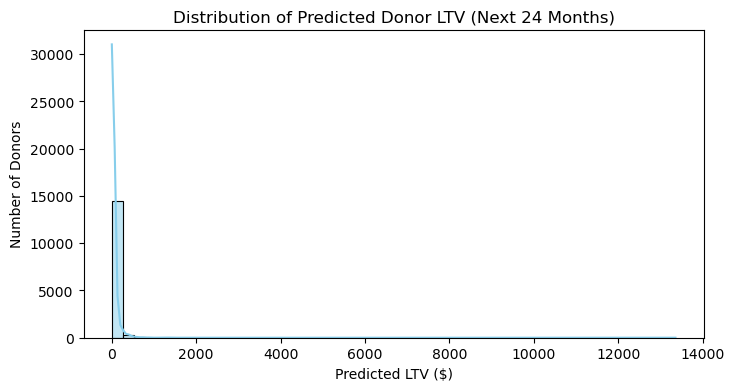

In [129]:
# Descriptive summary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Basic stats
summary = submission["Next_24_Month_Value_LTV"].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95])
print(summary)

# Visualise distribution
plt.figure(figsize=(8,4))
sns.histplot(submission["Next_24_Month_Value_LTV"], bins=50, kde=True, color="skyblue")
plt.title("Distribution of Predicted Donor LTV (Next 24 Months)")
plt.xlabel("Predicted LTV ($)")
plt.ylabel("Number of Donors")
plt.show()


In [130]:
# Identify top segments
# Rank donors by predicted LTV
submission_sorted = submission.sort_values("Next_24_Month_Value_LTV", ascending=False).reset_index(drop=True)
submission_sorted["Cumulative_Value"] = submission_sorted["Next_24_Month_Value_LTV"].cumsum()
submission_sorted["Cumulative_Share"] = submission_sorted["Cumulative_Value"] / submission_sorted["Next_24_Month_Value_LTV"].sum()

# Find how many donors make up 80% of total predicted value
top_80_cutoff = (submission_sorted["Cumulative_Share"] <= 0.8).sum()
print(f"Top {top_80_cutoff} donors contribute 80% of predicted total donations.")


Top 5004 donors contribute 80% of predicted total donations.


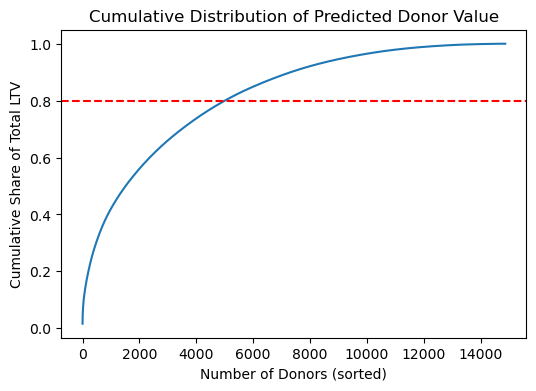

In [131]:
# Visualise
plt.figure(figsize=(6,4))
plt.plot(np.arange(len(submission_sorted)), submission_sorted["Cumulative_Share"])
plt.axhline(0.8, color="red", linestyle="--")
plt.title("Cumulative Distribution of Predicted Donor Value")
plt.xlabel("Number of Donors (sorted)")
plt.ylabel("Cumulative Share of Total LTV")
plt.show()


In [132]:
# Sgement donors by predicted value
bins = [0, 20, 100, 500, 1000, np.inf]
labels = ["Low", "Moderate", "High", "Premium", "Elite"]

submission["DonorSegment"] = pd.cut(submission["Next_24_Month_Value_LTV"], bins=bins, labels=labels)

segment_summary = submission.groupby("DonorSegment")["Next_24_Month_Value_LTV"].agg(["count", "mean", "sum"]).sort_index()
print(segment_summary)

              count         mean            sum
DonorSegment                                   
Low            6248     8.419549   52605.339844
Moderate       6731    48.479000  326312.156250
High           1779   187.157394  332953.000000
Premium          81   647.871033   52477.554688
Elite            29  2515.682617   72954.796875


C:\Users\Hannah\AppData\Local\Temp\ipykernel_27504\3499353092.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_summary = submission.groupby("DonorSegment")["Next_24_Month_Value_LTV"].agg(["count", "mean", "sum"]).sort_index()


C:\Users\Hannah\AppData\Local\Temp\ipykernel_27504\2015272214.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=segment_summary.reset_index(), x="DonorSegment", y="sum", palette="Blues_r")


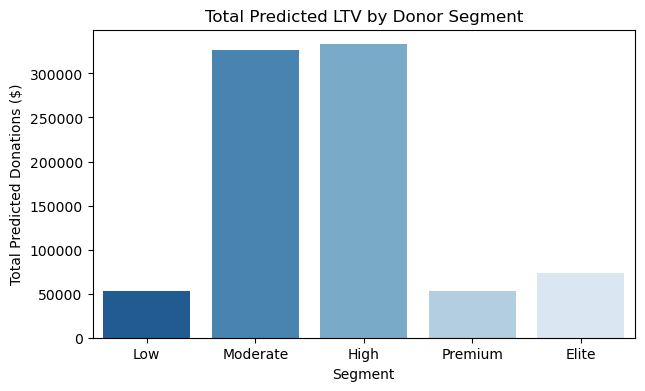

In [133]:
# Visualise
plt.figure(figsize=(7,4))
sns.barplot(data=segment_summary.reset_index(), x="DonorSegment", y="sum", palette="Blues_r")
plt.title("Total Predicted LTV by Donor Segment")
plt.xlabel("Segment")
plt.ylabel("Total Predicted Donations ($)")
plt.show()

# AI Acknowledgement
I acknowledge the use of ChatGPT (OpenAI, 2025) as a supplementary learning and coding support tool throughout this project. The model was used to assist with code structuring, debugging, optimisation, and conceptual understanding of machine learning workflows (including feature engineering, model tuning, and evaluation). All final implementations, interpretations, and analyses were reviewed, verified, and executed independently by the author.